SP02 Project

1. Reading image

In [1]:
import cv2 as cv
import numpy as np
import mahotas as mh
import mahotas.demos
import matplotlib.pyplot as plt

In [2]:
def dis_pic(pic_name):
    cv.imshow('image',pic_name)
    cv.waitKey(0)
    cv.destroyAllWindows()

In [4]:
data_pic = cv.imread("./DATA/98_spo2.jpg")
dis_pic(data_pic)

Here taking Mean of Red and Blue

In [5]:
red_img = data_pic[:, 0, 0]
blue_img = data_pic[0,0,:]

In [6]:
# Display Red and Blue image

In [7]:
dis_pic(red_img)
# dis_pic(blue_img)

Mean Value of Red and Blue Image

In [8]:
red_mean  = red_img.mean()
blue_mean = blue_img.mean() 
print("Red Mean: ",red_mean)
print("Blue Mean: ",blue_mean)

Red Mean:  72.060546875
Blue Mean:  107.66666666666667


DC Component

In [9]:
sd_red = cv.meanStdDev(red_img)
sd_blue = cv.meanStdDev(blue_img)
print("Red SD: ",sd_red[1][0][0])
print("Blue SD: ",sd_blue[1][0][0])

Red SD:  7.350449181726886
Blue SD:  104.0843674888576


(ACr / DCr)/(ACb / DCb)

In [10]:
K1 = (red_mean / sd_red[1][0][0])
K2 = (blue_mean/ sd_blue[1][0][0])

K3 = K1/K2

# print("K1 - > ",K3[0])
print("K3 -> ",K3)

K3 ->  9.477371704921833


Video to Frames

In [46]:
def FrameCapture(path):
    vidObj = cv.VideoCapture(path)
    count = 0
    success = 1
    while success:
        success, image = vidObj.read()
  
        # Saves the frames with frame-count
        cv.imwrite("./Frames/frame2%d.jpg" % count, image)
  
        count += 1

In [47]:
FrameCapture('./Data/723.mp4')

error: OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:715: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'


Loop through Frames

In [92]:
def cal_K3(img):
    #1 
    new_crop = cv.resize(img,(320,240))
    red_img = new_crop[:,:,2]
    blue_img = new_crop[:,:,0]
    

    
    #2
    red_mean  = red_img.mean()
    blue_mean = blue_img.mean() 
    
    
#     print("Red Mean: ",red_mean)
#     print("Blue Mean: ",blue_mean)
    
    #3
    sd_red = cv.meanStdDev(red_img)
    sd_blue = cv.meanStdDev(blue_img)
    
#     print("Red SD: ",sd_red[1][0][0])
#     print("Blue SD: ",sd_blue[1][0][0])
    
    #4
    K1 = (red_mean / sd_red[1][0][0])
    K2 = (blue_mean/ sd_blue[1][0][0])

    K3 = K1/K2

    
    return K1
    
    
    
    

In [76]:
img = cv.imread('./Frames/frame'+str(1)+'.jpg')

# dis_pic(img)
print(img[0,0,:])

[ 30   1 224]


In [80]:
new_crop = cv.resize(img,(320,240))
for i in range(0,320,1):
    for j in range(0,240,1):
        print(new_crop[i,j])
        
        
new_crop[:,0,0]

[ 30   1 224]
[ 31   2 225]
[ 31   2 225]
[ 31   2 225]
[ 30   1 224]
[ 30   1 224]
[ 29   0 223]
[ 29   0 223]
[ 30   1 224]
[ 30   1 224]
[ 30   1 224]
[ 30   1 224]
[ 30   1 224]
[ 30   1 224]
[ 30   1 224]
[ 30   1 224]
[ 30   1 224]
[ 30   1 224]
[ 30   1 224]
[ 30   1 224]
[ 30   1 224]
[ 30   1 224]
[ 30   1 224]
[ 30   1 224]
[ 31   0 223]
[ 31   0 223]
[ 31   0 223]
[ 31   0 223]
[ 31   0 223]
[ 31   0 223]
[ 31   0 223]
[ 31   0 223]
[ 31   0 223]
[ 31   0 223]
[ 31   0 223]
[ 31   0 223]
[ 31   0 223]
[ 31   0 223]
[ 30   0 222]
[ 28   0 220]
[ 29   1 221]
[ 29   1 221]
[ 28   0 220]
[ 30   2 222]
[ 28   0 220]
[ 28   0 220]
[ 28   0 220]
[ 28   0 220]
[ 28   0 220]
[ 28   0 220]
[ 28   0 220]
[ 28   0 220]
[ 28   0 220]
[ 28   0 220]
[ 28   0 220]
[ 28   0 220]
[ 30   0 219]
[ 30   0 219]
[ 30   0 219]
[ 30   0 219]
[ 28   0 220]
[ 28   0 220]
[ 28   0 220]
[ 28   0 220]
[ 28   0 220]
[ 28   0 220]
[ 28   0 220]
[ 28   0 220]
[ 28   0 220]
[ 28   0 220]
[ 28   0 220]
[ 28  

[ 29   1 221]
[ 29   1 221]
[ 29   1 221]
[ 29   1 221]
[ 29   1 221]
[ 29   1 221]
[ 29   1 221]
[ 29   1 221]
[ 28   0 220]
[ 28   0 220]
[ 29   1 221]
[ 31   1 220]
[ 31   1 220]
[ 31   1 220]
[ 31   1 220]
[ 31   1 220]
[ 31   1 220]
[ 31   1 220]
[ 31   1 220]
[ 28   0 220]
[ 28   0 220]
[ 26   0 220]
[ 26   0 220]
[ 28   0 220]
[ 28   0 220]
[ 28   0 220]
[ 28   0 220]
[ 28   0 220]
[ 28   0 220]
[ 28   0 220]
[ 28   0 220]
[ 29   1 221]
[ 29   1 221]
[ 28   0 220]
[ 28   0 220]
[ 31   0 223]
[ 31   0 223]
[ 31   0 223]
[ 31   0 223]
[ 31   0 223]
[ 31   0 223]
[ 28   0 220]
[ 28   0 220]
[ 31   0 223]
[ 31   0 223]
[ 31   0 223]
[ 32   1 224]
[ 31   0 221]
[ 31   0 221]
[ 34   1 222]
[ 34   1 222]
[ 32   0 221]
[ 32   0 221]
[ 31   0 223]
[ 31   0 223]
[ 31   0 223]
[ 31   0 223]
[ 31   0 223]
[ 31   0 223]
[ 33   0 221]
[ 33   0 221]
[ 33   0 221]
[ 33   0 221]
[ 33   0 221]
[ 33   0 221]
[ 33   0 221]
[ 33   0 221]
[ 31   0 223]
[ 31   0 223]
[ 31   0 223]
[ 31   0 223]
[ 31  

[ 26   0 207]
[ 26   0 207]
[ 25   0 204]
[ 25   0 204]
[ 25   1 203]
[ 25   1 203]
[ 27   1 203]
[ 27   1 203]
[ 27   1 203]
[ 27   1 203]
[ 27   1 203]
[ 27   1 203]
[ 27   1 203]
[ 26   0 202]
[ 29   2 226]
[ 29   2 226]
[ 29   2 226]
[ 29   2 226]
[ 29   2 225]
[ 29   1 225]
[ 31   1 226]
[ 32   1 228]
[ 31   2 226]
[ 31   1 226]
[ 31   1 227]
[ 30   0 227]
[ 31   2 226]
[ 31   1 226]
[ 30   0 226]
[ 30   0 227]
[ 30   0 225]
[ 30   0 225]
[ 30   0 225]
[ 30   0 225]
[ 30   1 224]
[ 30   1 224]
[ 30   1 224]
[ 30   1 224]
[ 31   2 225]
[ 31   2 225]
[ 30   1 224]
[ 30   1 224]
[ 32   1 224]
[ 32   1 224]
[ 30   1 224]
[ 30   1 224]
[ 29   0 223]
[ 29   0 223]
[ 29   0 223]
[ 29   0 223]
[ 31   0 223]
[ 31   0 223]
[ 31   0 223]
[ 31   0 223]
[ 33   0 221]
[ 33   0 221]
[ 33   0 221]
[ 33   0 221]
[ 31   0 223]
[ 32   1 224]
[ 31   0 223]
[ 31   0 223]
[ 28   0 220]
[ 28   0 220]
[ 31   0 223]
[ 31   0 223]
[ 33   0 221]
[ 33   0 221]
[ 33   0 221]
[ 33   0 221]
[ 31   0 223]
[ 31  

[ 32   2 227]
[ 32   2 227]
[ 29   2 226]
[ 29   2 226]
[ 29   1 228]
[ 29   1 228]
[ 31   1 226]
[ 31   1 226]
[ 33   0 228]
[ 33   0 228]
[ 31   1 226]
[ 31   1 226]
[ 31   1 226]
[ 31   1 226]
[ 31   1 226]
[ 33   3 228]
[ 31   1 226]
[ 31   1 226]
[ 31   1 226]
[ 31   1 226]
[ 30   0 225]
[ 30   0 225]
[ 30   1 224]
[ 30   1 224]
[ 30   1 224]
[ 30   1 224]
[ 30   1 224]
[ 30   1 224]
[ 30   1 224]
[ 29   0 223]
[ 29   0 223]
[ 30   1 224]
[ 29   0 223]
[ 29   0 223]
[ 29   0 223]
[ 29   0 223]
[ 29   0 223]
[ 30   1 224]
[ 30   1 224]
[ 29   0 223]
[ 31   0 223]
[ 31   0 223]
[ 31   0 223]
[ 31   0 223]
[ 31   0 223]
[ 31   0 223]
[ 31   0 223]
[ 31   0 223]
[ 29   0 223]
[ 30   1 224]
[ 29   0 223]
[ 29   0 223]
[ 29   0 223]
[ 29   0 223]
[ 31   0 223]
[ 31   0 223]
[ 31   0 223]
[ 31   0 223]
[ 31   0 223]
[ 31   0 223]
[ 32   1 224]
[ 32   1 224]
[ 31   0 223]
[ 31   0 223]
[ 30   1 224]
[ 30   1 224]
[ 30   1 224]
[ 30   1 224]
[ 30   1 224]
[ 31   2 225]
[ 30   1 224]
[ 30  

[ 29   1 228]
[ 30   1 228]
[ 33   2 229]
[ 35   1 229]
[ 34   1 229]
[ 33   0 228]
[ 33   0 228]
[ 33   0 228]
[ 33   0 228]
[ 33   0 228]
[ 33   0 228]
[ 33   0 228]
[ 34   1 229]
[ 33   0 228]
[ 34   1 229]
[ 33   0 228]
[ 33   1 226]
[ 32   0 225]
[ 33   0 228]
[ 33   0 228]
[ 33   1 226]
[ 32   0 225]
[ 32   1 224]
[ 32   1 224]
[ 30   1 224]
[ 30   1 224]
[ 30   1 224]
[ 30   1 224]
[ 30   1 224]
[ 30   1 224]
[ 30   1 224]
[ 30   1 224]
[ 30   1 224]
[ 30   1 224]
[ 30   1 224]
[ 30   1 224]
[ 30   1 224]
[ 30   1 224]
[ 30   1 224]
[ 30   1 224]
[ 29   0 223]
[ 30   1 224]
[ 30   1 224]
[ 29   0 223]
[ 32   1 224]
[ 31   0 223]
[ 32   1 224]
[ 32   1 224]
[ 32   1 224]
[ 32   1 224]
[ 33   2 225]
[ 33   2 225]
[ 32   0 225]
[ 32   0 225]
[ 32   0 225]
[ 32   0 225]
[ 30   0 225]
[ 30   0 225]
[ 30   0 225]
[ 30   0 225]
[ 33   1 226]
[ 32   0 225]
[ 32   0 225]
[ 32   0 225]
[ 33   1 226]
[ 33   1 226]
[ 33   1 226]
[ 33   1 226]
[ 30   0 225]
[ 30   0 225]
[ 30   0 225]
[ 30  

[ 30   0 225]
[ 30   0 225]
[ 30   0 225]
[ 30   0 225]
[ 30   0 225]
[ 32   0 225]
[ 32   0 225]
[ 33   1 226]
[ 33   1 226]
[ 33   1 226]
[ 32   0 225]
[ 33   1 226]
[ 33   1 226]
[ 33   1 226]
[ 33   1 226]
[ 33   1 226]
[ 33   1 226]
[ 33   1 226]
[ 32   1 226]
[ 31   1 226]
[ 31   1 226]
[ 33   0 228]
[ 30   0 227]
[ 31   0 227]
[ 36   0 228]
[ 35   0 228]
[ 36   1 229]
[ 35   0 228]
[ 36   1 229]
[ 35   0 228]
[ 35   0 228]
[ 35   0 228]
[ 35   0 228]
[ 35   0 228]
[ 35   0 228]
[ 35   0 228]
[ 35   0 228]
[ 36   1 229]
[ 36   1 229]
[ 36   1 229]
[ 36   1 229]
[ 35   0 228]
[ 35   0 228]
[ 35   0 228]
[ 35   0 228]
[ 35   0 228]
[ 35   0 228]
[ 35   0 228]
[ 35   0 228]
[ 35   0 228]
[ 36   1 229]
[ 34   2 227]
[ 34   2 227]
[ 36   1 229]
[ 36   1 229]
[ 35   0 228]
[ 35   0 228]
[ 33   1 226]
[ 33   1 226]
[ 33   1 226]
[ 33   1 226]
[ 35   0 228]
[ 35   0 228]
[ 35   0 228]
[ 35   0 228]
[ 35   0 228]
[ 35   0 228]
[ 35   0 228]
[ 35   0 228]
[ 35   0 228]
[ 35   0 228]
[ 35  

[ 35   0 228]
[ 35   0 228]
[ 35   0 228]
[ 35   0 228]
[ 35   0 228]
[ 35   0 228]
[ 35   0 228]
[ 35   0 228]
[ 32   0 225]
[ 32   0 225]
[ 33   1 226]
[ 33   1 226]
[ 33   1 226]
[ 33   1 226]
[ 32   0 225]
[ 32   0 225]
[ 32   0 225]
[ 32   0 225]
[ 32   0 225]
[ 32   0 225]
[ 32   0 225]
[ 32   0 225]
[ 34   0 225]
[ 34   0 225]
[ 34   0 224]
[ 34   0 224]
[ 34   0 225]
[ 33   0 223]
[ 34   0 224]
[ 34   0 224]
[ 34   1 222]
[ 34   1 222]
[ 34   1 222]
[ 34   1 222]
[ 33   0 221]
[ 33   0 221]
[ 33   0 221]
[ 33   0 221]
[ 33   0 221]
[ 33   0 221]
[ 33   0 221]
[ 33   0 221]
[ 33   0 221]
[ 33   0 221]
[ 33   0 221]
[ 33   0 221]
[ 33   0 221]
[ 33   0 221]
[ 33   0 221]
[ 33   0 221]
[ 30   0 219]
[ 30   0 219]
[ 30   1 218]
[ 30   1 218]
[ 30   1 218]
[ 30   1 218]
[ 30   1 218]
[ 30   1 218]
[ 30   1 218]
[ 30   1 218]
[ 30   1 218]
[ 30   1 218]
[ 29   0 217]
[ 29   0 217]
[ 31   0 217]
[ 31   0 217]
[ 29   0 217]
[ 29   0 217]
[ 30   2 216]
[ 30   2 216]
[ 32   1 216]
[ 32  

[ 35   2 231]
[ 35   2 231]
[ 35   2 231]
[ 35   2 231]
[ 35   2 231]
[ 35   2 231]
[ 35   2 231]
[ 37   1 231]
[ 37   1 231]
[ 36   1 229]
[ 36   1 229]
[ 35   2 231]
[ 35   2 231]
[ 35   2 231]
[ 35   2 231]
[ 35   2 231]
[ 35   2 231]
[ 35   2 231]
[ 35   2 231]
[ 35   2 231]
[ 35   2 231]
[ 35   2 231]
[ 35   2 231]
[ 36   1 229]
[ 36   1 229]
[ 36   1 229]
[ 36   1 229]
[ 35   0 228]
[ 35   0 228]
[ 35   0 228]
[ 35   0 228]
[ 35   0 228]
[ 35   0 228]
[ 35   0 228]
[ 35   0 228]
[ 35   0 228]
[ 35   0 228]
[ 33   1 226]
[ 33   1 226]
[ 35   0 228]
[ 35   0 228]
[ 35   0 228]
[ 35   0 228]
[ 33   0 228]
[ 33   0 228]
[ 33   0 228]
[ 33   0 228]
[ 35   0 228]
[ 35   1 227]
[ 35   1 226]
[ 35   1 226]
[ 35   0 228]
[ 35   0 228]
[ 35   0 228]
[ 35   0 228]
[ 35   1 226]
[ 35   1 226]
[ 35   1 226]
[ 35   1 226]
[ 35   1 226]
[ 35   1 226]
[ 35   1 226]
[ 35   1 226]
[ 34   0 225]
[ 34   0 225]
[ 34   0 225]
[ 34   0 225]
[ 34   0 224]
[ 34   0 224]
[ 34   1 222]
[ 34   1 222]
[ 33  

[ 35   0 228]
[ 35   0 228]
[ 35   0 228]
[ 35   0 228]
[ 35   0 228]
[ 35   1 226]
[ 35   1 226]
[ 35   1 226]
[ 35   1 226]
[ 35   0 228]
[ 35   0 228]
[ 33   1 226]
[ 33   1 226]
[ 35   1 226]
[ 35   1 226]
[ 34   0 225]
[ 35   1 226]
[ 34   0 225]
[ 34   0 225]
[ 34   0 225]
[ 34   0 225]
[ 34   0 225]
[ 34   0 225]
[ 34   0 225]
[ 34   0 224]
[ 34   0 224]
[ 34   0 224]
[ 34   0 224]
[ 34   0 224]
[ 33   0 221]
[ 34   1 222]
[ 34   1 222]
[ 34   1 222]
[ 33   0 221]
[ 33   0 221]
[ 33   0 221]
[ 33   0 221]
[ 33   0 221]
[ 33   0 221]
[ 33   1 221]
[ 33   1 220]
[ 33   0 221]
[ 33   0 221]
[ 33   0 221]
[ 33   0 221]
[ 33   0 221]
[ 33   0 221]
[ 33   1 220]
[ 33   1 220]
[ 30   0 219]
[ 30   0 219]
[ 30   0 219]
[ 30   0 219]
[ 30   0 219]
[ 30   0 219]
[ 30   1 219]
[ 30   1 218]
[ 32   1 216]
[ 31   2 216]
[ 30   2 216]
[ 30   2 216]
[ 32   1 216]
[ 32   1 216]
[ 32   1 216]
[ 32   1 216]
[ 32   1 216]
[ 32   1 216]
[ 32   1 216]
[ 32   1 216]
[ 30   2 216]
[ 30   2 216]
[ 30  

[ 32   1 218]
[ 32   1 218]
[ 32   1 218]
[ 32   1 218]
[ 32   1 218]
[ 32   1 218]
[ 32   1 216]
[ 32   1 216]
[ 32   1 216]
[ 32   1 216]
[ 32   1 216]
[ 32   1 216]
[ 32   1 216]
[ 32   1 216]
[ 30   0 213]
[ 30   0 213]
[ 30   0 213]
[ 30   0 213]
[ 30   0 213]
[ 30   0 213]
[ 30   0 213]
[ 30   0 213]
[ 30   0 213]
[ 30   0 213]
[ 30   1 211]
[ 30   1 211]
[ 28   1 211]
[ 28   1 211]
[ 28   1 211]
[ 27   0 210]
[ 33   1 232]
[ 33   1 232]
[ 33   1 232]
[ 33   1 232]
[ 33   1 232]
[ 33   1 232]
[ 33   1 232]
[ 33   1 232]
[ 31   2 232]
[ 32   3 233]
[ 30   1 231]
[ 32   3 233]
[ 32   3 232]
[ 34   5 234]
[ 33   2 231]
[ 32   1 230]
[ 33   2 231]
[ 33   2 231]
[ 33   2 231]
[ 33   2 231]
[ 34   1 229]
[ 34   1 229]
[ 32   1 230]
[ 32   1 230]
[ 31   0 229]
[ 31   0 229]
[ 32   1 230]
[ 32   1 230]
[ 32   1 230]
[ 32   1 230]
[ 31   0 229]
[ 31   0 229]
[ 32   1 230]
[ 32   1 230]
[ 32   1 230]
[ 32   1 230]
[ 31   0 229]
[ 33   2 231]
[ 33   2 231]
[ 32   1 230]
[ 31   1 230]
[ 32  

[ 33   1 232]
[ 33   1 232]
[ 33   1 232]
[ 33   1 232]
[ 33   1 232]
[ 33   1 232]
[ 33   1 232]
[ 33   1 232]
[ 32   0 231]
[ 32   0 231]
[ 32   0 231]
[ 32   0 231]
[ 32   0 231]
[ 32   0 231]
[ 32   1 230]
[ 32   1 230]
[ 32   1 230]
[ 32   1 230]
[ 32   1 230]
[ 33   2 231]
[ 33   1 232]
[ 32   0 231]
[ 33   1 232]
[ 33   1 232]
[ 33   1 232]
[ 33   1 232]
[ 34   0 231]
[ 34   0 231]
[ 35   1 232]
[ 35   1 232]
[ 36   3 232]
[ 36   3 232]
[ 35   1 232]
[ 35   1 232]
[ 35   1 232]
[ 35   1 232]
[ 35   1 232]
[ 35   1 232]
[ 35   1 232]
[ 35   1 232]
[ 35   1 232]
[ 35   1 232]
[ 33   1 232]
[ 33   1 232]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 36   2 233]
[ 36   2 233]
[ 35   1 232]
[ 35   1 232]
[ 35   1 232]
[ 36   2 233]
[ 35   1 232]
[ 35   1 232]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 35   1 232]
[ 35   1 232]
[ 35   1 232]
[ 35   1 232]
[ 34   1 232]
[ 33   1 232]
[ 35   1 232]
[ 35   1 232]
[ 35   1 232]
[ 35  

[ 38   1 235]
[ 37   0 234]
[ 35   1 232]
[ 35   1 232]
[ 35   1 232]
[ 35   1 232]
[ 38   1 235]
[ 38   1 235]
[ 38   1 235]
[ 38   1 235]
[ 38   1 235]
[ 38   1 235]
[ 38   1 235]
[ 38   1 235]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 38   1 235]
[ 38   1 235]
[ 37   0 234]
[ 38   1 235]
[ 38   1 235]
[ 37   0 234]
[ 37   0 234]
[ 38   1 235]
[ 38   1 235]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 38   1 235]
[ 38   1 235]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 38   1 235]
[ 38   1 235]
[ 38   1 235]
[ 38   1 235]
[ 38   1 235]
[ 38   1 235]
[ 38   1 235]
[ 38   1 235]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 38   1 235]
[ 37   0 234]
[ 37   0 234]
[ 38   1 235]
[ 38   0 236]
[ 38   1 236]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37  

[ 36   0 236]
[ 36   0 236]
[ 36   0 236]
[ 36   0 236]
[ 38   1 235]
[ 38   1 235]
[ 38   1 235]
[ 38   1 235]
[ 38   1 235]
[ 38   1 235]
[ 38   1 235]
[ 38   1 235]
[ 38   1 235]
[ 38   1 235]
[ 38   1 235]
[ 38   1 235]
[ 36   0 236]
[ 36   0 236]
[ 36   0 236]
[ 36   0 236]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 35   0 234]
[ 35   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 38   1 235]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   1 232]
[ 37   1 232]
[ 37   1 232]
[ 37   1 232]
[ 37   1 232]
[ 37   1 232]
[ 37   1 232]
[ 37   1 232]
[ 37   1 232]
[ 37   1 232]
[ 37   1 232]
[ 37   1 232]
[ 36   0 231]
[ 36   0 231]
[ 36   0 231]
[ 36  

[ 38   0 236]
[ 38   1 235]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 35   1 232]
[ 35   1 232]
[ 35   1 232]
[ 35   1 232]
[ 35   1 232]
[ 35   1 232]
[ 35   1 232]
[ 35   1 232]
[ 37   1 232]
[ 37   1 232]
[ 36   0 231]
[ 36   0 231]
[ 37   1 231]
[ 37   1 231]
[ 37   1 231]
[ 37   1 231]
[ 37   1 231]
[ 37   1 231]
[ 37   1 231]
[ 37   1 231]
[ 37   1 231]
[ 37   1 231]
[ 34   1 230]
[ 34   1 230]
[ 31   0 229]
[ 32   1 230]
[ 36   0 230]
[ 36   0 230]
[ 35   0 228]
[ 35   0 228]
[ 35   0 228]
[ 35   0 228]
[ 35   0 228]
[ 35   0 228]
[ 35   0 228]
[ 35   0 228]
[ 37   0 226]
[ 37   0 226]
[ 34   0 225]
[ 34   0 225]
[ 34   0 225]
[ 34   0 225]
[ 34   0 225]
[ 34   0 225]
[ 34   0 225]
[ 34   0 225]
[ 34   0 224]
[ 34   0 224]
[ 34   1 222]
[ 34   1 222]
[ 34  

[ 38   0 236]
[ 38   0 236]
[ 38   0 236]
[ 38   0 236]
[ 38   0 236]
[ 38   0 236]
[ 38   0 236]
[ 38   0 236]
[ 38   0 236]
[ 38   0 236]
[ 38   0 236]
[ 38   0 236]
[ 38   0 236]
[ 38   0 236]
[ 38   0 238]
[ 38   0 237]
[ 38   0 236]
[ 38   0 236]
[ 38   0 236]
[ 38   0 236]
[ 38   0 236]
[ 38   0 236]
[ 38   0 236]
[ 38   0 236]
[ 38   0 236]
[ 38   0 236]
[ 38   0 236]
[ 38   0 236]
[ 38   0 236]
[ 38   0 236]
[ 38   1 235]
[ 37   0 234]
[ 38   1 235]
[ 38   1 235]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   1 232]
[ 37   1 232]
[ 37   1 232]
[ 36   0 231]
[ 36   0 231]
[ 36   0 231]
[ 36   0 231]
[ 36   0 231]
[ 36   0 231]
[ 36   0 231]
[ 36   0 231]
[ 36   0 231]
[ 36   0 231]
[ 36   0 231]
[ 36   0 231]
[ 36   0 231]
[ 37   1 231]
[ 37   1 231]
[ 37   1 231]
[ 37   1 231]
[ 34   1 230]
[ 34   1 230]
[ 34   1 230]
[ 34   1 230]
[ 34   1 230]
[ 34   1 230]
[ 34   1 230]
[ 34   1 230]
[ 35   0 228]
[ 35  

[ 32   0 219]
[ 32   0 219]
[ 31   0 217]
[ 31   0 217]
[ 31   0 217]
[ 31   0 217]
[ 32   1 216]
[ 32   1 216]
[ 32   1 216]
[ 32   1 216]
[ 34   0 238]
[ 35   1 239]
[ 35   1 239]
[ 35   1 239]
[ 34   2 240]
[ 34   2 240]
[ 34   2 240]
[ 34   2 240]
[ 34   0 238]
[ 34   0 238]
[ 33   2 237]
[ 35   2 237]
[ 37   1 239]
[ 36   0 238]
[ 36   0 238]
[ 36   0 238]
[ 36   0 238]
[ 36   0 238]
[ 36   0 238]
[ 36   0 238]
[ 34   0 238]
[ 34   0 238]
[ 34   0 238]
[ 34   0 238]
[ 36   0 238]
[ 36   0 236]
[ 36   0 236]
[ 36   0 236]
[ 34   0 238]
[ 34   0 238]
[ 34   0 238]
[ 34   0 238]
[ 36   0 238]
[ 36   0 238]
[ 36   0 238]
[ 36   0 238]
[ 36   0 238]
[ 36   0 238]
[ 36   0 238]
[ 36   0 238]
[ 36   0 238]
[ 36   0 238]
[ 36   0 238]
[ 36   0 238]
[ 36   0 238]
[ 36   0 238]
[ 36   0 238]
[ 36   0 238]
[ 34   0 238]
[ 34   0 238]
[ 34   0 238]
[ 34   0 238]
[ 37   1 239]
[ 37   1 239]
[ 37   1 239]
[ 37   1 239]
[ 37   1 239]
[ 37   1 239]
[ 37   1 239]
[ 37   1 239]
[ 37   1 239]
[ 37  

[ 34   0 238]
[ 34   0 238]
[ 34   0 238]
[ 36   0 238]
[ 36   0 238]
[ 36   0 238]
[ 36   0 238]
[ 37   1 239]
[ 37   1 239]
[ 36   0 238]
[ 36   0 238]
[ 37   1 239]
[ 37   1 239]
[ 37   1 239]
[ 38   2 240]
[ 35   1 239]
[ 35   1 239]
[ 37   1 239]
[ 37   1 239]
[ 37   1 239]
[ 37   1 239]
[ 37   1 239]
[ 37   1 239]
[ 37   1 239]
[ 37   1 239]
[ 37   1 239]
[ 37   1 239]
[ 37   1 239]
[ 37   1 239]
[ 37   1 239]
[ 37   1 239]
[ 37   1 239]
[ 37   1 239]
[ 37   1 239]
[ 37   1 239]
[ 39   0 239]
[ 38   0 238]
[ 37   1 240]
[ 37   0 240]
[ 37   1 239]
[ 37   1 239]
[ 38   2 240]
[ 37   1 239]
[ 37   1 239]
[ 37   1 239]
[ 37   1 239]
[ 37   1 239]
[ 39   0 239]
[ 38   0 238]
[ 37   1 239]
[ 37   1 239]
[ 39   0 239]
[ 39   0 239]
[ 39   0 239]
[ 39   0 239]
[ 37   0 240]
[ 37   0 240]
[ 39   0 239]
[ 39   0 239]
[ 39   0 239]
[ 39   0 239]
[ 39   0 239]
[ 39   0 239]
[ 39   0 239]
[ 39   0 239]
[ 39   0 239]
[ 39   0 239]
[ 38   0 238]
[ 38   0 238]
[ 38   0 238]
[ 38   0 238]
[ 38  

[ 33   1 220]
[ 33   1 220]
[ 33   1 220]
[ 33   1 220]
[ 33   1 220]
[ 32   0 219]
[ 32   0 219]
[ 32   0 219]
[ 32   0 219]
[ 32   0 219]
[ 32   0 219]
[ 29   0 217]
[ 29   0 217]
[ 29   0 217]
[ 29   0 217]
[ 35   0 241]
[ 36   1 242]
[ 36   1 242]
[ 35   0 241]
[ 36   2 240]
[ 36   2 240]
[ 36   2 240]
[ 36   2 240]
[ 35   1 239]
[ 35   1 239]
[ 35   1 239]
[ 35   1 239]
[ 35   1 239]
[ 35   1 239]
[ 35   1 239]
[ 35   1 239]
[ 35   1 239]
[ 34   0 238]
[ 34   0 238]
[ 35   1 239]
[ 34   0 238]
[ 34   0 238]
[ 34   0 238]
[ 35   1 239]
[ 36   0 238]
[ 37   1 239]
[ 37   1 239]
[ 38   2 240]
[ 37   1 239]
[ 36   0 238]
[ 36   0 238]
[ 36   0 238]
[ 34   0 238]
[ 34   0 238]
[ 34   0 238]
[ 34   0 238]
[ 34   0 238]
[ 35   1 239]
[ 35   1 239]
[ 34   0 238]
[ 35   1 239]
[ 35   1 239]
[ 34   0 238]
[ 34   0 238]
[ 37   1 239]
[ 37   1 239]
[ 37   1 239]
[ 37   1 239]
[ 37   1 239]
[ 37   1 239]
[ 37   1 239]
[ 37   1 239]
[ 37   0 240]
[ 37   1 240]
[ 37   1 239]
[ 37   1 239]
[ 37  

[ 39   0 239]
[ 39   0 239]
[ 39   0 239]
[ 39   0 239]
[ 39   0 239]
[ 39   0 239]
[ 39   0 239]
[ 39   0 239]
[ 39   0 239]
[ 39   0 239]
[ 39   0 239]
[ 39   0 239]
[ 39   0 239]
[ 39   0 239]
[ 39   0 239]
[ 39   0 239]
[ 38   0 238]
[ 38   0 238]
[ 39   0 239]
[ 39   0 239]
[ 39   0 239]
[ 39   0 239]
[ 39   0 239]
[ 39   0 239]
[ 39   0 239]
[ 39   0 239]
[ 39   0 239]
[ 39   0 239]
[ 39   0 239]
[ 39   0 239]
[ 39   0 239]
[ 39   0 239]
[ 39   0 239]
[ 39   0 239]
[ 39   0 239]
[ 39   0 239]
[ 39   1 238]
[ 39   1 237]
[ 38   0 238]
[ 39   0 239]
[ 38   1 239]
[ 36   0 238]
[ 38   0 236]
[ 38   0 236]
[ 38   1 236]
[ 38   1 235]
[ 38   0 236]
[ 38   0 236]
[ 38   0 236]
[ 38   0 236]
[ 38   0 236]
[ 38   0 236]
[ 38   0 236]
[ 38   0 236]
[ 38   1 235]
[ 38   1 235]
[ 38   1 235]
[ 38   1 235]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   1 232]
[ 37  

[ 33   1 220]
[ 33   1 220]
[ 32   0 219]
[ 32   0 219]
[ 34   3 220]
[ 32   1 218]
[ 32   1 218]
[ 32   1 218]
[ 30   0 220]
[ 30   1 219]
[ 30   1 218]
[ 30   1 218]
[ 36   1 242]
[ 36   1 242]
[ 36   1 242]
[ 36   1 242]
[ 37   2 243]
[ 36   1 242]
[ 36   1 242]
[ 36   1 242]
[ 36   1 242]
[ 36   1 242]
[ 36   1 242]
[ 36   1 242]
[ 35   0 241]
[ 35   0 241]
[ 35   0 241]
[ 35   0 241]
[ 36   1 242]
[ 35   0 241]
[ 36   1 242]
[ 36   1 242]
[ 35   0 241]
[ 35   0 241]
[ 35   0 241]
[ 35   0 241]
[ 37   1 239]
[ 37   1 239]
[ 37   1 239]
[ 37   1 239]
[ 36   2 240]
[ 36   2 240]
[ 35   1 239]
[ 36   2 240]
[ 35   1 239]
[ 35   1 239]
[ 37   1 239]
[ 37   1 239]
[ 38   2 240]
[ 38   2 240]
[ 38   2 240]
[ 37   1 239]
[ 37   1 239]
[ 37   1 239]
[ 37   1 239]
[ 38   2 240]
[ 37   0 240]
[ 37   0 240]
[ 37   0 240]
[ 37   0 240]
[ 37   0 240]
[ 37   0 240]
[ 38   1 241]
[ 38   1 241]
[ 38   1 241]
[ 38   1 241]
[ 38   1 241]
[ 38   1 241]
[ 37   0 240]
[ 37   0 240]
[ 38   1 241]
[ 38  

[ 38   1 241]
[ 38   1 241]
[ 38   1 241]
[ 38   1 241]
[ 38   1 241]
[ 38   1 241]
[ 38   1 241]
[ 38   1 241]
[ 38   1 241]
[ 38   1 241]
[ 38   1 241]
[ 38   1 241]
[ 40   0 242]
[ 40   0 242]
[ 40   0 242]
[ 40   0 242]
[ 38   1 241]
[ 38   1 241]
[ 36   1 242]
[ 36   1 242]
[ 38   0 242]
[ 38   0 242]
[ 38   0 242]
[ 38   0 242]
[ 41   2 242]
[ 41   2 242]
[ 40   1 240]
[ 40   1 240]
[ 38   1 241]
[ 38   1 241]
[ 36   1 242]
[ 36   1 242]
[ 38   1 241]
[ 38   1 241]
[ 38   1 241]
[ 38   1 241]
[ 37   0 240]
[ 37   0 240]
[ 37   0 240]
[ 37   0 240]
[ 37   0 240]
[ 37   0 240]
[ 37   0 240]
[ 37   0 240]
[ 40   1 241]
[ 40   1 241]
[ 37   0 240]
[ 37   0 240]
[ 40   1 241]
[ 40   1 241]
[ 40   1 241]
[ 40   1 241]
[ 40   1 241]
[ 40   1 241]
[ 40   1 241]
[ 40   1 241]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 40   1 241]
[ 40   1 241]
[ 40   1 241]
[ 39   0 239]
[ 39   0 239]
[ 40   1 241]
[ 40   1 241]
[ 40   1 241]
[ 40   1 241]
[ 40   1 241]
[ 40   1 241]
[ 39   0 239]
[ 39  

[ 38   0 236]
[ 38   1 235]
[ 38   1 235]
[ 38   1 235]
[ 38   1 235]
[ 38   1 235]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   1 232]
[ 37   1 232]
[ 37   1 232]
[ 37   1 232]
[ 37   1 232]
[ 36   0 231]
[ 37   1 232]
[ 37   1 232]
[ 36   0 231]
[ 36   0 231]
[ 36   0 231]
[ 36   0 231]
[ 37   1 231]
[ 37   1 231]
[ 37   1 231]
[ 37   1 231]
[ 35   2 231]
[ 35   2 231]
[ 36   1 229]
[ 36   1 229]
[ 36   1 229]
[ 36   1 229]
[ 36   1 229]
[ 35   0 228]
[ 35   0 228]
[ 35   0 228]
[ 35   0 228]
[ 35   0 228]
[ 37   0 228]
[ 37   0 227]
[ 37   0 226]
[ 37   0 226]
[ 35   1 225]
[ 35   1 225]
[ 34   0 225]
[ 35   1 226]
[ 32   0 225]
[ 32   1 225]
[ 32   1 224]
[ 32   1 224]
[ 34   1 222]
[ 34   1 222]
[ 34   1 222]
[ 34   1 222]
[ 33   0 221]
[ 33   0 221]
[ 33   0 221]
[ 33   0 221]
[ 33   1 220]
[ 33   1 220]
[ 33   1 220]
[ 33   1 220]
[ 33   1 220]
[ 32   0 219]
[ 33   1 220]
[ 33   1 220]
[ 33   2 219]
[ 32   1 218]
[ 32   1 218]
[ 32   1 218]
[ 35  

[ 38   0 242]
[ 38   0 242]
[ 38   0 242]
[ 38   0 242]
[ 38   0 242]
[ 40   0 242]
[ 40   0 242]
[ 40   0 242]
[ 40   0 242]
[ 40   0 242]
[ 40   0 242]
[ 40   0 242]
[ 40   0 242]
[ 40   0 242]
[ 40   0 242]
[ 40   0 242]
[ 40   0 242]
[ 40   0 242]
[ 40   0 242]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 40   0 242]
[ 40   0 242]
[ 40   0 242]
[ 40   0 242]
[ 38   1 241]
[ 38   1 241]
[ 38   1 241]
[ 38   1 241]
[ 41   2 242]
[ 40   2 242]
[ 37   0 241]
[ 35   0 241]
[ 38   1 241]
[ 39   2 242]
[ 40   2 242]
[ 41   2 242]
[ 37   0 240]
[ 37   0 240]
[ 37   0 240]
[ 37   0 240]
[ 40   1 241]
[ 41   2 242]
[ 40   1 241]
[ 41   2 242]
[ 38   1 241]
[ 38   1 241]
[ 38   1 241]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 40   1 241]
[ 40   1 241]
[ 40   1 241]
[ 40   1 241]
[ 40  

[ 40   0 242]
[ 40   0 242]
[ 40   0 242]
[ 40   0 242]
[ 40   0 242]
[ 40   0 242]
[ 40   0 242]
[ 40   0 242]
[ 40   0 242]
[ 40   0 242]
[ 40   0 242]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 40   0 242]
[ 40   0 242]
[ 38   0 242]
[ 39   0 242]
[ 41   0 242]
[ 42   0 242]
[ 40   0 242]
[ 40   0 242]
[ 40   0 242]
[ 40   0 242]
[ 40   0 242]
[ 40   0 242]
[ 40   0 242]
[ 40   0 242]
[ 40   0 242]
[ 40   0 242]
[ 41   1 243]
[ 41   1 243]
[ 40   0 242]
[ 40   0 242]
[ 40   0 242]
[ 40   0 242]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 40   1 241]
[ 40   1 241]
[ 40   1 240]
[ 40   1 240]
[ 41   2 242]
[ 41   2 242]
[ 40   1 241]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 40   1 241]
[ 40   1 241]
[ 40   1 241]
[ 40   1 241]
[ 40   1 241]
[ 40   1 241]
[ 40   1 241]
[ 40   1 241]
[ 40   1 241]
[ 40   1 241]
[ 40   1 241]
[ 40   1 241]
[ 39  

[ 33   0 221]
[ 33   1 220]
[ 33   1 220]
[ 33   1 220]
[ 33   1 220]
[ 32   0 219]
[ 32   0 219]
[ 38   2 246]
[ 38   2 246]
[ 37   1 247]
[ 37   3 248]
[ 36   2 246]
[ 36   2 246]
[ 37   1 245]
[ 38   2 246]
[ 37   1 245]
[ 37   1 245]
[ 37   1 245]
[ 37   1 245]
[ 39   1 245]
[ 39   1 245]
[ 37   1 245]
[ 37   1 245]
[ 39   1 245]
[ 39   1 245]
[ 39   1 243]
[ 39   1 243]
[ 38   0 244]
[ 38   0 244]
[ 39   1 245]
[ 39   1 245]
[ 39   1 245]
[ 39   1 245]
[ 38   0 242]
[ 39   1 243]
[ 39   1 243]
[ 38   0 242]
[ 39   1 243]
[ 38   0 242]
[ 39   1 243]
[ 39   1 243]
[ 38   0 242]
[ 38   0 242]
[ 38   0 244]
[ 38   0 244]
[ 39   1 245]
[ 39   1 245]
[ 39   1 245]
[ 39   1 245]
[ 39   1 243]
[ 39   1 243]
[ 38   0 244]
[ 38   0 244]
[ 39   1 245]
[ 39   1 245]
[ 39   1 243]
[ 39   1 243]
[ 39   1 243]
[ 39   1 243]
[ 41   1 243]
[ 42   2 244]
[ 41   1 243]
[ 41   1 243]
[ 41   1 243]
[ 41   1 243]
[ 41   1 243]
[ 41   1 243]
[ 39   1 243]
[ 39   1 243]
[ 38   0 242]
[ 39   1 243]
[ 39  

[ 34   1 222]
[ 34   1 222]
[ 34   1 222]
[ 34   1 222]
[ 33   0 221]
[ 34   1 222]
[ 34   1 222]
[ 34   1 222]
[ 33   1 220]
[ 33   1 220]
[ 33   1 220]
[ 33   1 220]
[ 33   2 219]
[ 33   2 219]
[ 33   2 219]
[ 33   2 219]
[ 38   1 247]
[ 38   1 247]
[ 37   3 248]
[ 37   3 248]
[ 37   3 248]
[ 37   3 248]
[ 37   3 248]
[ 37   3 248]
[ 36   2 247]
[ 36   2 247]
[ 37   0 246]
[ 37   0 246]
[ 37   0 246]
[ 37   0 246]
[ 37   1 245]
[ 37   1 245]
[ 37   1 245]
[ 37   1 245]
[ 39   1 245]
[ 39   1 245]
[ 39   1 245]
[ 39   1 245]
[ 39   1 245]
[ 39   1 245]
[ 39   1 245]
[ 39   1 245]
[ 39   1 245]
[ 39   1 245]
[ 39   1 245]
[ 39   1 245]
[ 39   1 245]
[ 39   1 245]
[ 39   1 245]
[ 39   1 245]
[ 39   1 245]
[ 39   1 245]
[ 39   1 245]
[ 39   1 245]
[ 39   1 245]
[ 39   1 245]
[ 39   1 245]
[ 39   1 245]
[ 39   1 245]
[ 39   1 245]
[ 39   1 245]
[ 39   1 245]
[ 39   1 245]
[ 39   1 245]
[ 39   1 243]
[ 39   1 243]
[ 39   1 243]
[ 39   1 243]
[ 40   0 242]
[ 41   1 243]
[ 41   1 243]
[ 41  

[ 39   0 239]
[ 39   0 239]
[ 39   0 239]
[ 39   0 239]
[ 39   0 239]
[ 39   0 239]
[ 39   0 239]
[ 39   0 239]
[ 39   0 239]
[ 39   0 239]
[ 39   0 239]
[ 39   0 239]
[ 39   0 239]
[ 39   1 237]
[ 39   1 237]
[ 39   1 237]
[ 39   1 237]
[ 39   1 237]
[ 39   1 237]
[ 38   0 236]
[ 38   0 236]
[ 38   0 236]
[ 38   0 236]
[ 40   0 236]
[ 40   0 236]
[ 40   0 236]
[ 40   0 236]
[ 38   0 236]
[ 38   0 236]
[ 38   0 236]
[ 38   0 236]
[ 38   1 235]
[ 38   1 235]
[ 38   1 235]
[ 38   1 235]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 37   0 234]
[ 39   0 234]
[ 39   1 235]
[ 37   1 232]
[ 39   0 232]
[ 37   1 232]
[ 37   1 232]
[ 37   1 232]
[ 37   1 232]
[ 38   2 232]
[ 37   1 231]
[ 37   1 231]
[ 38   2 232]
[ 37   1 231]
[ 37   1 231]
[ 37   1 231]
[ 37   1 231]
[ 36   1 229]
[ 36   1 229]
[ 36   1 229]
[ 36   1 229]
[ 36   1 229]
[ 36   1 229]
[ 36   1 229]
[ 36   1 229]
[ 35   1 226]
[ 35   1 226]
[ 37   0 226]
[ 37   0 226]
[ 35   1 225]
[ 35   1 225]
[ 35   1 225]
[ 35   1 225]
[ 35  

[ 41   2 242]
[ 39   0 239]
[ 39   0 239]
[ 39   1 237]
[ 39   1 237]
[ 42   0 242]
[ 42   0 241]
[ 41   0 240]
[ 42   1 240]
[ 41   0 239]
[ 41   0 239]
[ 39   0 239]
[ 39   0 239]
[ 41   0 239]
[ 41   0 239]
[ 41   0 239]
[ 41   0 239]
[ 41   0 239]
[ 41   0 239]
[ 38   0 236]
[ 38   0 236]
[ 39   1 237]
[ 38   0 236]
[ 39   1 237]
[ 38   0 236]
[ 38   0 236]
[ 38   0 236]
[ 38   0 236]
[ 38   0 236]
[ 39   1 237]
[ 39   1 237]
[ 39   1 237]
[ 39   1 237]
[ 38   0 236]
[ 38   0 236]
[ 38   0 236]
[ 38   0 236]
[ 38   1 235]
[ 38   1 235]
[ 38   1 235]
[ 38   1 235]
[ 38   1 235]
[ 38   1 235]
[ 38   1 235]
[ 38   1 235]
[ 39   0 234]
[ 39   0 234]
[ 39   0 232]
[ 39   0 232]
[ 37   1 232]
[ 37   1 232]
[ 37   1 232]
[ 37   1 232]
[ 38   2 232]
[ 38   2 232]
[ 38   2 232]
[ 38   2 232]
[ 39   1 231]
[ 39   1 231]
[ 39   2 230]
[ 38   1 229]
[ 36   1 229]
[ 36   1 229]
[ 36   1 229]
[ 36   1 229]
[ 37   2 230]
[ 36   1 229]
[ 36   2 227]
[ 36   2 227]
[ 35   0 228]
[ 35   0 228]
[ 37  

[ 42   1 246]
[ 42   1 246]
[ 42   1 246]
[ 42   1 246]
[ 42   1 246]
[ 41   0 245]
[ 41   0 245]
[ 41   1 243]
[ 41   1 243]
[ 41   1 243]
[ 41   1 243]
[ 41   1 243]
[ 41   1 243]
[ 41   1 243]
[ 41   1 243]
[ 41   1 243]
[ 41   1 243]
[ 41   1 243]
[ 41   1 243]
[ 40   0 242]
[ 40   0 242]
[ 40   0 242]
[ 40   0 242]
[ 40   0 242]
[ 40   0 242]
[ 40   0 242]
[ 40   0 242]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 41   2 242]
[ 42   0 242]
[ 42   0 242]
[ 42   0 242]
[ 42   0 241]
[ 41   0 239]
[ 41   0 239]
[ 41   0 239]
[ 41   0 239]
[ 42   1 240]
[ 42   1 240]
[ 42   1 240]
[ 41   0 239]
[ 41   0 239]
[ 41   0 239]
[ 41   0 239]
[ 41   0 239]
[ 39  

[ 40   1 247]
[ 40   0 249]
[ 40   0 249]
[ 39   2 248]
[ 38   1 247]
[ 38   1 247]
[ 38   1 247]
[ 37   3 248]
[ 37   3 248]
[ 38   1 247]
[ 38   1 247]
[ 37   0 246]
[ 37   0 246]
[ 38   1 247]
[ 38   1 247]
[ 40   1 247]
[ 39   0 246]
[ 40   1 247]
[ 39   0 246]
[ 39   0 246]
[ 39   0 246]
[ 39   0 246]
[ 39   0 246]
[ 39   1 245]
[ 39   1 245]
[ 39   1 245]
[ 39   1 245]
[ 39   1 245]
[ 39   1 245]
[ 39   1 245]
[ 39   1 245]
[ 40   2 246]
[ 40   2 246]
[ 40   2 246]
[ 40   2 246]
[ 39   1 245]
[ 39   1 245]
[ 39   1 245]
[ 39   1 245]
[ 39   1 245]
[ 40   2 246]
[ 40   2 246]
[ 40   2 246]
[ 39   1 245]
[ 39   1 245]
[ 42   1 246]
[ 42   1 246]
[ 43   2 247]
[ 43   2 247]
[ 43   2 247]
[ 43   2 247]
[ 43   2 247]
[ 43   2 247]
[ 43   2 247]
[ 43   2 247]
[ 41   1 243]
[ 41   1 243]
[ 41   1 243]
[ 41   1 243]
[ 42   1 246]
[ 42   1 246]
[ 42   2 244]
[ 42   2 244]
[ 42   1 246]
[ 42   1 247]
[ 42   1 247]
[ 42   1 247]
[ 42   2 244]
[ 41   1 243]
[ 41   1 243]
[ 41   1 243]
[ 41  

[ 38   0 236]
[ 38   1 235]
[ 38   1 235]
[ 38   1 235]
[ 38   1 235]
[ 41   1 236]
[ 41   1 236]
[ 40   0 235]
[ 40   0 235]
[ 40   1 233]
[ 40   1 233]
[ 40   1 233]
[ 40   1 233]
[ 40   0 235]
[ 40   1 234]
[ 40   1 233]
[ 40   2 233]
[ 37   1 232]
[ 37   1 232]
[ 37   1 232]
[ 37   1 232]
[ 38   2 232]
[ 38   2 232]
[ 38   2 232]
[ 38   2 232]
[ 38   2 232]
[ 38   2 232]
[ 38   2 232]
[ 38   2 232]
[ 36   1 229]
[ 36   1 229]
[ 36   1 229]
[ 36   1 229]
[ 37   2 230]
[ 36   1 229]
[ 36   1 229]
[ 36   1 229]
[ 35   1 226]
[ 35   1 226]
[ 35   1 226]
[ 35   1 226]
[ 35   1 226]
[ 35   1 226]
[ 35   1 226]
[ 35   1 226]
[ 35   1 226]
[ 36   2 227]
[ 35   1 226]
[ 35   1 226]
[ 35   1 225]
[ 35   1 225]
[ 35   1 225]
[ 35   1 225]
[ 35   1 225]
[ 34   0 224]
[ 34   0 224]
[ 34   0 224]
[ 34   1 222]
[ 34   1 222]
[ 34   1 222]
[ 34   1 222]
[ 36   0 224]
[ 36   0 224]
[ 34   1 222]
[ 34   1 222]
[ 34   2 221]
[ 33   1 220]
[ 34   2 221]
[ 33   1 220]
[ 42   1 253]
[ 42   1 253]
[ 42  

[ 38   2 232]
[ 38   2 232]
[ 38   2 232]
[ 38   2 232]
[ 37   1 231]
[ 36   1 229]
[ 36   1 229]
[ 36   1 229]
[ 36   1 229]
[ 36   1 229]
[ 36   1 229]
[ 36   1 229]
[ 36   1 229]
[ 36   1 229]
[ 36   1 229]
[ 36   1 229]
[ 36   1 229]
[ 35   1 226]
[ 35   1 226]
[ 35   1 225]
[ 35   1 225]
[ 35   1 226]
[ 35   1 226]
[ 35   1 226]
[ 35   1 226]
[ 34   0 224]
[ 34   0 224]
[ 34   1 222]
[ 34   1 222]
[ 35   1 225]
[ 35   1 225]
[ 35   2 223]
[ 35   2 223]
[ 36   0 224]
[ 36   0 224]
[ 34   1 222]
[ 35   2 223]
[ 34   1 222]
[ 34   1 222]
[ 34   1 222]
[ 34   1 222]
[ 36   1 222]
[ 35   0 222]
[ 36   0 224]
[ 36   0 224]
[ 40   1 253]
[ 40   1 253]
[ 40   1 253]
[ 40   1 253]
[ 42   1 253]
[ 42   1 253]
[ 41   0 252]
[ 41   0 252]
[ 41   2 254]
[ 40   1 253]
[ 39   0 252]
[ 39   0 252]
[ 41   0 252]
[ 41   0 252]
[ 41   0 252]
[ 41   0 252]
[ 41   0 252]
[ 41   0 252]
[ 39   2 251]
[ 39   2 250]
[ 40   3 249]
[ 40   3 249]
[ 41   2 248]
[ 41   2 248]
[ 41   1 250]
[ 40   0 249]
[ 38  

[ 39   1 237]
[ 38   0 236]
[ 39   1 237]
[ 39   2 236]
[ 39   2 236]
[ 41   1 236]
[ 41   1 236]
[ 41   1 236]
[ 41   1 236]
[ 40   0 235]
[ 40   0 235]
[ 40   0 235]
[ 40   0 235]
[ 40   1 233]
[ 40   1 233]
[ 40   1 233]
[ 40   1 233]
[ 40   1 233]
[ 40   1 233]
[ 40   1 233]
[ 40   1 233]
[ 37   1 232]
[ 37   1 232]
[ 36   3 232]
[ 36   3 232]
[ 38   2 232]
[ 38   2 232]
[ 37   2 230]
[ 37   2 230]
[ 38   2 232]
[ 39   3 233]
[ 38   2 232]
[ 38   2 232]
[ 37   1 231]
[ 37   1 231]
[ 36   1 229]
[ 36   1 229]
[ 36   1 229]
[ 36   1 229]
[ 36   1 229]
[ 36   1 229]
[ 36   1 229]
[ 36   1 229]
[ 35   0 228]
[ 36   1 229]
[ 36   2 227]
[ 35   1 226]
[ 36   2 227]
[ 36   2 227]
[ 35   1 226]
[ 35   1 226]
[ 35   1 226]
[ 35   1 226]
[ 37   1 225]
[ 37   1 225]
[ 37   1 225]
[ 37   1 225]
[ 35   1 225]
[ 35   1 225]
[ 37   1 225]
[ 37   1 225]
[ 36   0 225]
[ 35   1 223]
[ 35   2 223]
[ 35   2 223]
[ 34   0 224]
[ 34   0 224]
[ 34   1 222]
[ 34   1 222]
[ 36   0 224]
[ 36   0 224]
[ 36  

[ 35   1 226]
[ 35   1 225]
[ 36   2 226]
[ 35   1 225]
[ 35   1 225]
[ 37   1 225]
[ 37   1 225]
[ 35   1 225]
[ 34   0 224]
[ 35   1 225]
[ 35   1 225]
[ 35   1 225]
[ 35   1 225]
[ 34   1 222]
[ 34   1 222]
[ 34   1 222]
[ 34   1 222]
[ 34   1 222]
[ 34   1 222]
[ 36   0 224]
[ 36   0 224]
[ 41   2 254]
[ 40   1 253]
[ 40   1 253]
[ 41   2 254]
[ 38   2 252]
[ 39   2 253]
[ 40   1 253]
[ 40   1 253]
[ 40   1 253]
[ 40   1 253]
[ 40   1 253]
[ 40   1 253]
[ 42   1 253]
[ 42   1 253]
[ 42   1 253]
[ 42   1 253]
[ 39   0 252]
[ 39   0 252]
[ 41   0 252]
[ 41   0 252]
[ 42   1 253]
[ 41   0 252]
[ 42   1 253]
[ 42   1 252]
[ 41   0 252]
[ 41   0 252]
[ 41   0 252]
[ 41   0 252]
[ 41   1 250]
[ 41   1 250]
[ 41   1 250]
[ 41   1 250]
[ 41   1 250]
[ 41   1 250]
[ 41   1 250]
[ 41   1 250]
[ 40   0 249]
[ 40   0 249]
[ 40   0 249]
[ 40   0 249]
[ 41   1 250]
[ 41   1 250]
[ 41   1 250]
[ 41   1 250]
[ 41   2 248]
[ 41   2 248]
[ 41   2 248]
[ 40   1 247]
[ 44   3 249]
[ 44   3 249]
[ 43  

[ 35   1 225]
[ 35   2 224]
[ 35   2 223]
[ 37   1 225]
[ 36   1 225]
[ 35   1 225]
[ 34   0 224]
[ 34   0 224]
[ 36   2 226]
[ 36   1 225]
[ 36   0 224]
[ 36   0 224]
[ 35   1 223]
[ 34   1 222]
[ 34   1 222]
[ 34   1 222]
[ 34   1 222]
[ 35   1 223]
[ 35   0 223]
[ 40   1 253]
[ 41   2 254]
[ 41   2 254]
[ 41   2 254]
[ 42   1 253]
[ 42   1 253]
[ 42   1 253]
[ 42   1 253]
[ 40   1 253]
[ 40   1 253]
[ 40   1 253]
[ 40   1 253]
[ 40   1 253]
[ 40   1 253]
[ 40   1 253]
[ 40   1 253]
[ 40   1 253]
[ 40   1 253]
[ 40   1 253]
[ 40   1 253]
[ 44   0 253]
[ 42   1 253]
[ 40   0 252]
[ 39   0 252]
[ 39   0 252]
[ 39   0 252]
[ 41   0 251]
[ 41   0 251]
[ 41   0 252]
[ 41   0 252]
[ 41   0 252]
[ 41   0 252]
[ 41   0 254]
[ 41   0 254]
[ 41   0 254]
[ 41   0 254]
[ 41   1 250]
[ 41   1 250]
[ 40   0 249]
[ 40   0 249]
[ 41   1 250]
[ 41   1 250]
[ 41   1 250]
[ 41   1 250]
[ 43   1 250]
[ 43   1 250]
[ 43   1 250]
[ 43   1 250]
[ 42   0 249]
[ 42   0 249]
[ 44   2 251]
[ 42   0 249]
[ 43  

[ 37   1 232]
[ 37   1 232]
[ 37   1 232]
[ 38   2 233]
[ 38   2 233]
[ 37   1 232]
[ 38   2 233]
[ 38   2 232]
[ 38   2 232]
[ 38   2 232]
[ 38   2 232]
[ 39   1 231]
[ 39   1 231]
[ 39   1 231]
[ 39   1 231]
[ 38   3 231]
[ 37   2 230]
[ 37   2 230]
[ 37   2 230]
[ 36   1 229]
[ 36   1 229]
[ 36   1 229]
[ 36   1 229]
[ 36   1 229]
[ 36   1 229]
[ 36   1 229]
[ 36   1 229]
[ 34   2 227]
[ 35   2 227]
[ 36   2 227]
[ 36   2 227]
[ 36   2 227]
[ 36   2 227]
[ 36   2 227]
[ 36   2 227]
[ 35   1 225]
[ 35   1 225]
[ 37   1 225]
[ 37   1 225]
[ 37   1 225]
[ 37   1 225]
[ 37   1 225]
[ 37   1 225]
[ 35   1 225]
[ 34   0 224]
[ 35   1 225]
[ 35   1 225]
[ 34   1 222]
[ 34   1 222]
[ 34   1 222]
[ 34   1 222]
[ 34   1 222]
[ 34   1 222]
[ 34   1 222]
[ 34   1 222]
[ 43   2 254]
[ 43   2 254]
[ 42   1 253]
[ 43   2 254]
[ 40   1 253]
[ 40   1 253]
[ 40   1 253]
[ 40   1 253]
[ 40   1 253]
[ 40   1 253]
[ 40   1 253]
[ 40   1 253]
[ 42   1 253]
[ 42   1 253]
[ 42   1 253]
[ 42   1 253]
[ 40  

[ 35   1 225]
[ 35   1 225]
[ 35   1 225]
[ 35   1 225]
[ 35   1 225]
[ 35   1 225]
[ 35   1 225]
[ 35   2 223]
[ 35   2 223]
[ 34   1 222]
[ 35   2 223]
[ 34   1 222]
[ 34   1 222]
[ 34   1 222]
[ 34   1 222]


IndexError: index 240 is out of bounds for axis 0 with size 240

In [91]:
red_channel = new_crop[:,:,2]
blue_channel = new_crop[:,:,0]






In [9]:
c = 0
str(c)
c = c + 1
print(c)

1


In [93]:
intensity_red  = list()
success = 1
c = 0
while success:
    try:
        img = cv.imread('./Frames/frame'+str(c)+'.jpg')
        K3_in = cal_K3(img)
        print(K3_in,"Frames : ",c)
        intensity_red.append(K3_in)
        c = c + 1
    except:
        print("e")
        success = 0
        break
    
    

e


In [94]:
def get_dc(img):
    red_img = img[:, 0, 0]
    red_mean = img.mean()
    sd_red = cv.meanStdDev(red_img)
    K1 = (red_mean / sd_red[1][0][0])
    print("K1:",K1)
    return K1
    

In [95]:
def get_bdc(img):
    red_img = img[0,0,:]
    red_mean = img.mean()
    sd_red = cv.meanStdDev(red_img)
    K1 = (red_mean / sd_red[1][0][0])
    print("K1:",K1)
    return K1

In [23]:
img = cv.imread('./Frames/frame'+str(1)+'.jpg')
print(get_dc(img))

K1: 21.83037207016685
21.83037207016685


K1: 30.20978667865057
K1: 0.8611931448629931
K1: 31.448900913642536
K1: 0.8558593405102148
K1: 28.71181875610606
K1: 0.8558387070197748
K1: 28.88157594873312
K1: 0.8587694158467961
K1: 29.22760358242495
K1: 0.8567040049251796
K1: 26.78559190107985
K1: 0.853740443444547
K1: 29.90873212238275
K1: 0.85903335919442
K1: 28.504796232395954
K1: 0.8602824525782641
K1: 26.507888465970805
K1: 0.855814588362024
K1: 28.511593801965986
K1: 0.8560482959767725
K1: 27.32416153245616
K1: 0.861013145802278
K1: 29.998023096540702
K1: 0.860310368063702
K1: 27.99321688633884
K1: 0.858367884686256
K1: 26.783187102335233
K1: 0.8587164495266993
K1: 26.457109753071645
K1: 0.8524336354534895
K1: 27.988046256104393
K1: 0.8592305225932996
K1: 27.1268214258833
K1: 0.8600705982870342
K1: 27.124226493593227
K1: 0.8603327804905467
K1: 28.61338572730778
K1: 0.8547862492945002
K1: 27.968614789536133
K1: 0.8494537734256763
K1: 33.41627352744122
K1: 0.8500796210516608
K1: 33.547009285792754
K1: 0.8504533354702355
K1: 30.

K1: 0.8615893384468231
K1: 30.199790396184962
K1: 0.8626943505534005
K1: 27.4404438009677
K1: 0.8593602013655541
K1: 29.934810924881397
K1: 0.8609095830586913
K1: 26.60076000730923
K1: 0.8619303948351801
K1: 25.705382343963187
K1: 0.8615883491527067
K1: 28.198779090050387
K1: 0.8574107795311156
K1: 27.720105203326952
K1: 0.8630665644402051
K1: 27.52483247659969
K1: 0.8626084150975591
K1: 27.103849894918145
K1: 0.8611233539245653
K1: 28.501092843334945
K1: 0.861223674869838
K1: 27.43210663234341
K1: 0.8665495393881152
K1: 28.229157869859257
K1: 0.8687531677880018
K1: 26.51908876880794
K1: 0.8706568294545247
K1: 26.31875247604347
K1: 0.8707382038971835
K1: 27.69172385576285
K1: 0.871504047951236
K1: 24.494447795948023
K1: 0.8739372150332119
K1: 25.129309350677268
K1: 0.8731203017441752
K1: 26.389465211267733
K1: 0.8755479288799015
K1: 24.22073961169091
K1: 0.8607147448345766
K1: 24.485119685960058
K1: 0.8665097111126918
K1: 27.128061153727742
K1: 0.8681429317672895
K1: 26.96922966605969


K1: 0.8650895616271144
K1: 25.523288394898355
K1: 0.8664088402672815
K1: 24.40464721180126
K1: 0.8666277456655685
K1: 24.5920270878488
K1: 0.8685989644240689
K1: 23.70536046069388
K1: 0.8683744341180921
K1: 24.384208584234095
K1: 0.8681304006549824
K1: 23.543342084144374
K1: 0.8686583344965038
K1: 24.3634880201637
K1: 0.8690460541685913
K1: 24.8165301364457
K1: 0.8689389941073218
K1: 26.908798844003524
K1: 0.8662824196891594
K1: 26.238567411667297
K1: 0.8642622052236302
K1: 27.271641215391696
K1: 0.8581222206875053
K1: 26.16217203516246
K1: 0.8665252882479036
K1: 25.096455234586127
K1: 0.8652621367203768
K1: 24.343039725559414
K1: 0.8691709495486537
K1: 26.70507647087581
K1: 0.8764071905120546
K1: 23.28831845492709
K1: 0.8791909814163844
K1: 23.308865164429648
K1: 0.8749527996252235
K1: 23.05335906963325
K1: 0.8787174447017463
K1: 23.776231005990795
K1: 0.8744968036238104
K1: 24.227941117795783
K1: 0.8727416297509715
K1: 23.094082617687384
K1: 0.8675785705039691
K1: 22.64178091698261
K

K1: 0.8774610192844889
K1: 22.71534511569958
K1: 0.8783524513648694
K1: 24.432482759020424
K1: 0.8805637591028777
K1: 23.12953170957897
K1: 0.8823939589210006
K1: 24.035976765988988
K1: 0.8761880813734146
K1: 22.31239691520159
K1: 0.8769067116532033
K1: 23.238722876034373
K1: 0.8774598094057859
K1: 23.4657385649789
K1: 0.8795587865842833
K1: 22.905191373279305
K1: 0.8704513796646494
K1: 21.704563390525344
K1: 0.8736365926916663
K1: 21.660727058464566
K1: 0.8754638649190934
K1: 23.44911463215247
K1: 0.878457335892793
K1: 23.71015875064241
K1: 0.873233751654965
K1: 23.765048287857155
K1: 0.8754053656594997
K1: 23.39745236512795
K1: 0.8766959487303209
K1: 23.042990331359903
K1: 0.8781773875527237
K1: 23.941592290822197
K1: 0.8793418523289938
K1: 22.958604774403085
K1: 0.8805604982909815
K1: 23.06265374485659
K1: 0.8745748379259347
K1: 22.93303658780796
K1: 0.8755062055227149
K1: 21.951439637563194
K1: 0.8764130247551383
K1: 21.865272681874725
K1: 0.8782005967040049
K1: 24.390629531914907


K1: 25.714176829555246
K1: 0.8456224660673276
K1: 25.44650806191747
K1: 0.846119032500291
e
[30.20978667865057, 31.448900913642536, 28.71181875610606, 28.88157594873312, 29.22760358242495, 26.78559190107985, 29.90873212238275, 28.504796232395954, 26.507888465970805, 28.511593801965986, 27.32416153245616, 29.998023096540702, 27.99321688633884, 26.783187102335233, 26.457109753071645, 27.988046256104393, 27.1268214258833, 27.124226493593227, 28.61338572730778, 27.968614789536133, 33.41627352744122, 33.547009285792754, 30.46593966719541, 28.35252108697645, 29.739254208434115, 29.48010079933288, 30.138260582724925, 28.64057515688382, 29.065250636730482, 28.723017339442915, 28.398252021617374, 30.973345331930258, 29.128376836533526, 28.30083145041186, 27.220422702975355, 26.957456150614608, 26.89253721575142, 28.886659907218768, 32.108807037451044, 29.215067464538386, 32.26140410911693, 30.394300186424978, 29.61202347653091, 27.447086943122105, 28.81781387568598, 27.358073645246826, 29.35881

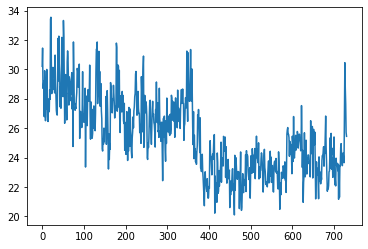

<Figure size 7200x7200 with 0 Axes>

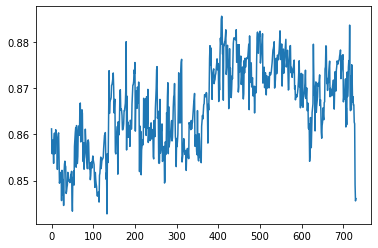

<Figure size 7200x7200 with 0 Axes>

In [51]:
intensity_red_dc  = list()
intensity_blue_dc  = list()

no_frames = list()
success = 1
c = 0
while success:
    try:
        img = cv.imread('./Frames/frame2'+str(c)+'.jpg')
        peaks = get_dc(img)
        peaks1 = get_bdc(img)
        intensity_red_dc.append(peaks)
        intensity_blue_dc.append(peaks1)
        
        no_frames.append(c)
        c = c + 1
    except:
        print("e")
        success = 0
        break


print(intensity_red_dc)       
print(no_frames)  

# plt.plot(no_frames,intensity_red_heart, lw=0.4, alpha=0.4 )
# # plt.plot(no_frames[index],intensity_red_heart[index], marker="o", ls="", ms=3 )

# plt.show()
        
plt.plot(no_frames,intensity_red_dc)
plt.figure(figsize=(100,100))
plt.show()
    
plt.plot(no_frames,intensity_blue_dc)
plt.figure(figsize=(100,100))

plt.show()

In [52]:
print("ACr / DCr : ",intensity_red_dc)

ACr / DCr :  [30.20978667865057, 31.448900913642536, 28.71181875610606, 28.88157594873312, 29.22760358242495, 26.78559190107985, 29.90873212238275, 28.504796232395954, 26.507888465970805, 28.511593801965986, 27.32416153245616, 29.998023096540702, 27.99321688633884, 26.783187102335233, 26.457109753071645, 27.988046256104393, 27.1268214258833, 27.124226493593227, 28.61338572730778, 27.968614789536133, 33.41627352744122, 33.547009285792754, 30.46593966719541, 28.35252108697645, 29.739254208434115, 29.48010079933288, 30.138260582724925, 28.64057515688382, 29.065250636730482, 28.723017339442915, 28.398252021617374, 30.973345331930258, 29.128376836533526, 28.30083145041186, 27.220422702975355, 26.957456150614608, 26.89253721575142, 28.886659907218768, 32.108807037451044, 29.215067464538386, 32.26140410911693, 30.394300186424978, 29.61202347653091, 27.447086943122105, 28.81781387568598, 27.358073645246826, 29.358819170573984, 32.17596215220253, 28.565737172410493, 30.785254563320848, 28.14729

In [53]:
print("ACr / DCr : ",intensity_blue_dc)

ACr / DCr :  [0.8611931448629931, 0.8558593405102148, 0.8558387070197748, 0.8587694158467961, 0.8567040049251796, 0.853740443444547, 0.85903335919442, 0.8602824525782641, 0.855814588362024, 0.8560482959767725, 0.861013145802278, 0.860310368063702, 0.858367884686256, 0.8587164495266993, 0.8524336354534895, 0.8592305225932996, 0.8600705982870342, 0.8603327804905467, 0.8547862492945002, 0.8494537734256763, 0.8500796210516608, 0.8504533354702355, 0.8514850050228948, 0.8518253094865961, 0.8456868390093212, 0.8522352424649426, 0.8469265982416825, 0.8485544446875907, 0.8502349199031464, 0.8446304270833238, 0.8513772122285285, 0.8535109810927635, 0.854209377228751, 0.8532648245601034, 0.8530174424257327, 0.8472279946858532, 0.8476309739621006, 0.8485511084403377, 0.8491083791096348, 0.8517955219624529, 0.8510157750324909, 0.8499561118595931, 0.8499184549989836, 0.8501061863919794, 0.8495673313134817, 0.8502611081024886, 0.8513405027921094, 0.8506446174244323, 0.8520111163360037, 0.847169231405

In [67]:
ff = list()
A = 100
B = 5
for i in range(len(intensity_blue_dc)):
    ff.append(A - B*(intensity_red_dc[i] / intensity_blue_dc[i]))
    spo2 = A - B*(intensity_red_dc[i] / intensity_blue_dc[i])
    print(spo2)
print("Avg : ",sum(ff)/len(ff))

-75.39495558488585
-83.727041495478
-67.7408285031133
-68.1567567252859
-70.58169107647365
-56.87198671887478
-74.0836476387274
-65.6711475804671
-54.86934218254714
-66.53028769500409
-58.67447358771713
-74.34419141115993
-63.060718986304465
-55.94895798896937
-55.18574498175815
-62.8669229046464
-57.70113220885952
-57.63799258077478
-67.3715841295055
-64.62705602415735
-96.54790386635119
-97.23015882607967
-78.89886191463958
-66.42215705039808
-75.82899979425082
-72.95753173775591
-77.92722914415154
-68.76097542231554
-70.9248229891653
-70.03304888404969
-66.77831878588415
-81.4466715605381
-70.49904632885551
-65.83849841110126
-59.55372861760256
-59.09209988162786
-58.63352120113677
-70.21166798257627
-89.07366731629693
-71.49108390021672
-89.54645175575757
-78.79923305643518
-74.20508580771039
-61.433285526441296
-69.60288380634836
-60.8804247574096
-72.4270081964089
-89.12693675547126
-67.63711543609224
-81.69483393681298
-66.86822032457573
-95.88541793542726
-89.4725525437367
-71.

In [56]:
# new_723 = 29.49042542206561
# 97 = A - 29.49B
# 98 = A - 27.55B
# ----------------
# -1 = -1.94
# -1//-1.94 = A

A = 100
B = 5

spo2 = A - B*(intensity_red_dc[1] / intensity_blue_dc[1])

print(spo2)




-83.727041495478


In [31]:
plt.plot(no_frames,sd_red_lis,'ro')
plt.show()

NameError: name 'sd_red_lis' is not defined

In [6]:
def find_peak(red_img):
    sd_red_instance =  cv.meanStdDev(red_img)
    return sd_red_instance[1][0][0]
    

e
[5.5925587085174975, 5.348949964382568, 5.365744455842192, 5.380846993756555, 5.376258968816525, 5.34534288332494, 5.412937532057889, 5.365056158117343, 5.353716024768739, 5.363811549959147, 5.383031779719891, 5.358508753387318, 5.2571290252588705, 5.397594496481058, 5.457495171579034, 5.440253988457583, 5.4646450519663565, 5.432273337534493, 5.388688265975714, 5.403105046148587, 5.494392482329586, 5.409665171504649, 5.4705707798604974, 5.483033889102074, 5.503520129217609, 5.493641469928161, 5.456735438007873, 5.572620970481815, 5.536167173844397, 5.615775523722628, 5.603929797689414, 5.606000881038184, 5.616961526095369, 5.563224620400596, 5.484890067621556, 5.290854036970819, 5.313877252301229, 5.289845004231317, 5.32551318060086, 5.49150517715982, 5.5716302244262845, 5.612925937836332, 5.660482538534925, 5.640704224153383, 5.682878177770408, 5.727501157577882, 5.701113803725391, 5.608236668606476, 5.684655133438751, 5.572940056955936, 5.583824005816808, 5.58433133929347, 5.615571

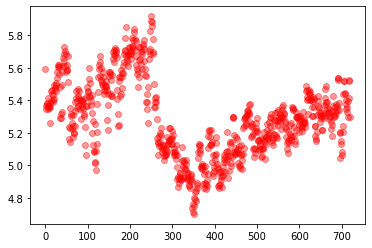

In [50]:
intensity_red_heart  = list()
no_frames = list()
success = 1
c = 0
while success:
    try:
        img = cv.imread('./Frames/frame'+str(c)+'.jpg')
        peaks = find_peak(img)
        intensity_red_heart.append(peaks)
        no_frames.append(c)
        c = c + 1
    except:
        print("e")
        success = 0
        break

print(intensity_red_heart)       
print(no_frames)  

# plt.plot(no_frames,intensity_red_heart, lw=0.4, alpha=0.4 )
# # plt.plot(no_frames[index],intensity_red_heart[index], marker="o", ls="", ms=3 )

# plt.show()
        
plt.plot(no_frames,intensity_red_heart, 'ro',lw=0.4, alpha=0.4)
plt.show()
    

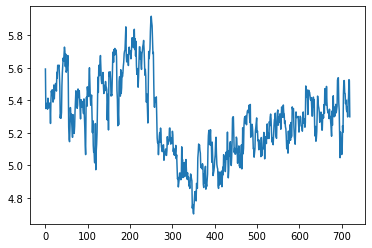

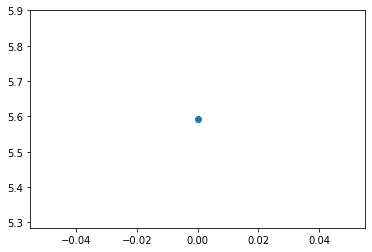

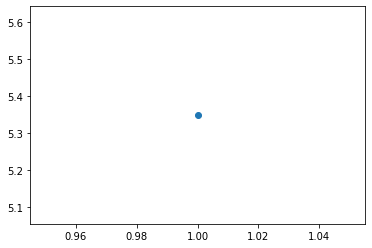

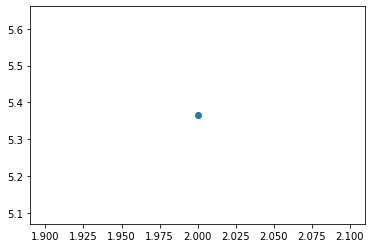

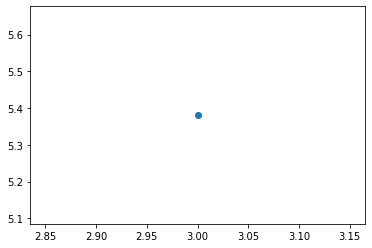

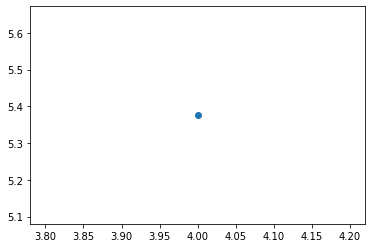

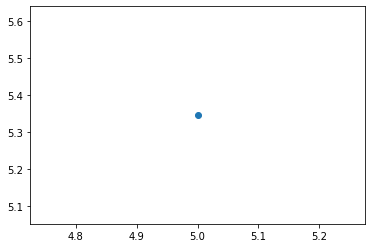

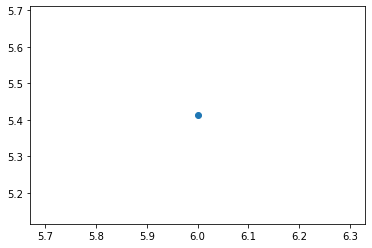

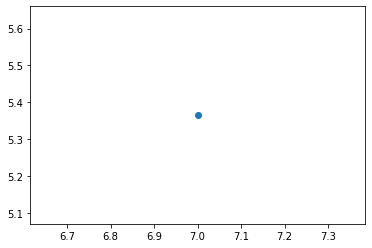

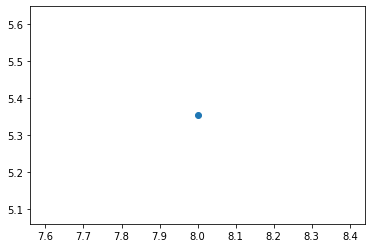

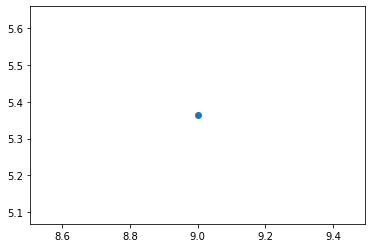

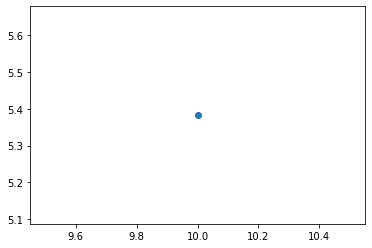

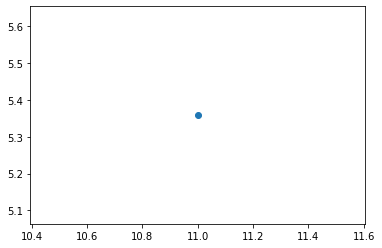

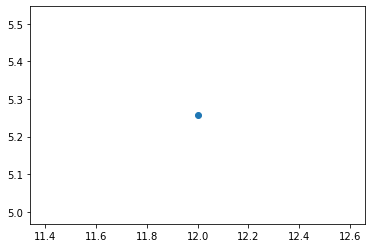

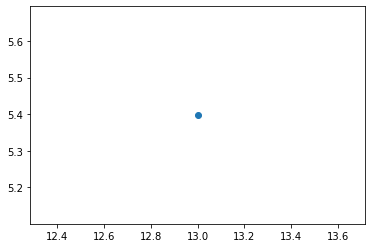

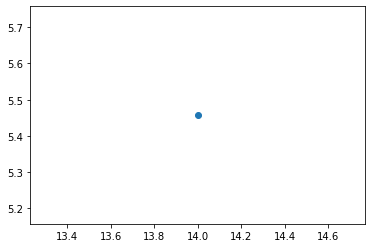

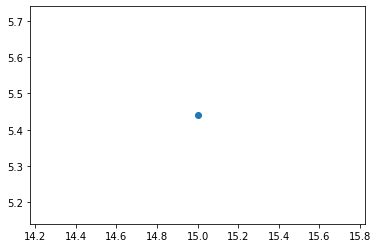

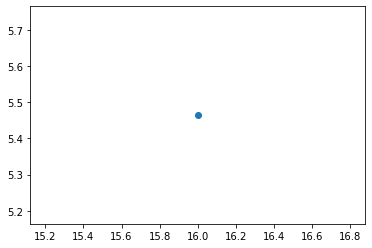

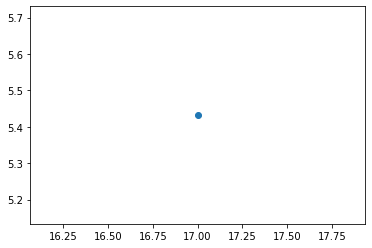

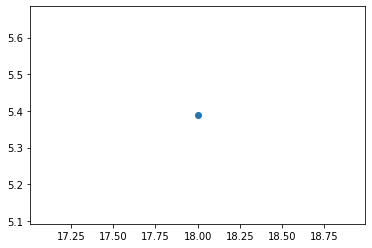

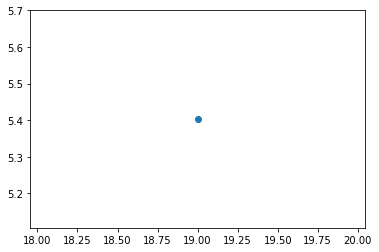

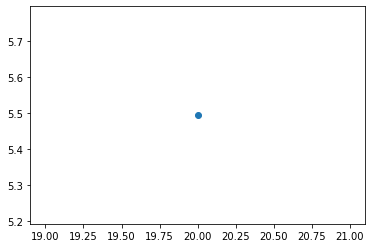

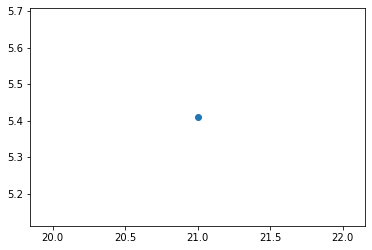

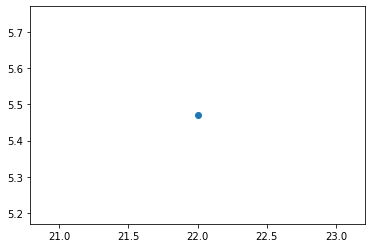

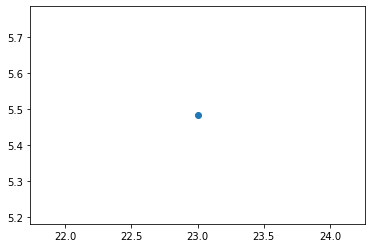

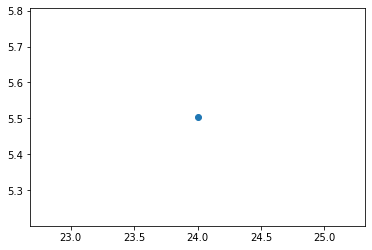

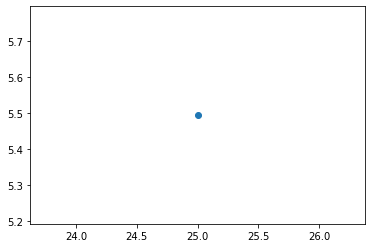

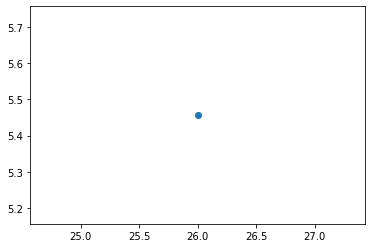

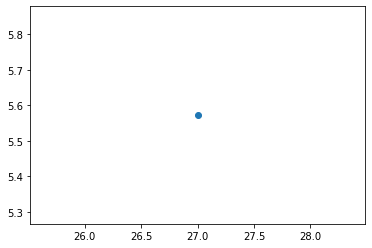

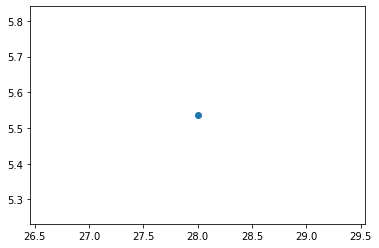

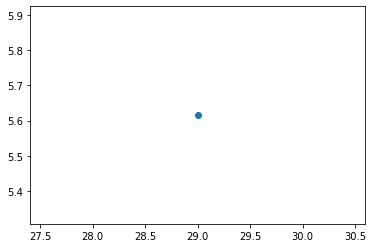

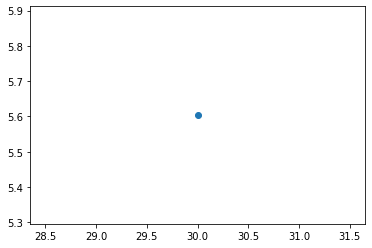

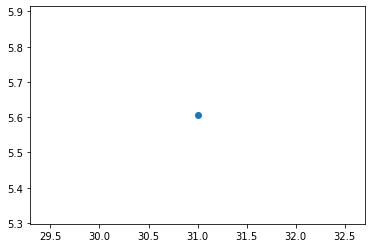

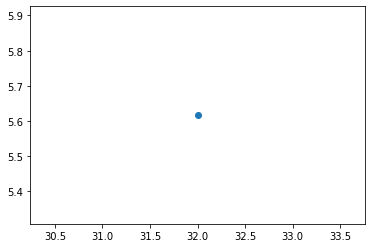

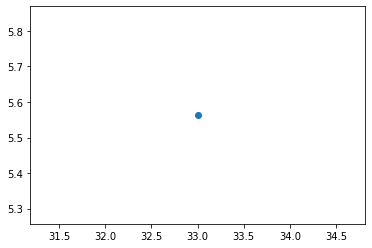

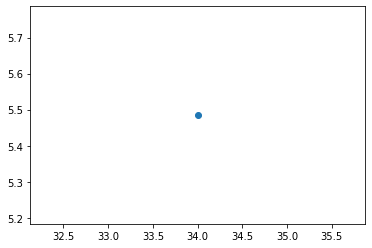

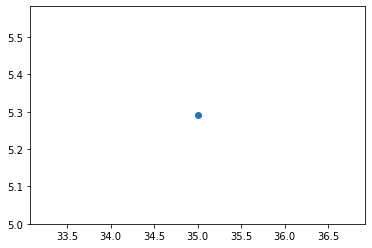

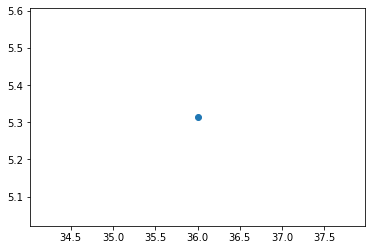

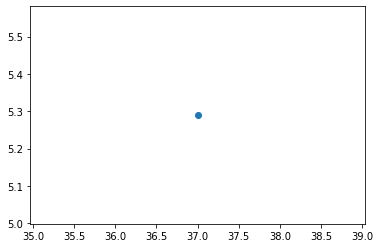

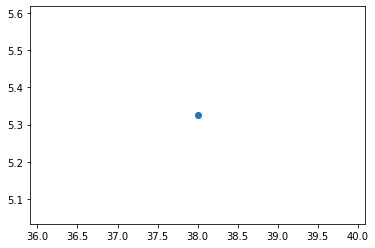

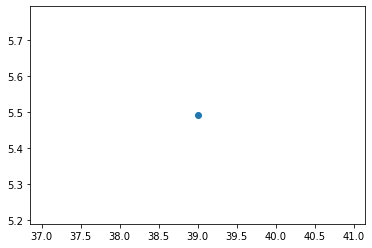

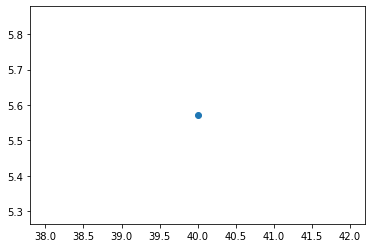

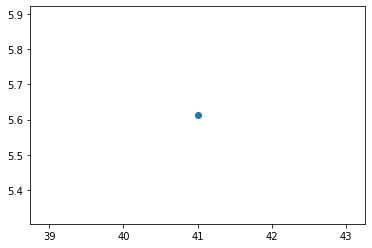

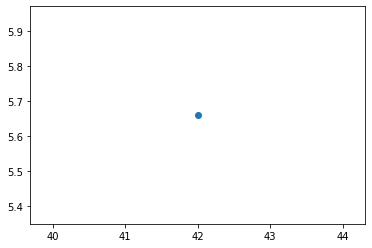

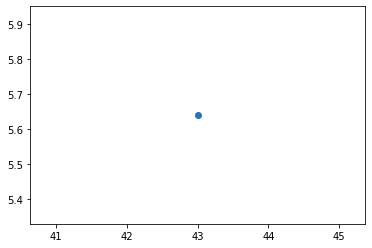

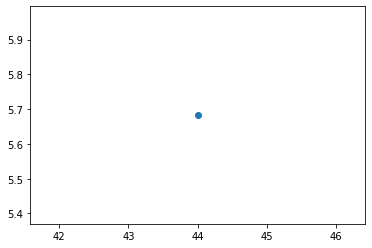

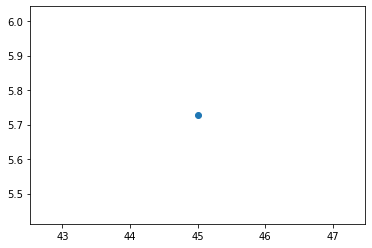

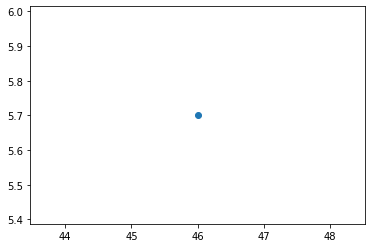

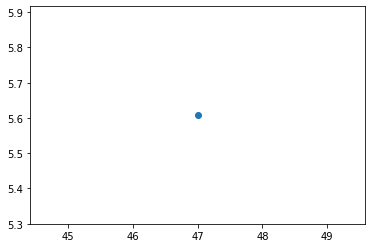

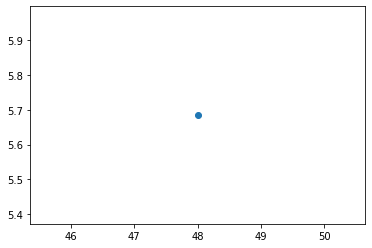

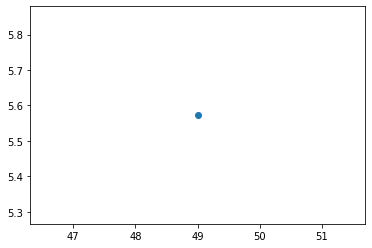

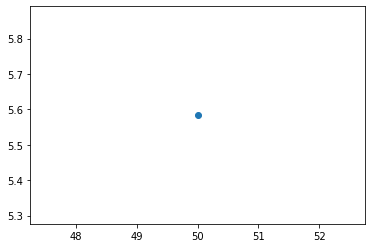

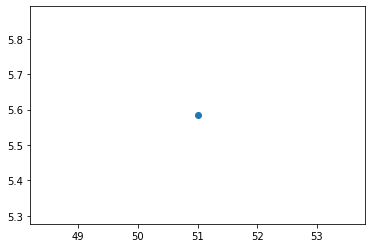

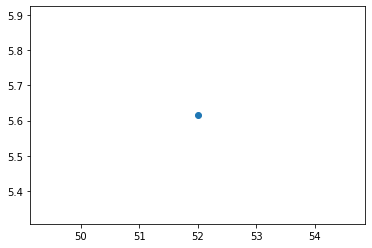

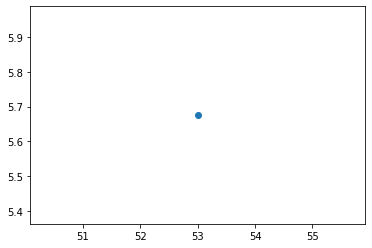

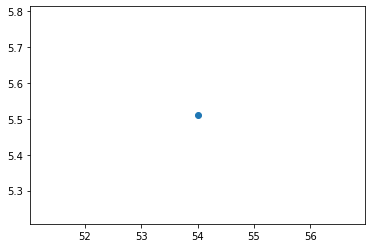

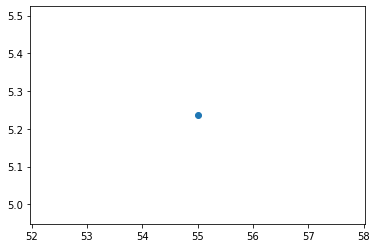

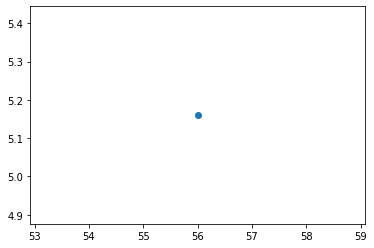

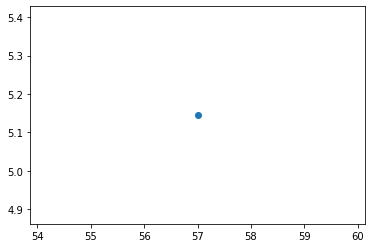

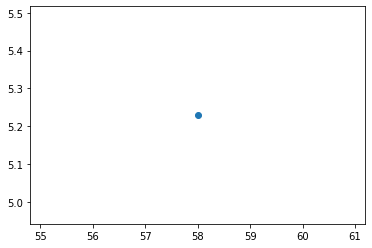

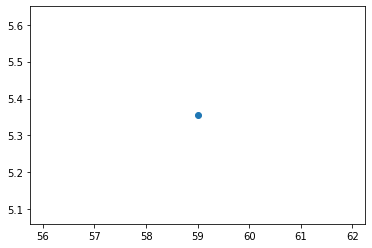

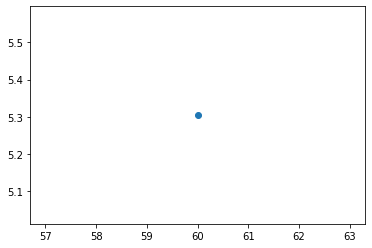

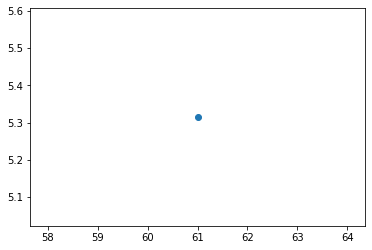

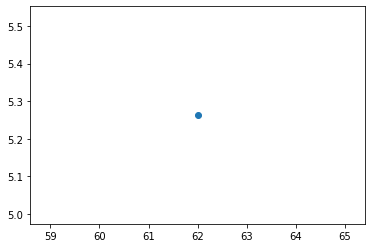

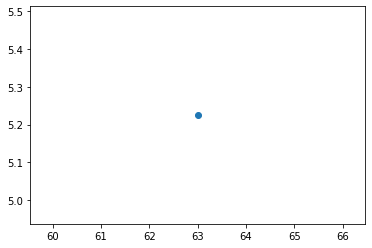

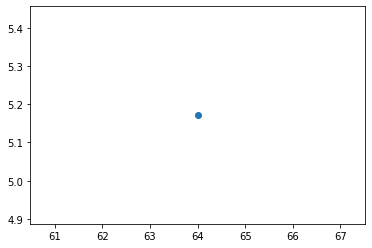

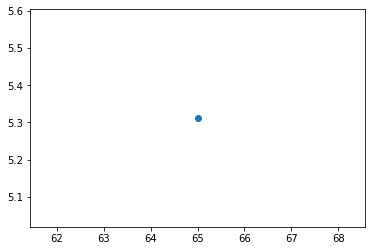

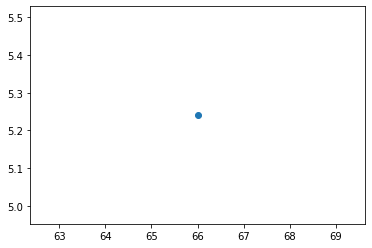

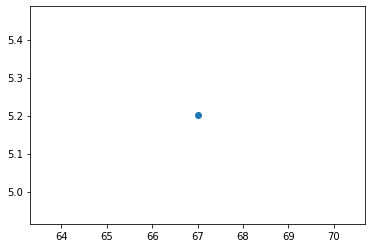

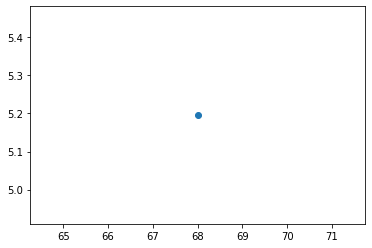

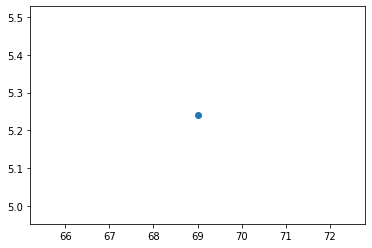

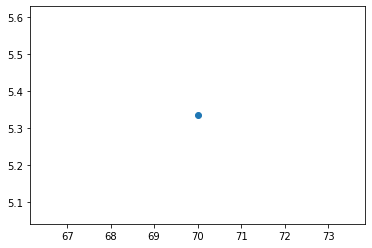

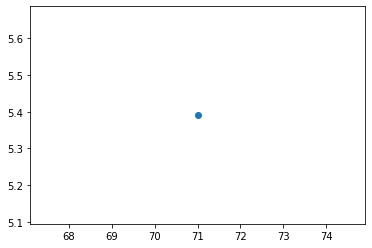

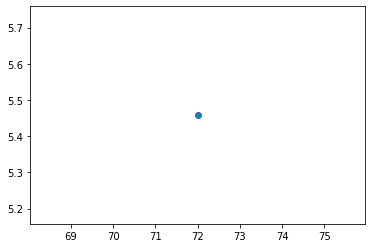

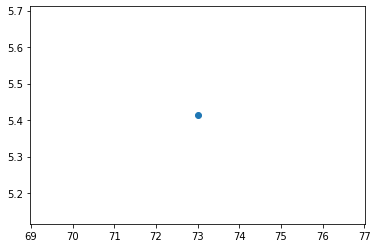

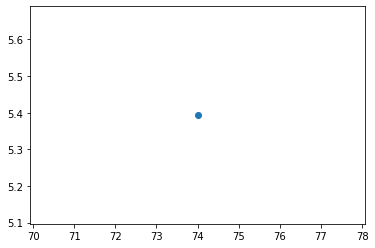

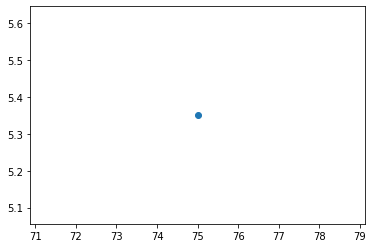

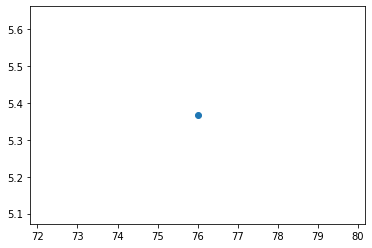

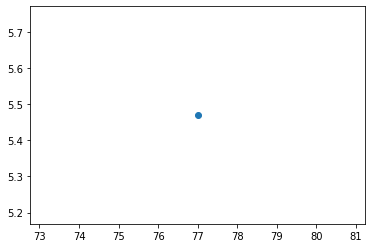

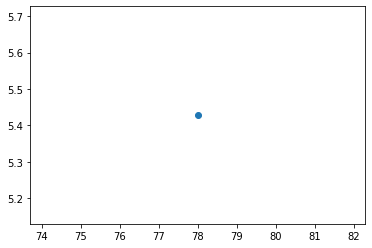

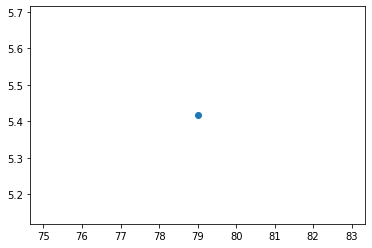

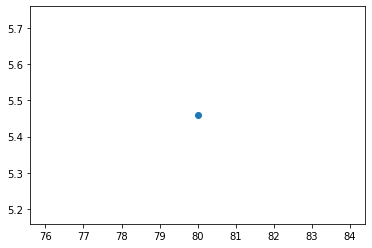

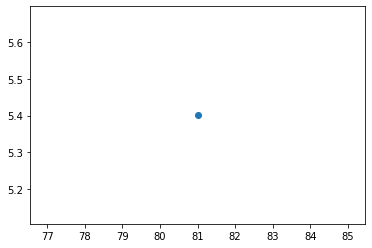

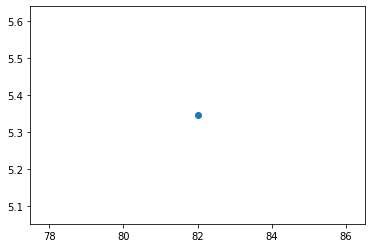

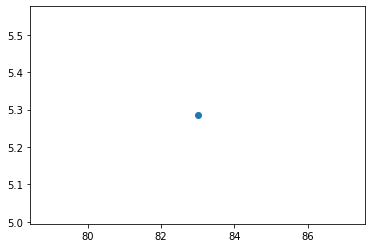

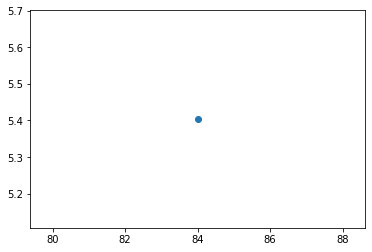

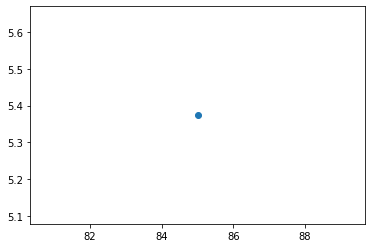

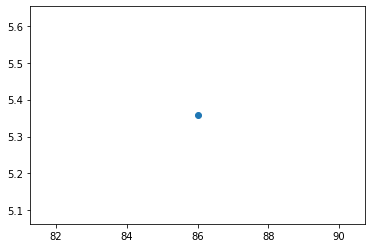

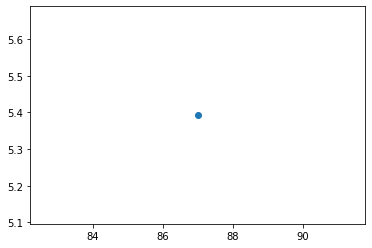

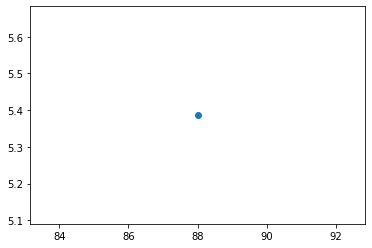

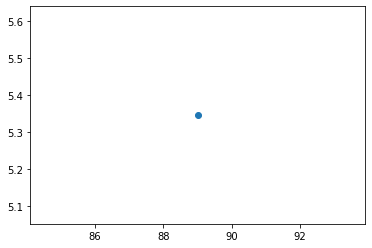

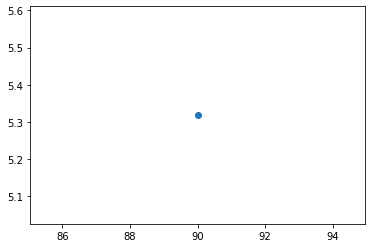

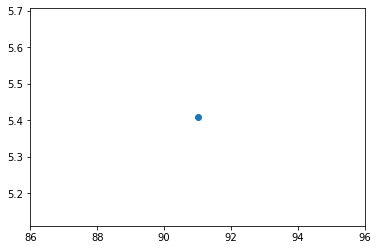

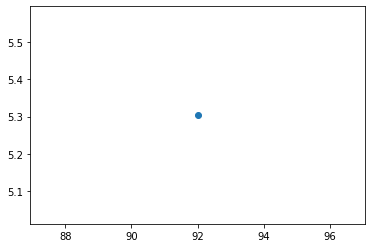

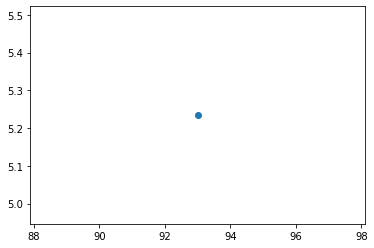

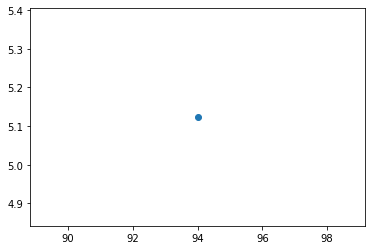

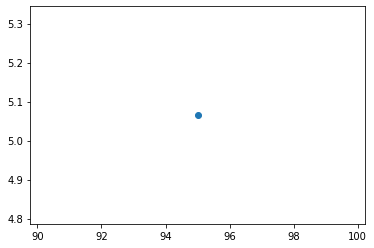

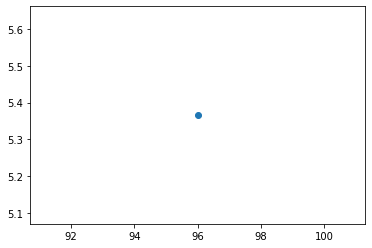

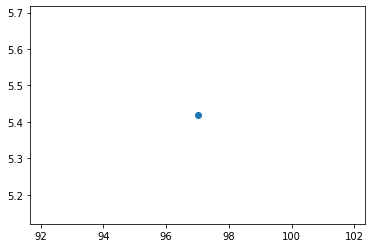

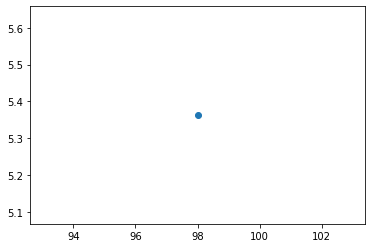

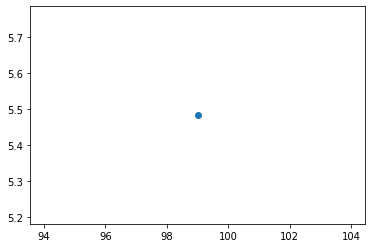

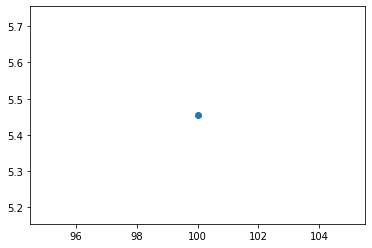

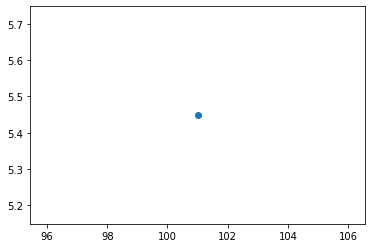

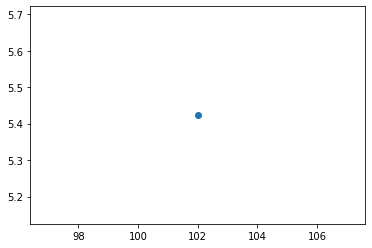

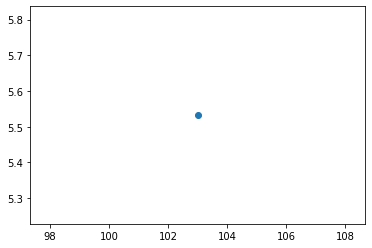

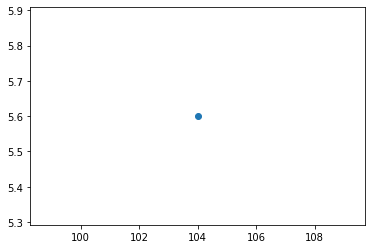

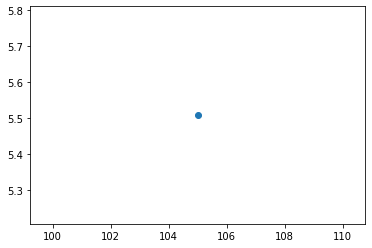

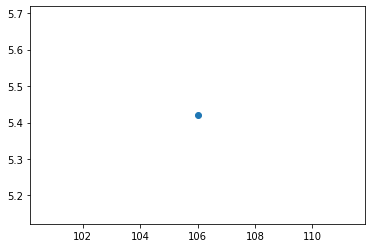

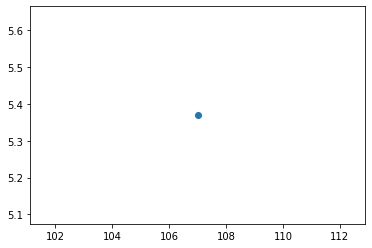

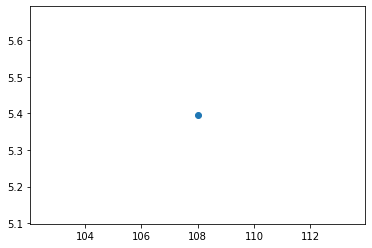

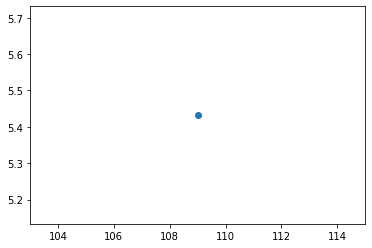

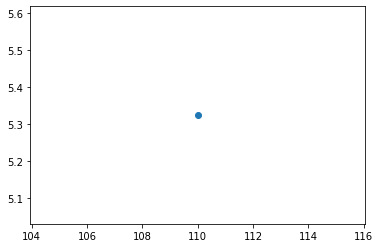

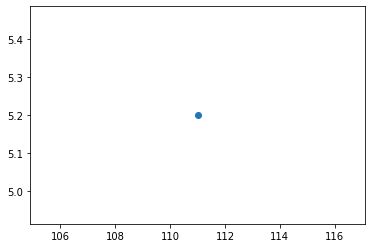

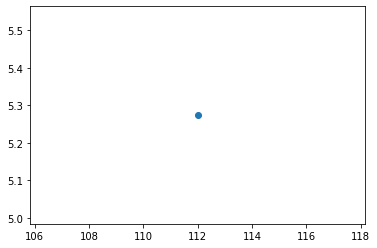

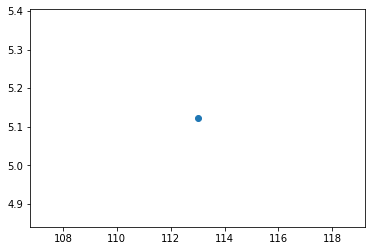

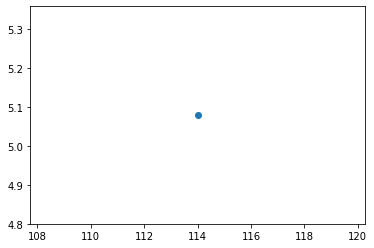

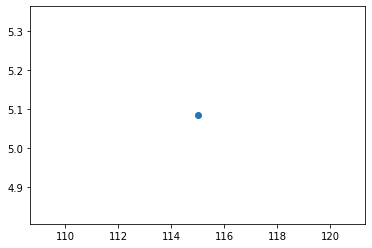

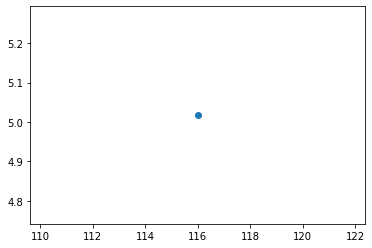

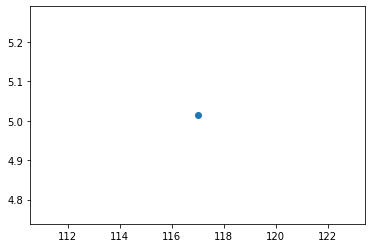

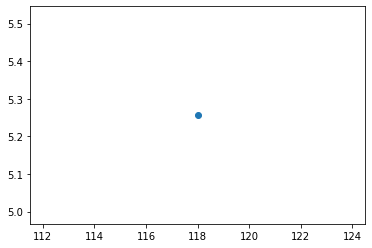

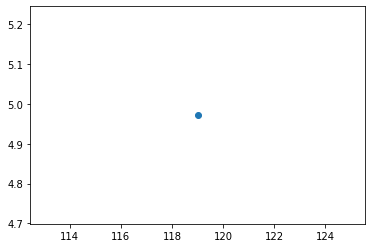

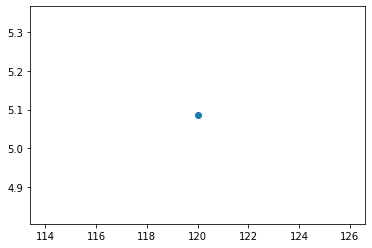

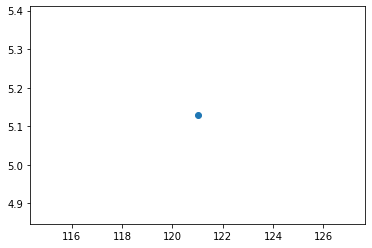

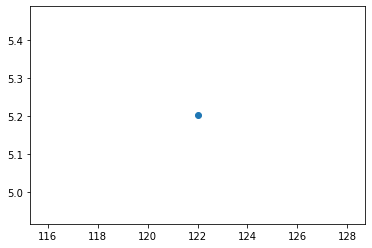

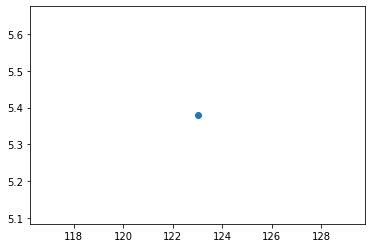

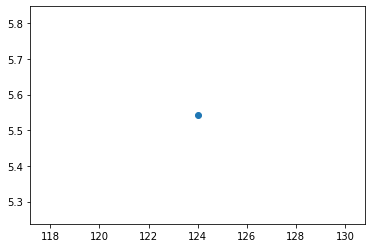

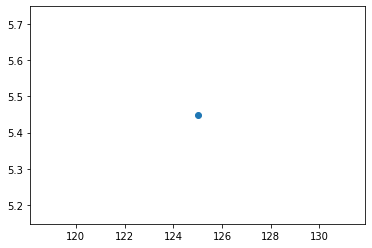

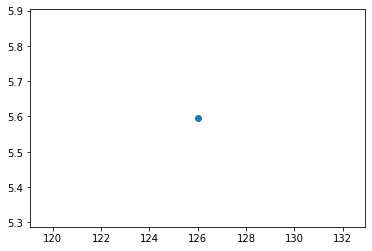

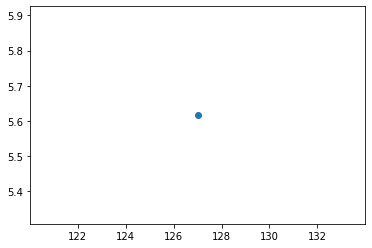

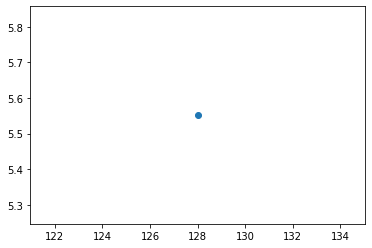

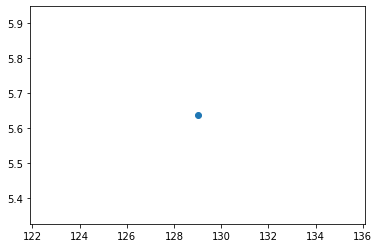

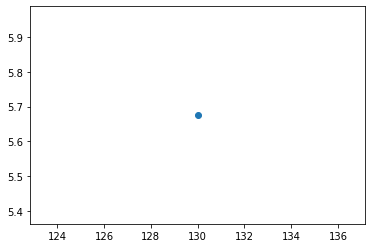

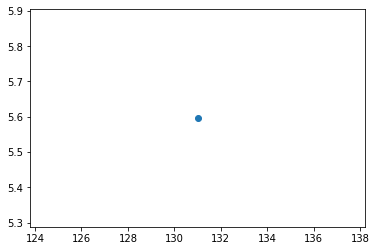

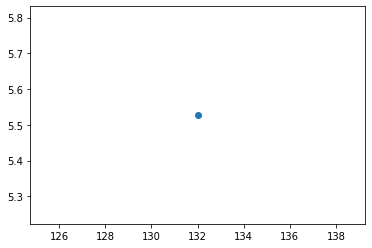

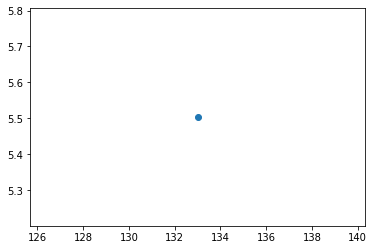

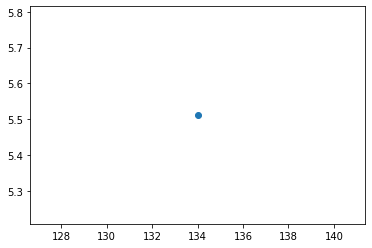

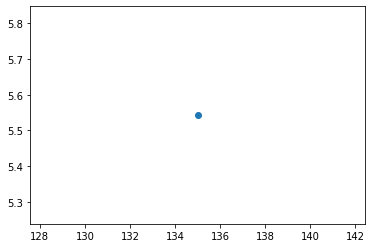

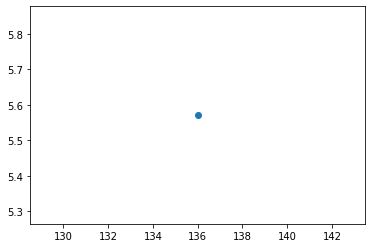

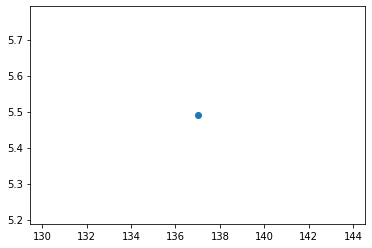

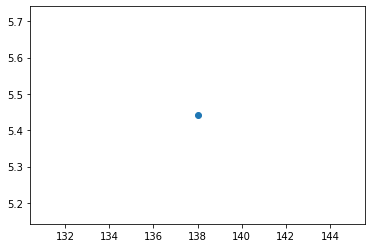

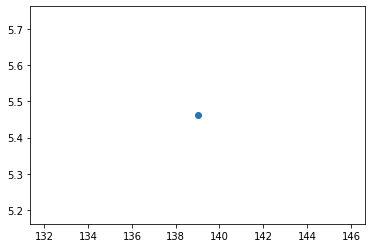

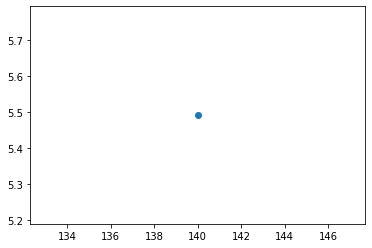

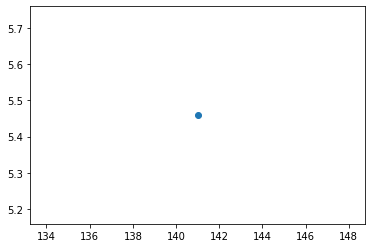

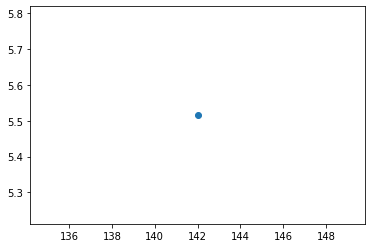

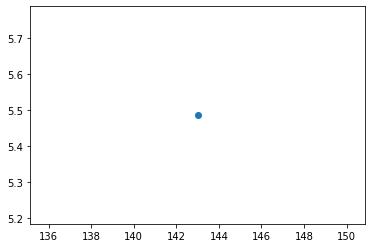

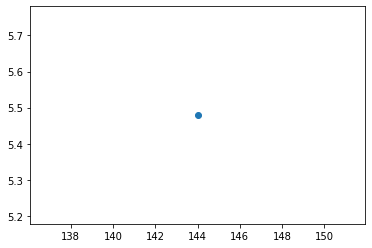

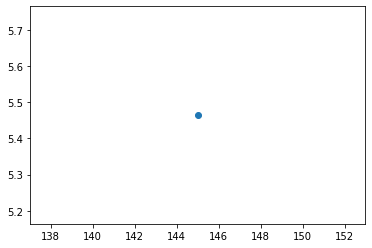

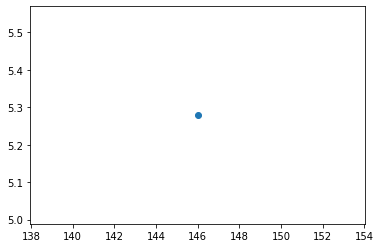

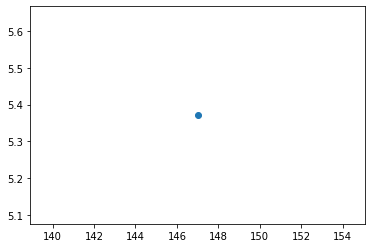

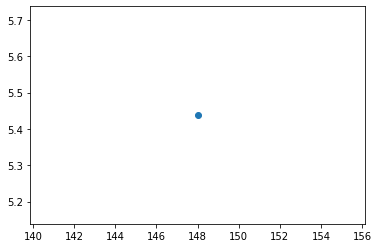

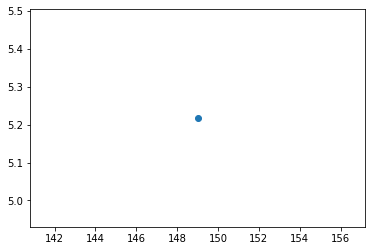

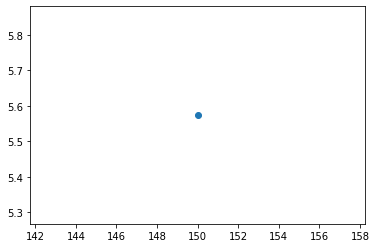

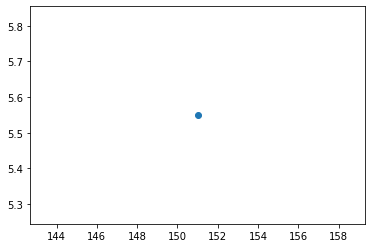

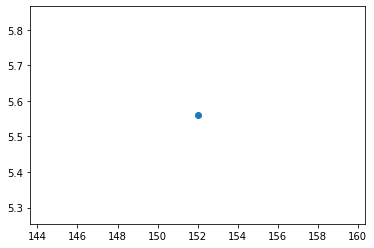

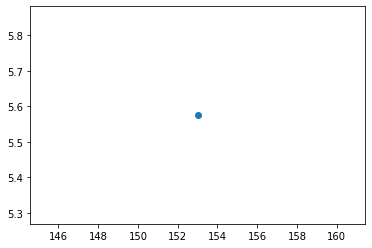

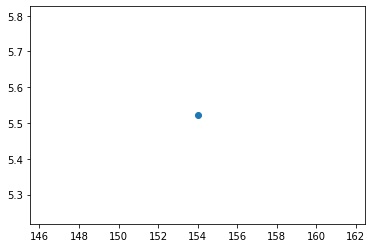

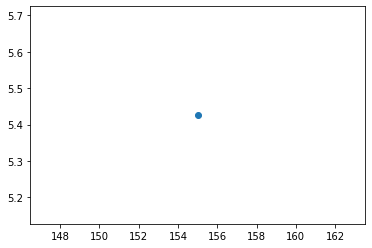

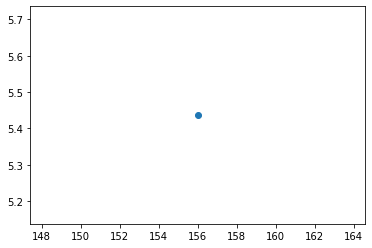

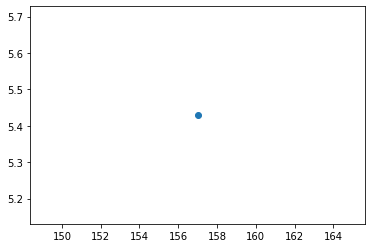

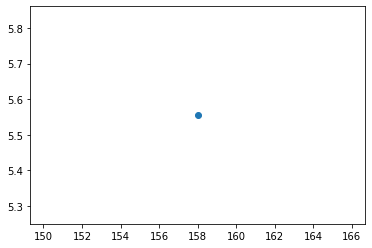

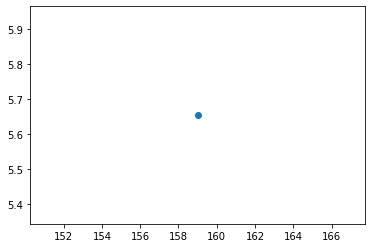

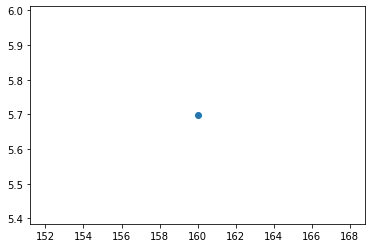

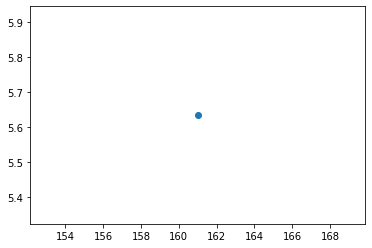

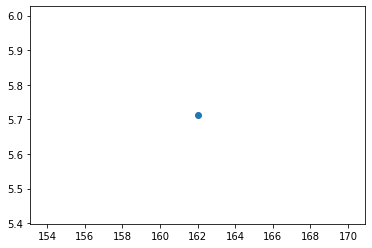

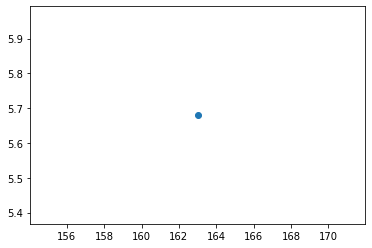

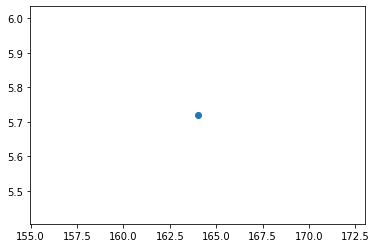

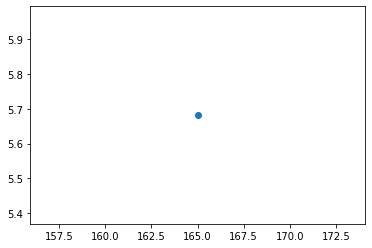

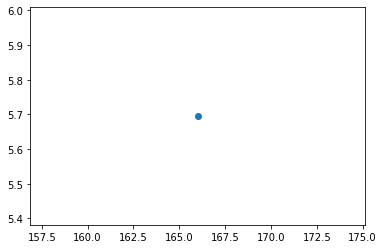

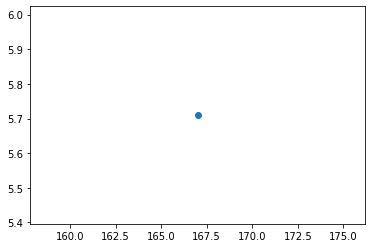

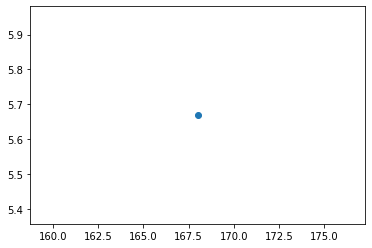

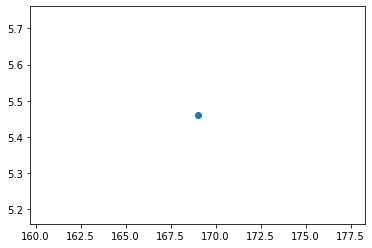

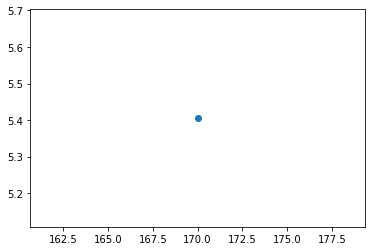

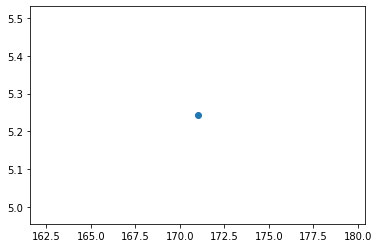

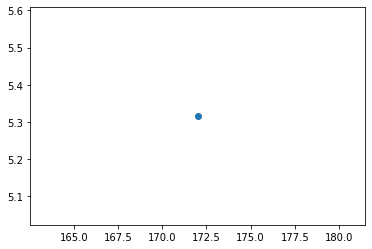

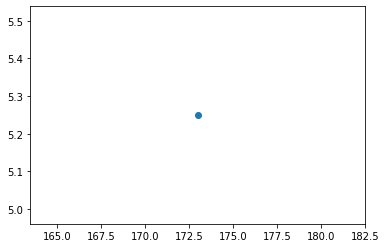

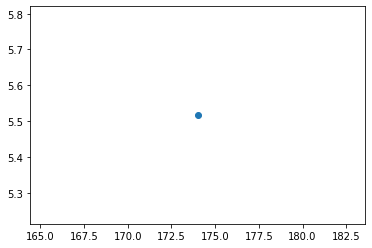

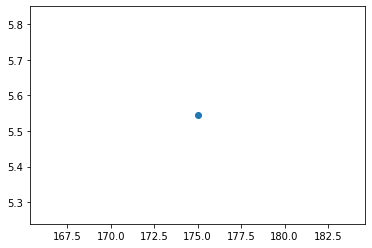

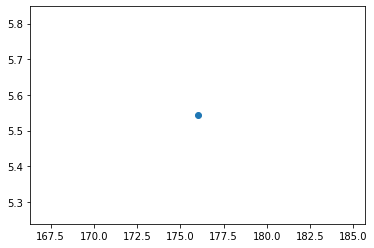

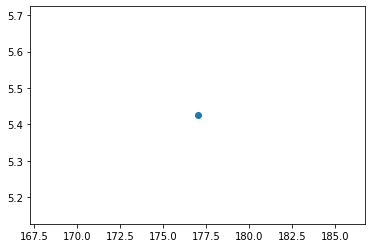

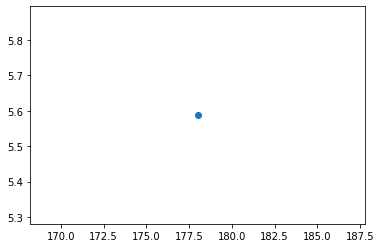

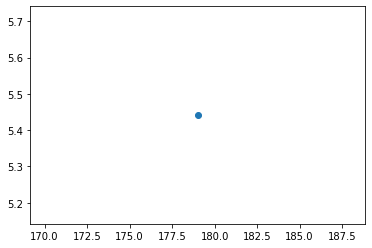

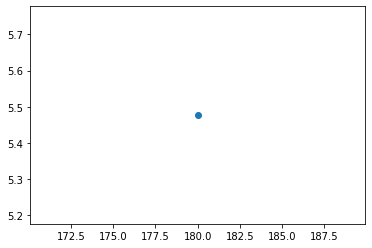

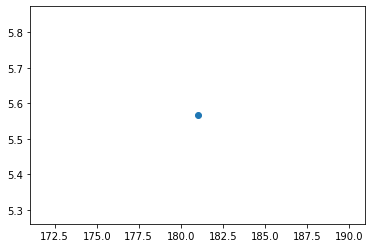

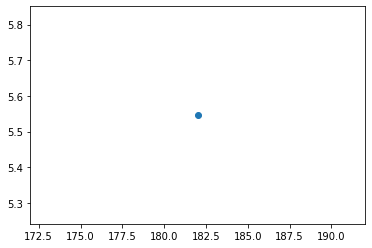

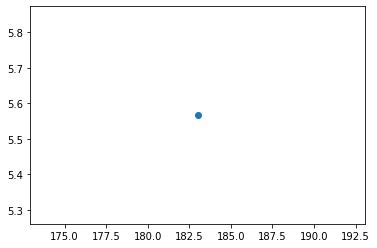

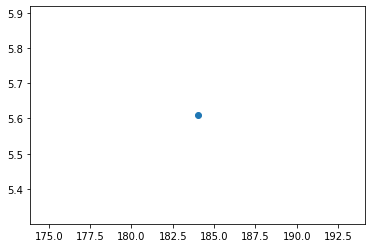

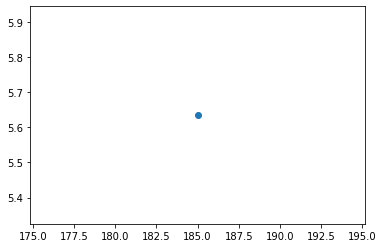

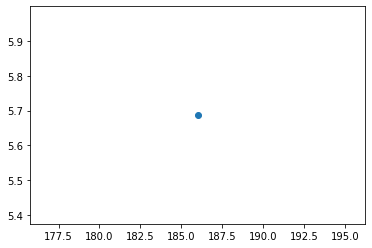

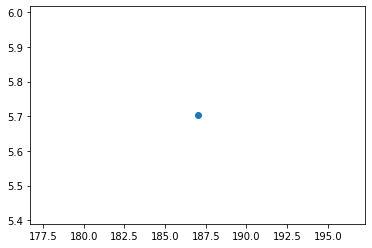

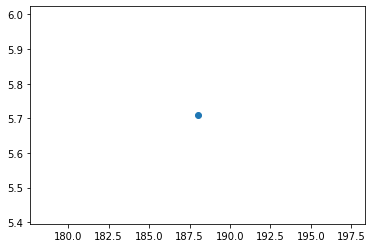

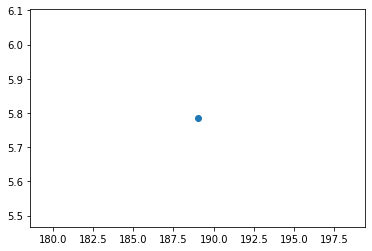

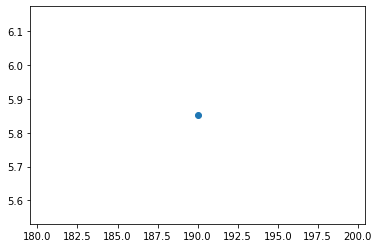

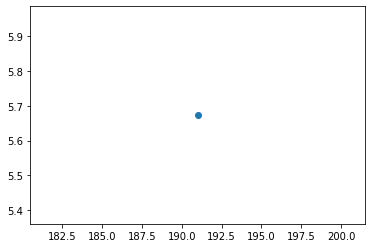

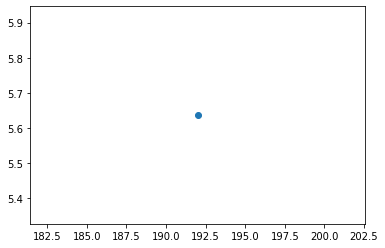

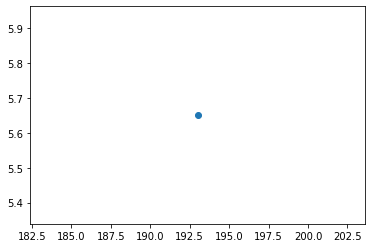

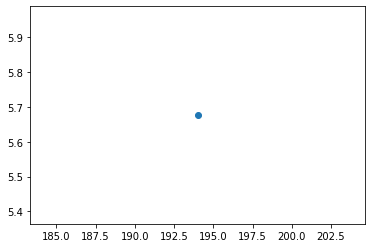

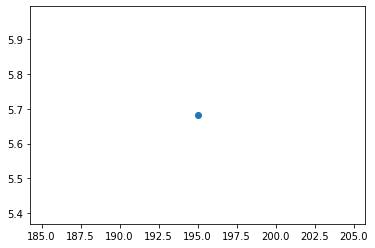

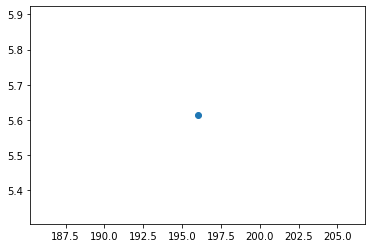

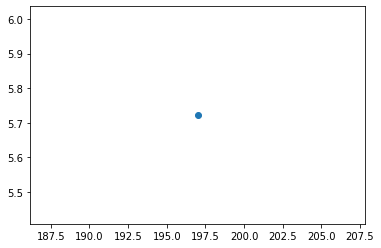

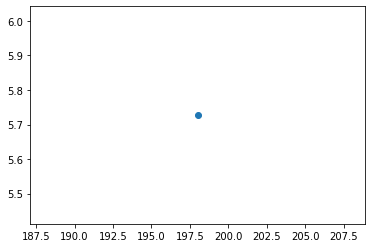

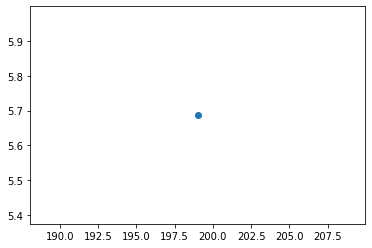

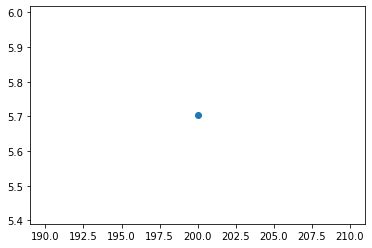

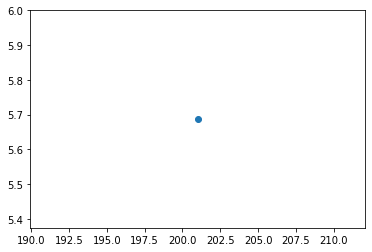

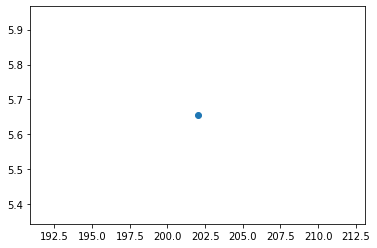

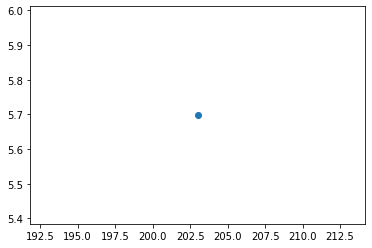

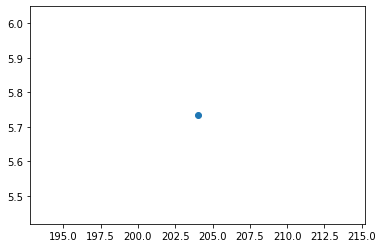

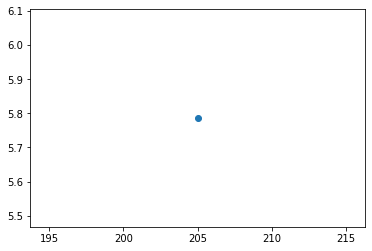

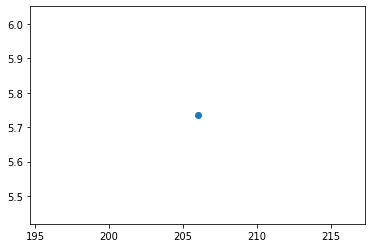

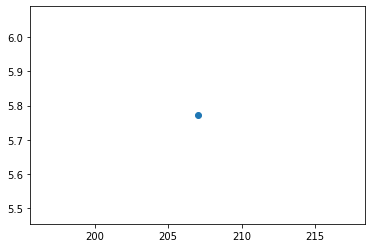

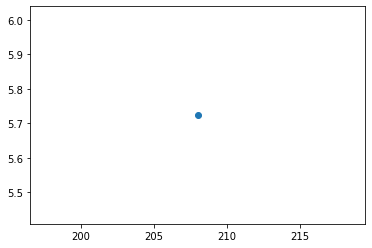

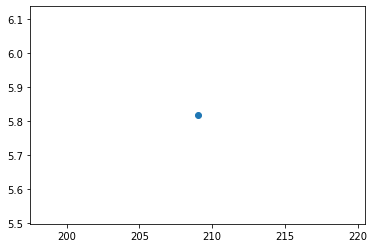

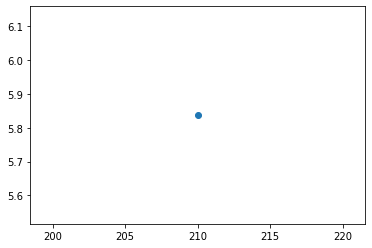

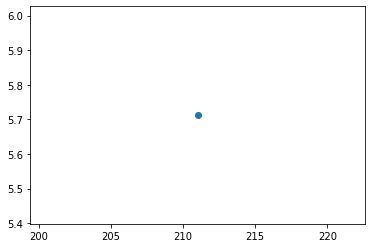

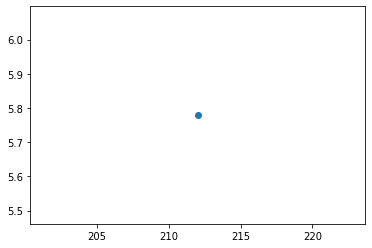

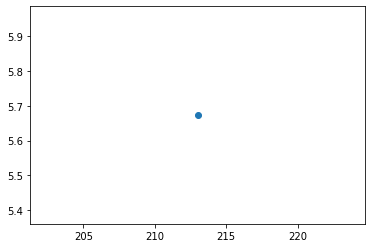

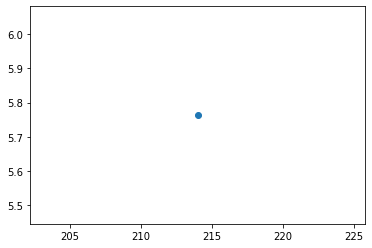

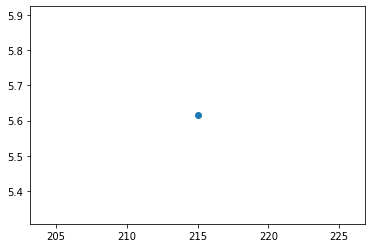

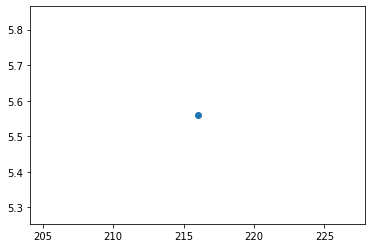

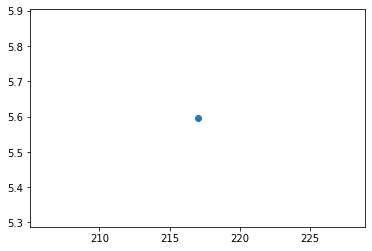

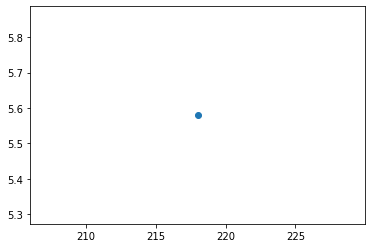

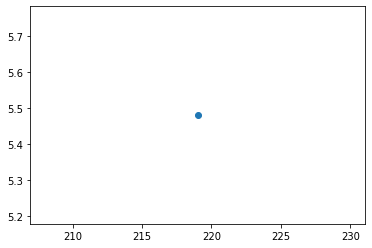

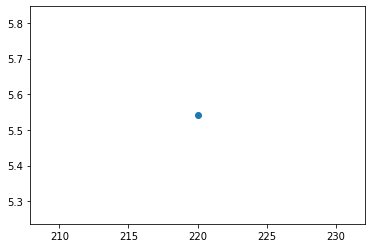

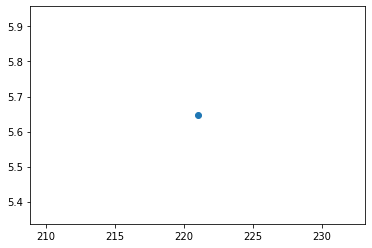

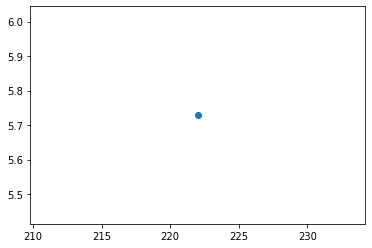

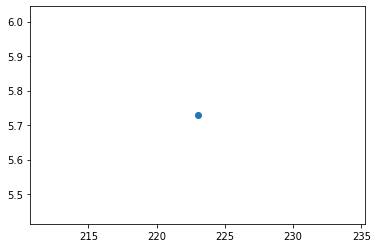

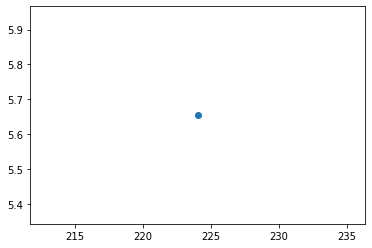

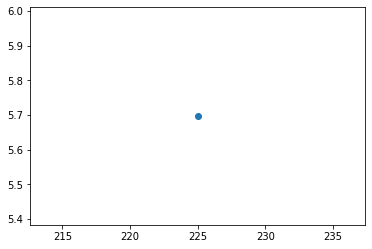

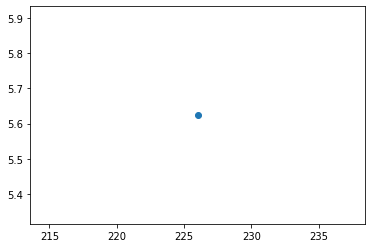

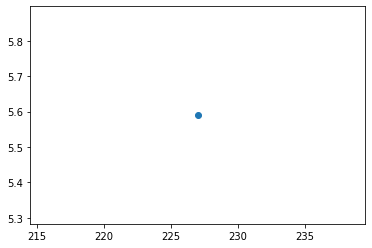

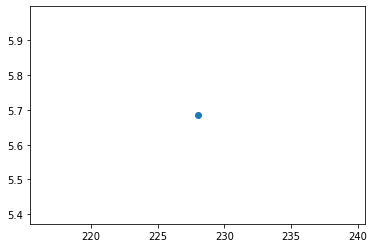

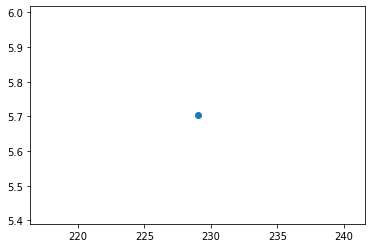

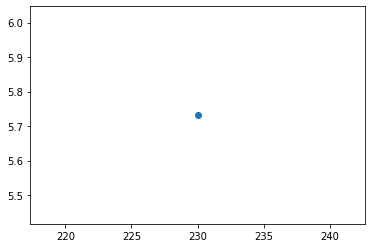

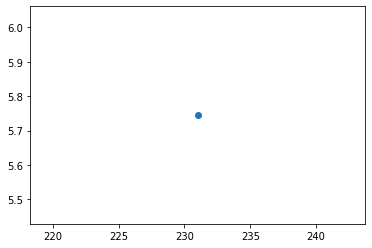

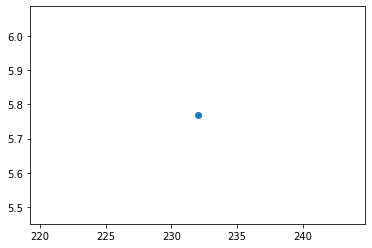

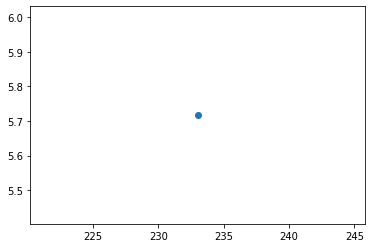

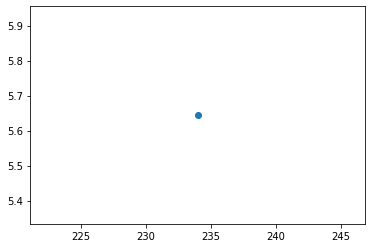

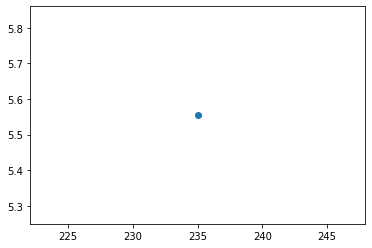

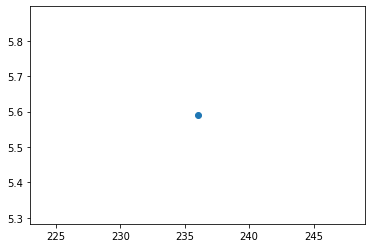

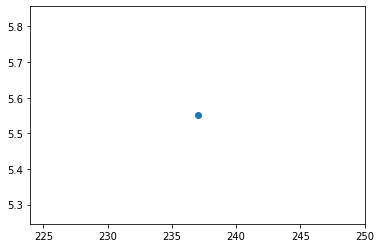

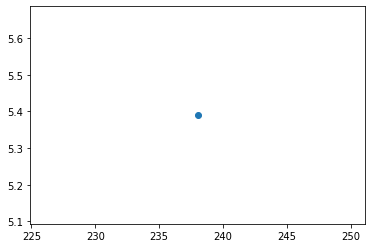

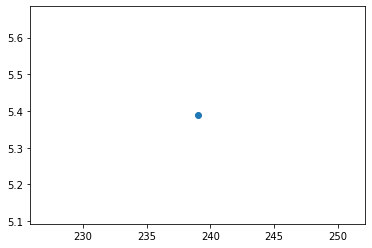

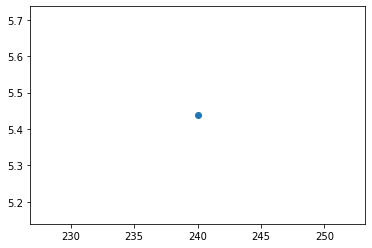

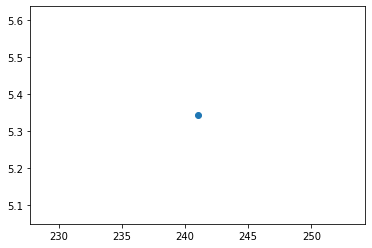

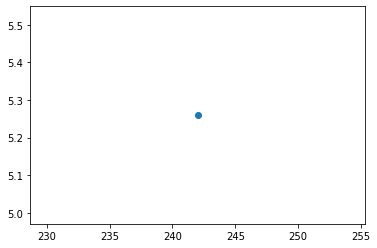

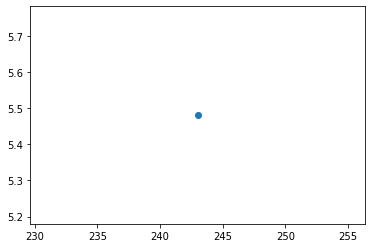

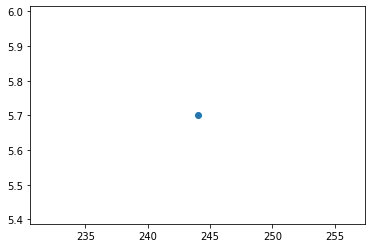

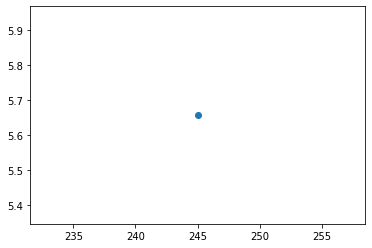

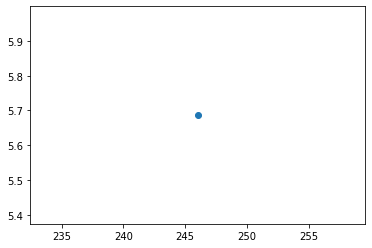

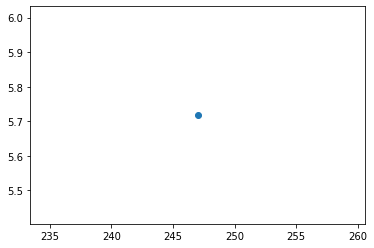

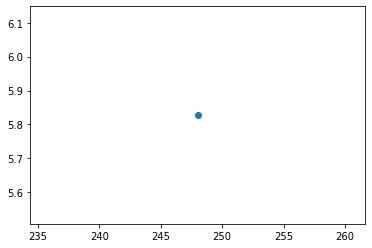

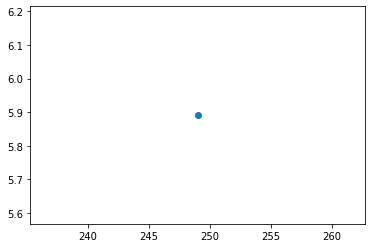

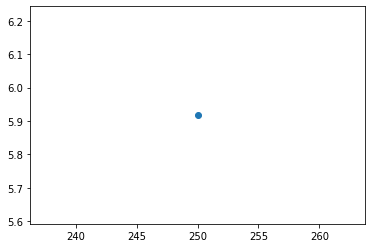

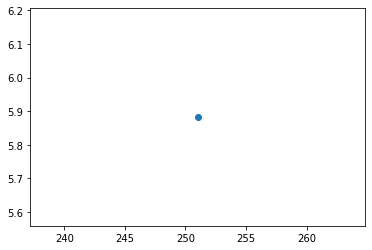

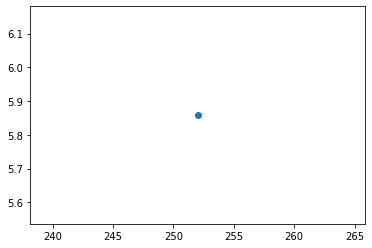

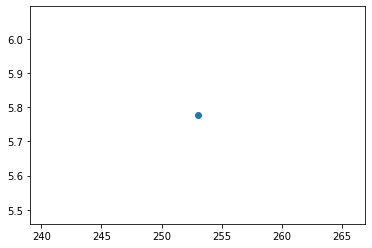

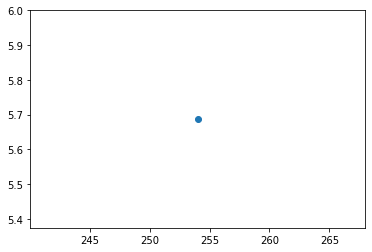

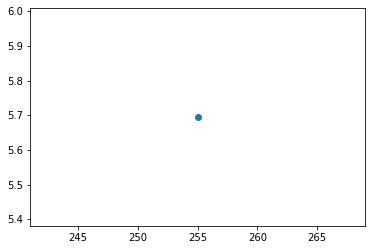

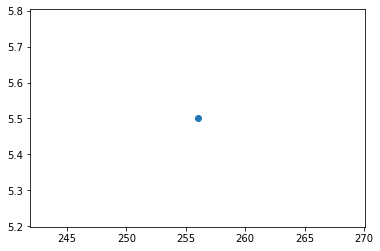

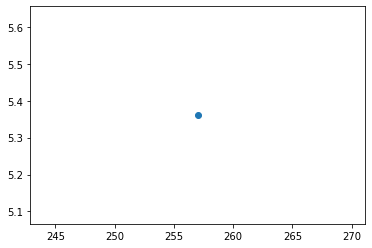

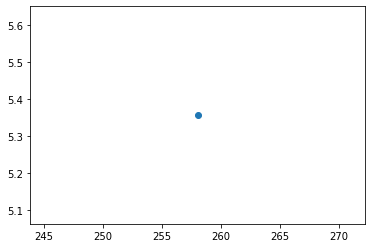

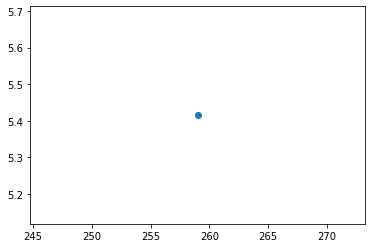

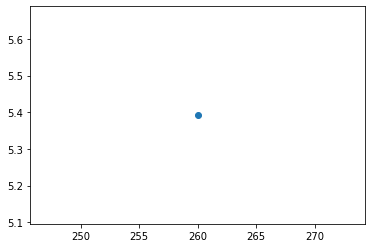

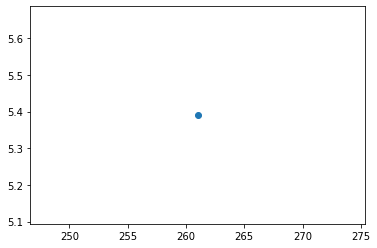

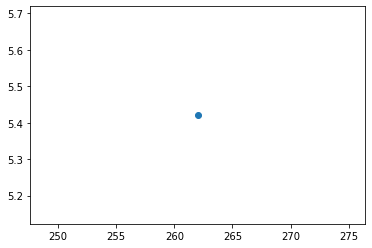

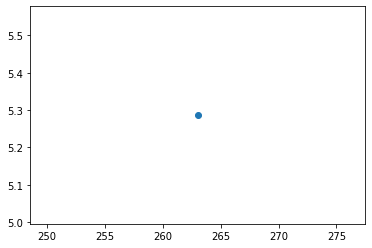

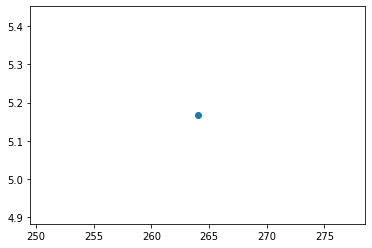

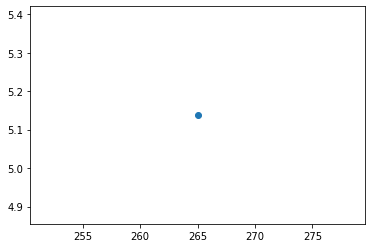

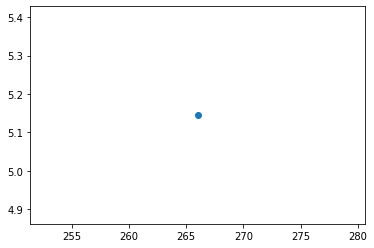

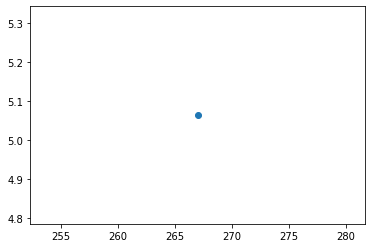

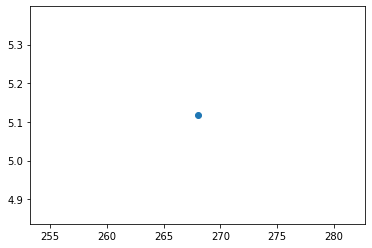

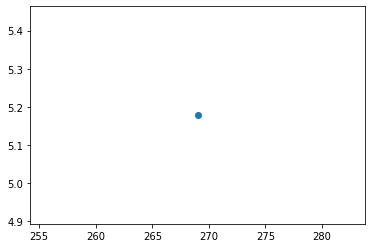

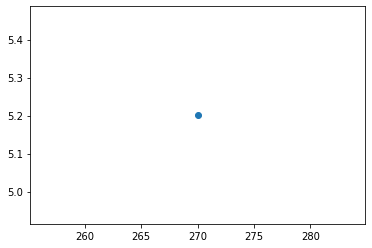

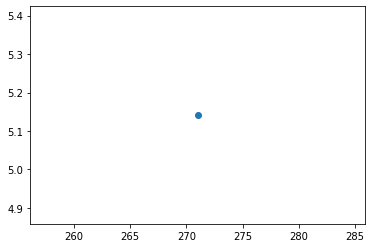

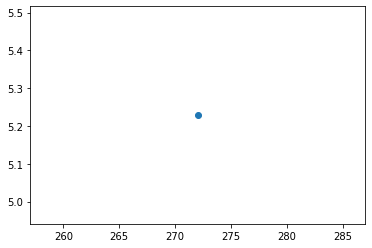

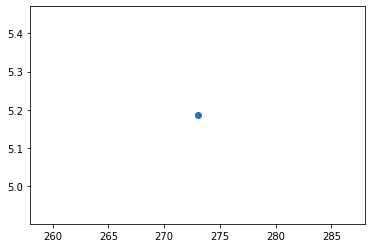

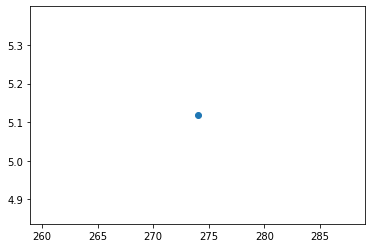

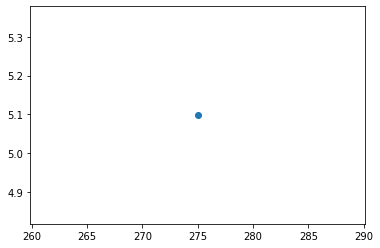

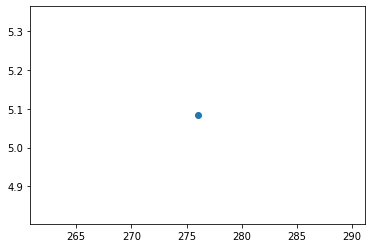

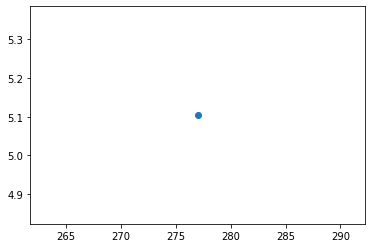

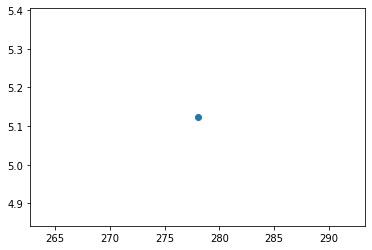

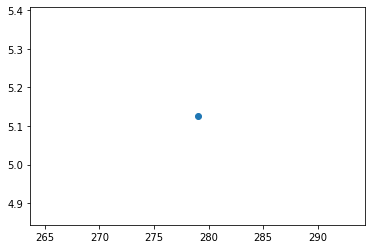

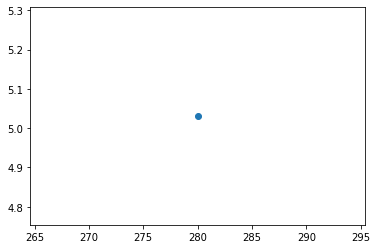

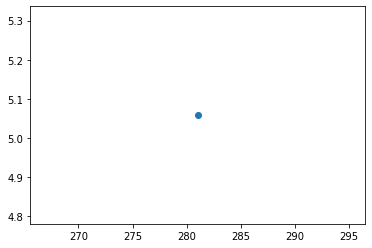

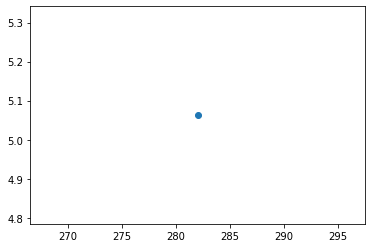

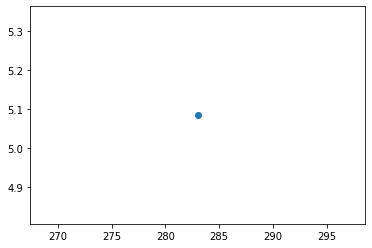

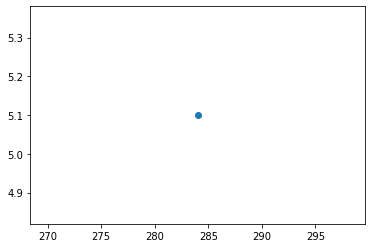

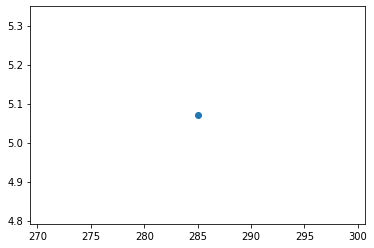

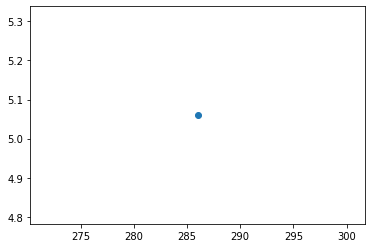

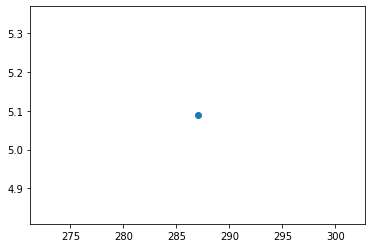

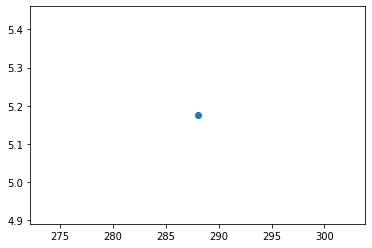

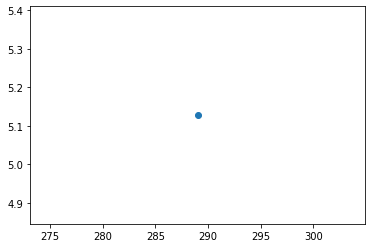

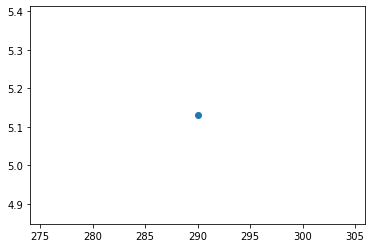

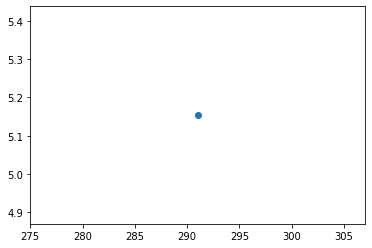

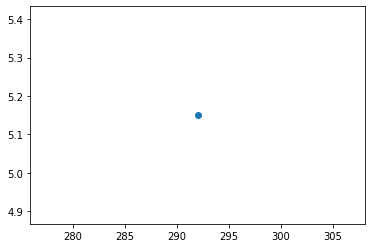

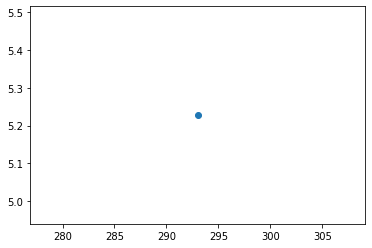

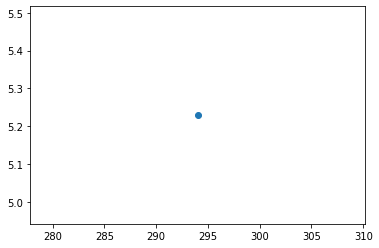

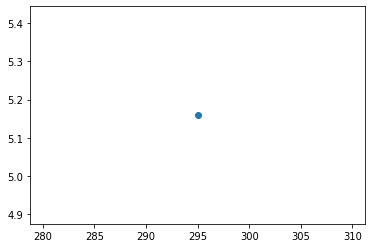

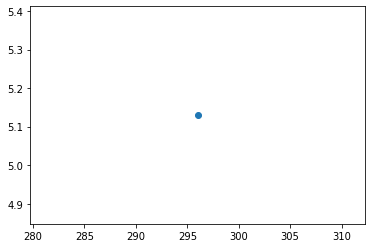

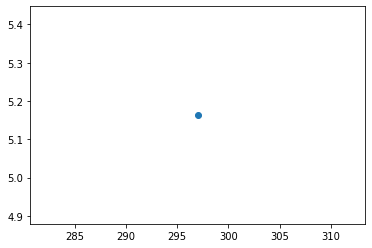

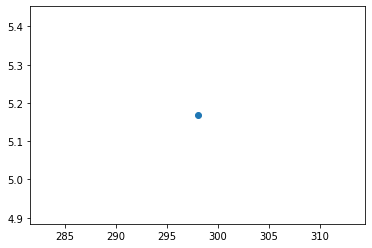

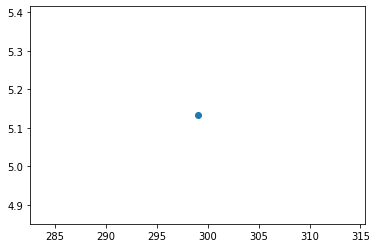

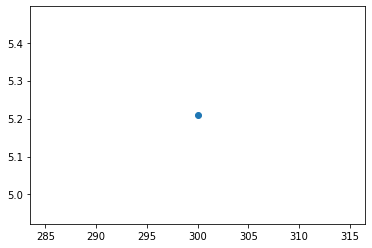

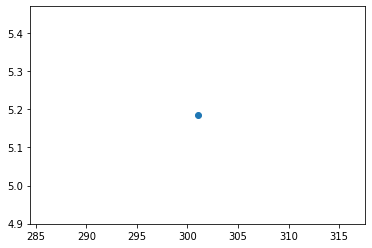

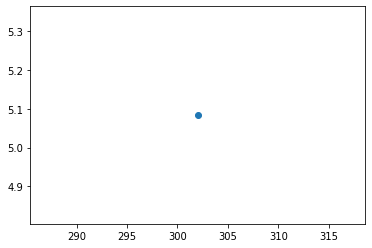

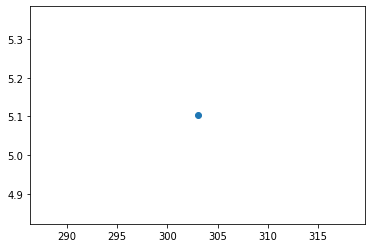

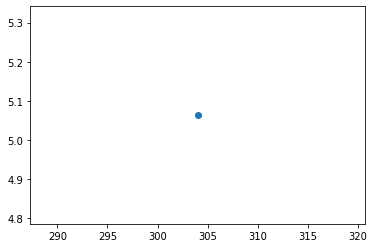

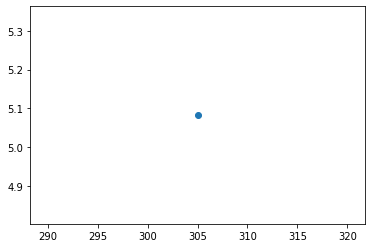

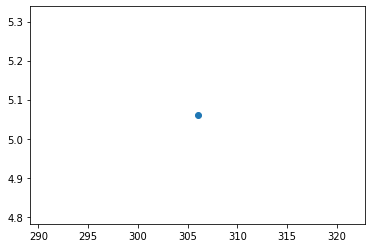

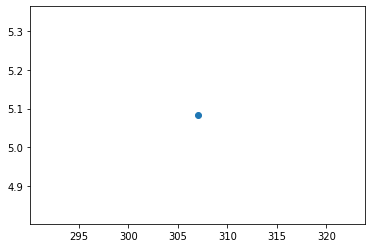

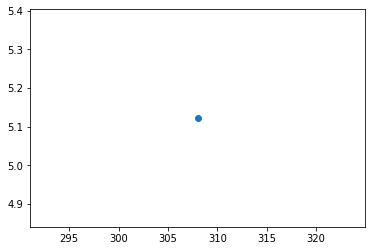

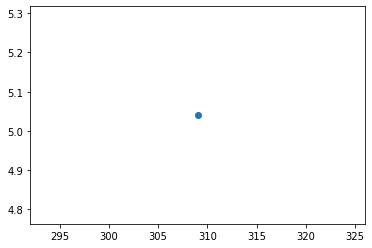

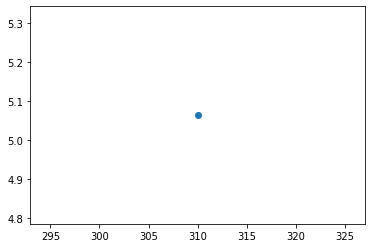

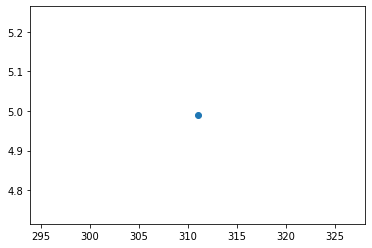

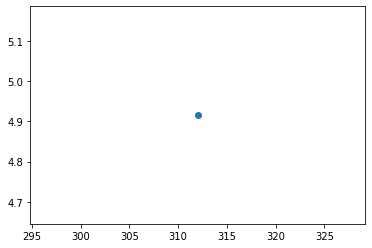

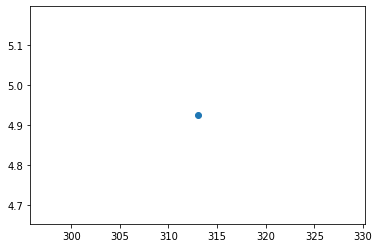

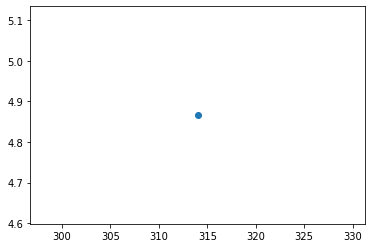

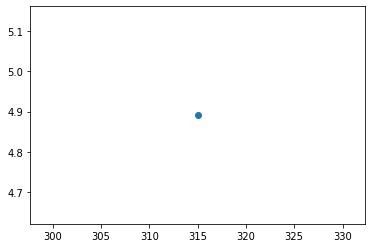

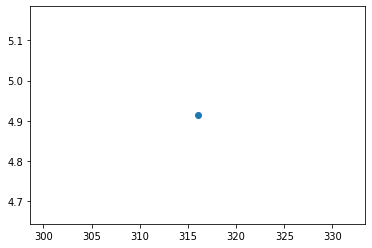

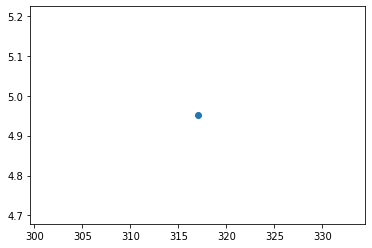

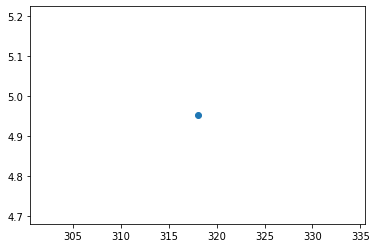

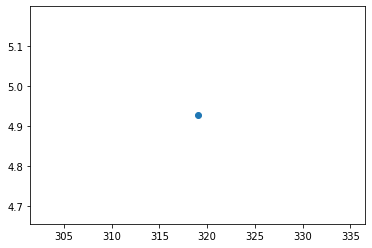

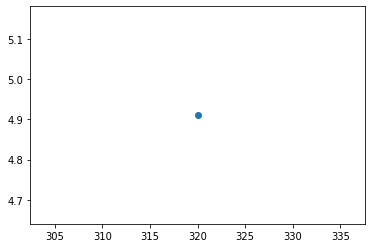

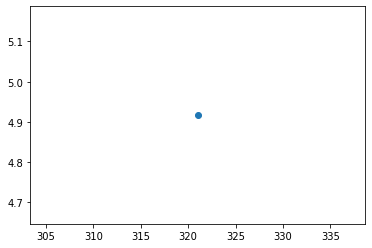

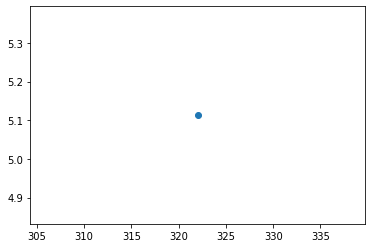

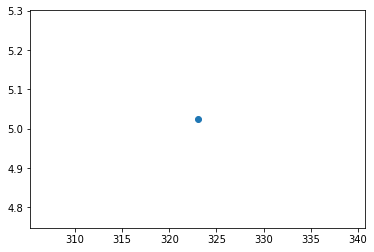

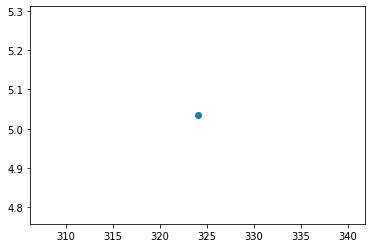

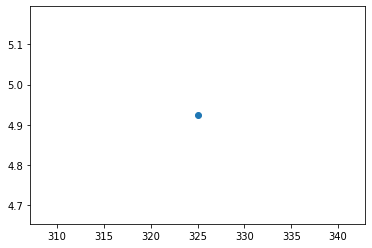

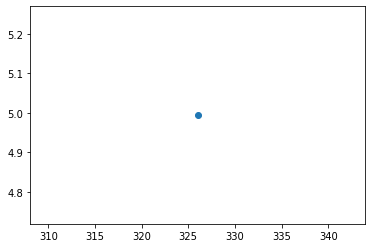

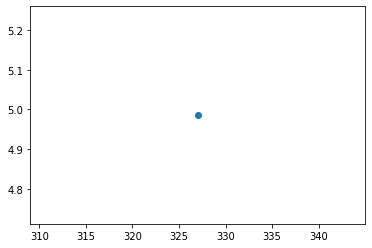

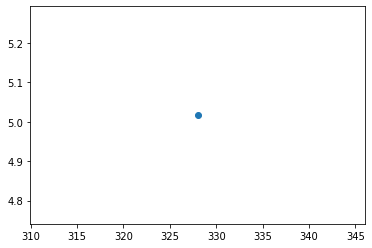

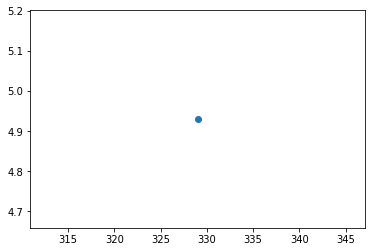

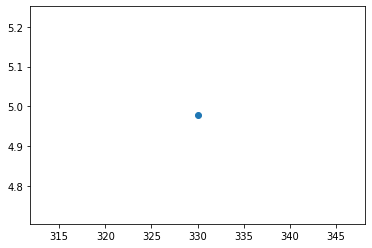

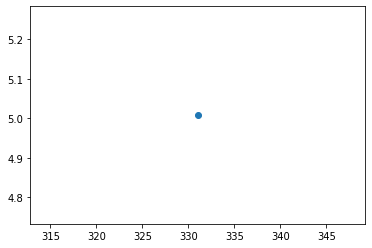

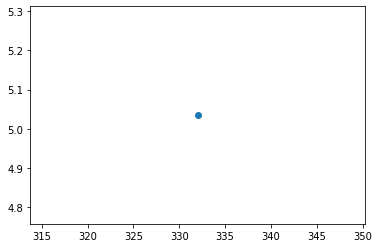

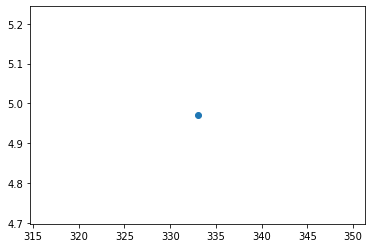

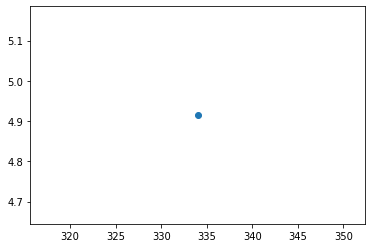

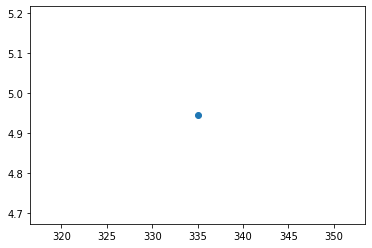

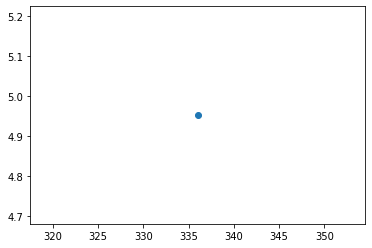

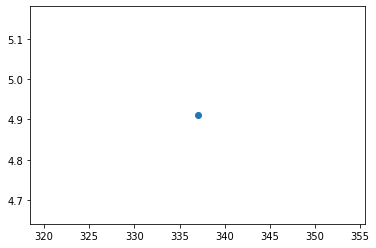

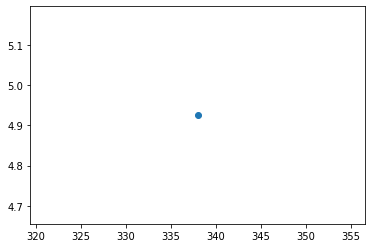

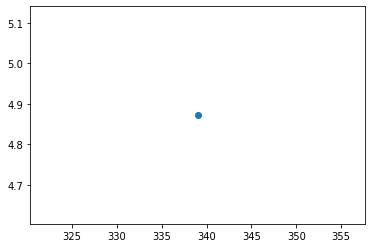

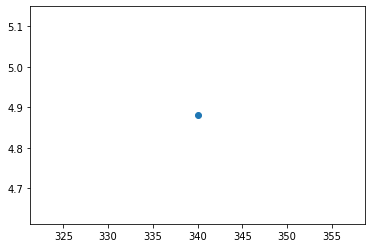

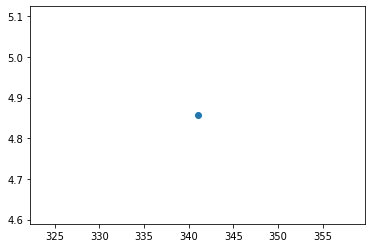

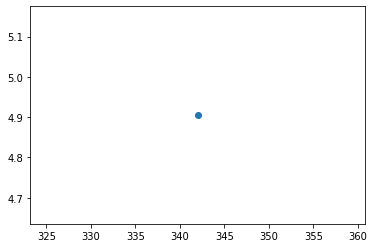

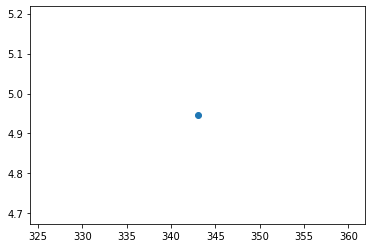

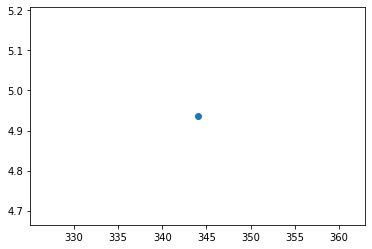

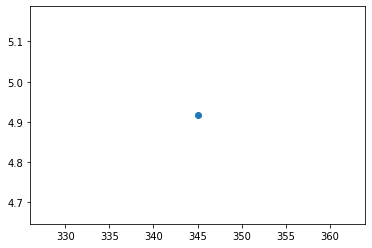

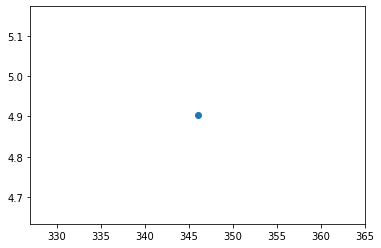

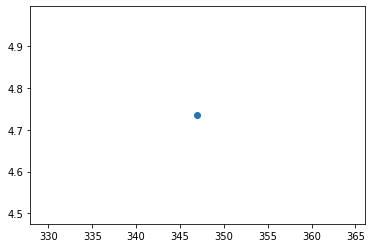

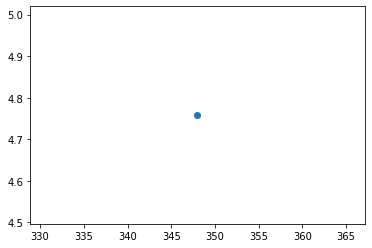

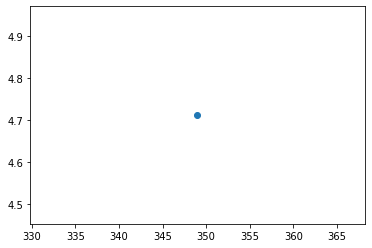

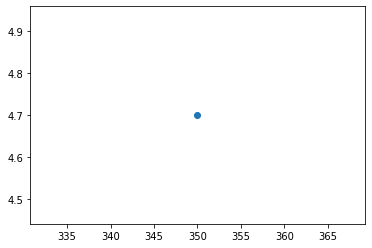

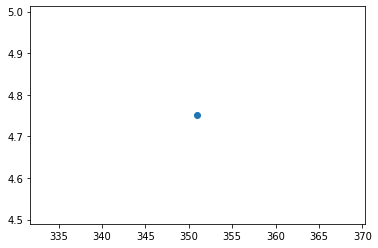

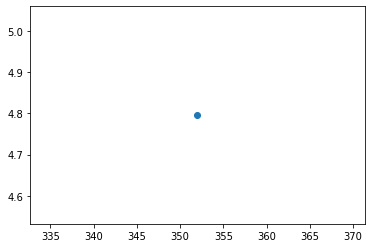

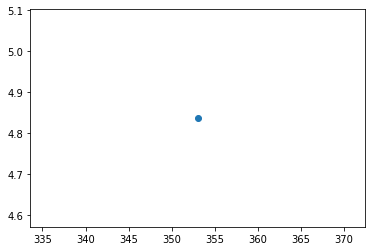

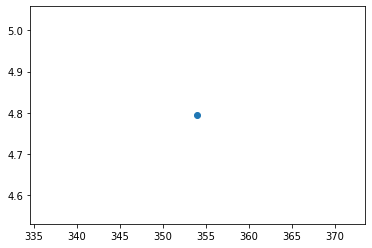

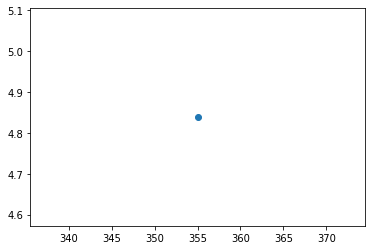

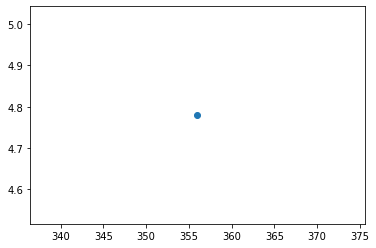

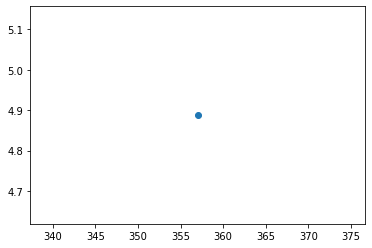

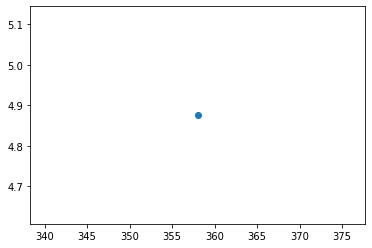

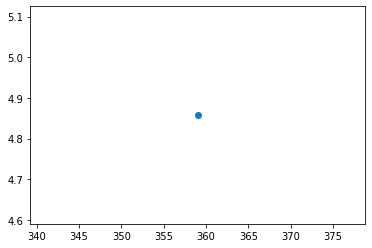

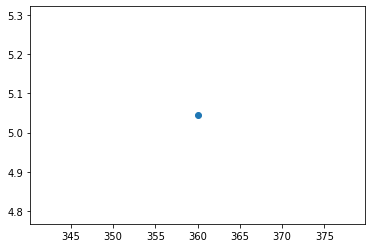

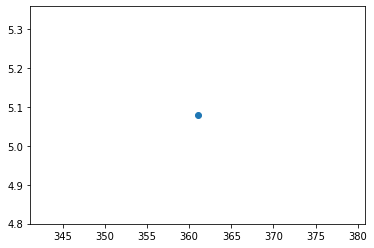

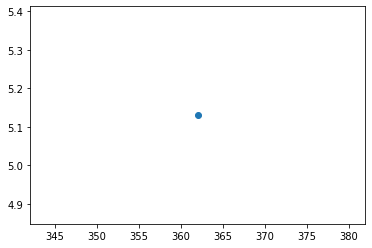

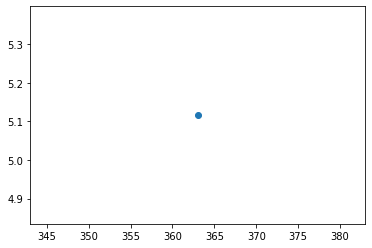

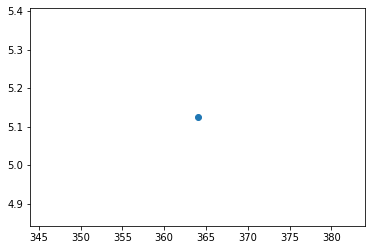

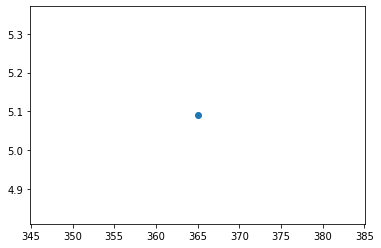

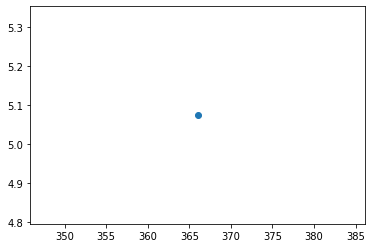

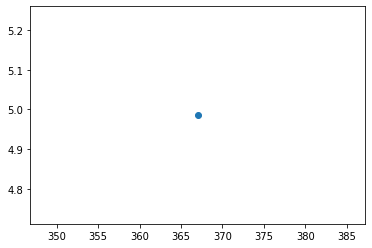

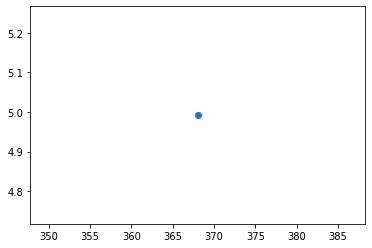

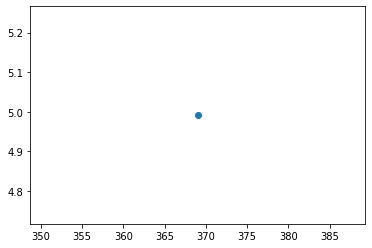

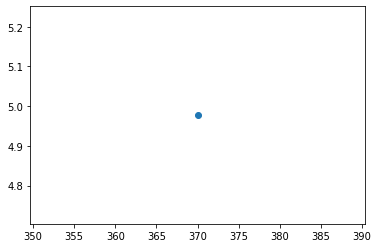

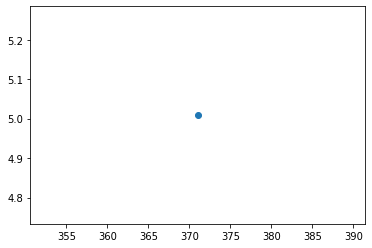

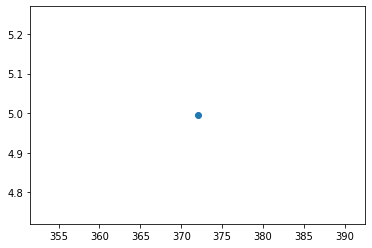

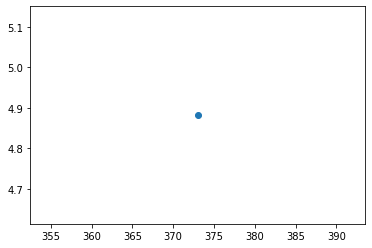

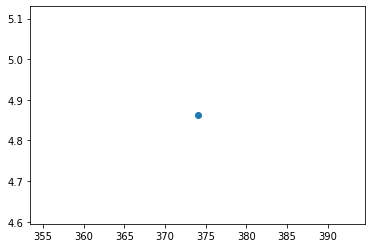

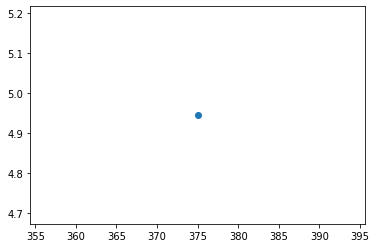

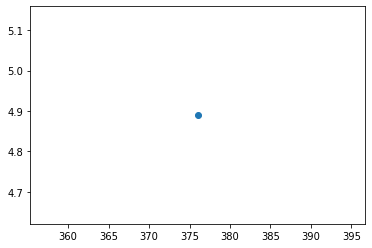

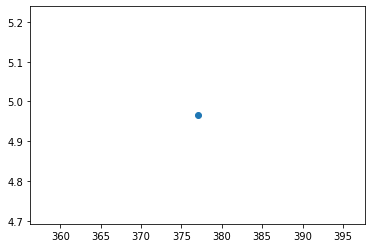

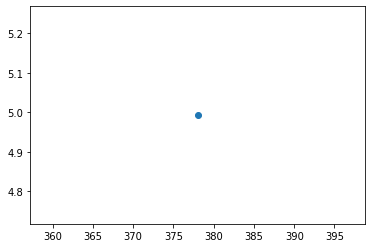

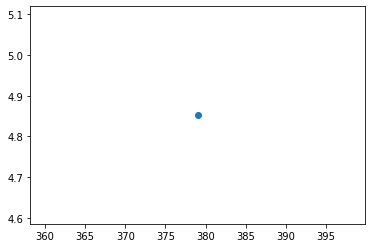

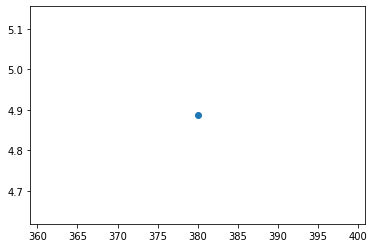

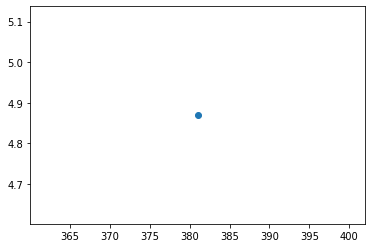

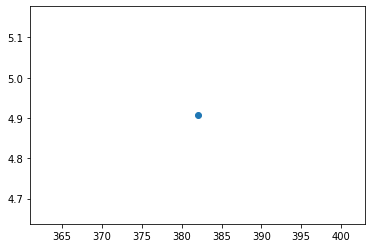

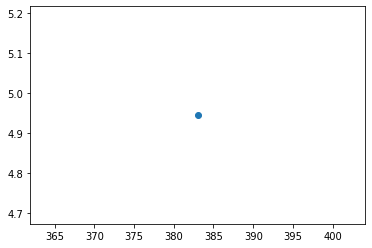

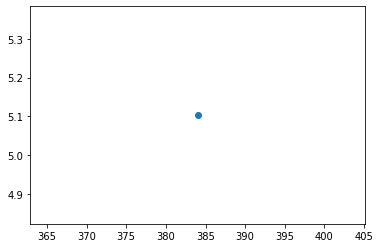

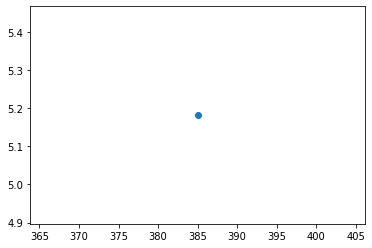

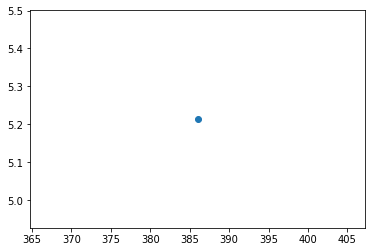

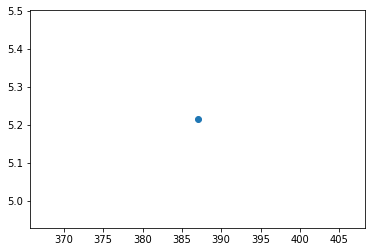

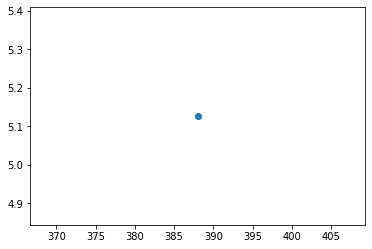

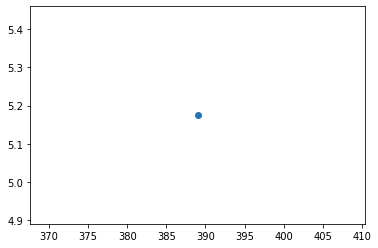

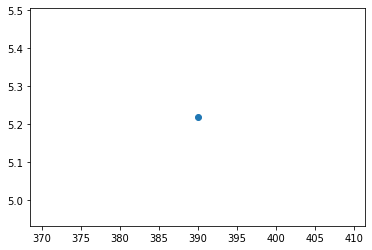

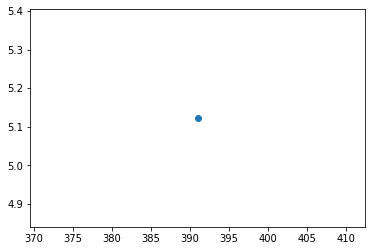

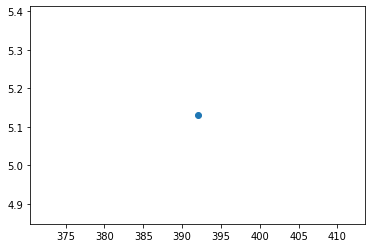

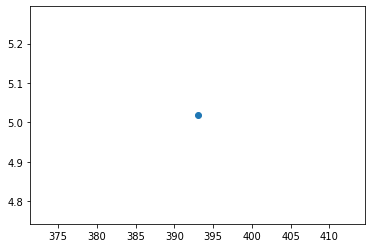

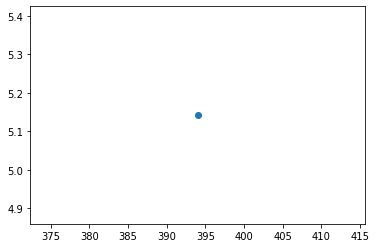

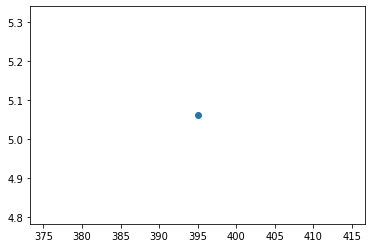

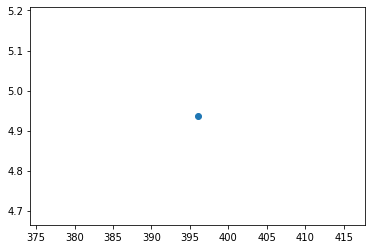

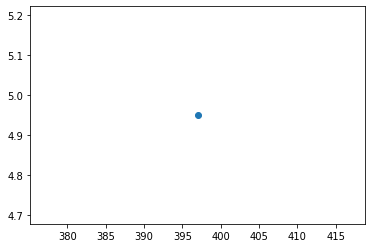

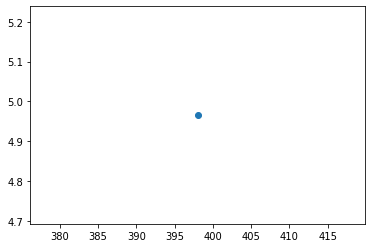

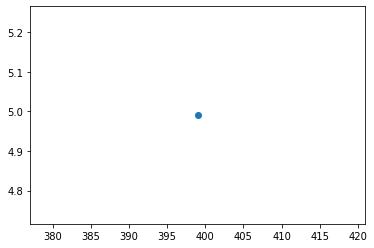

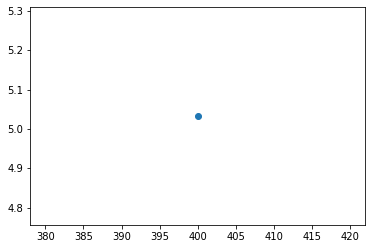

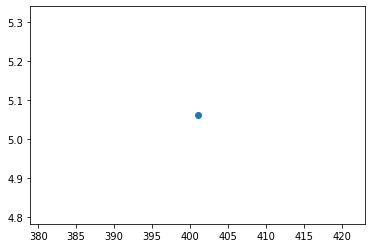

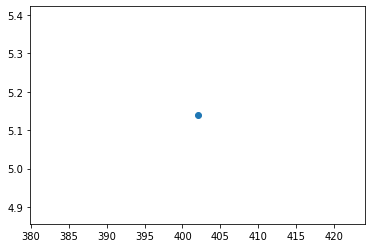

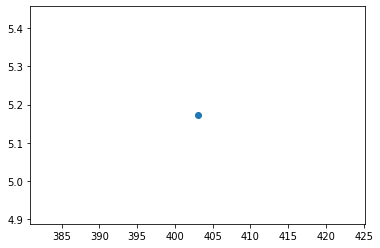

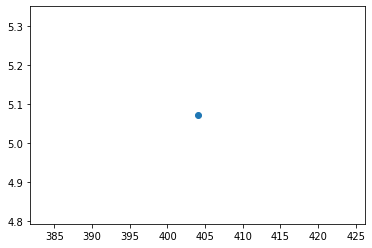

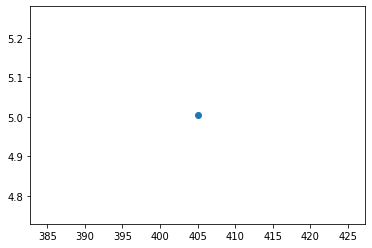

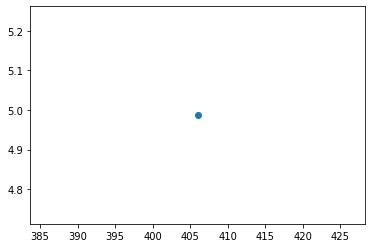

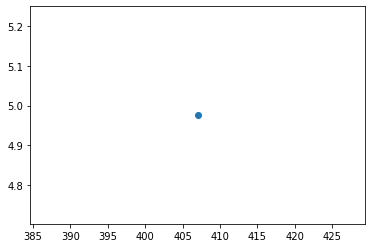

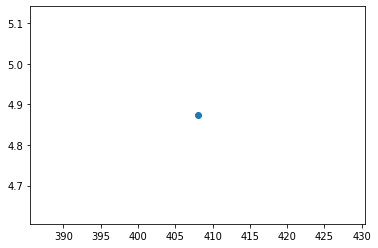

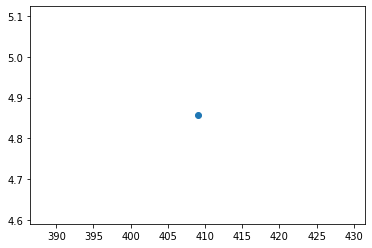

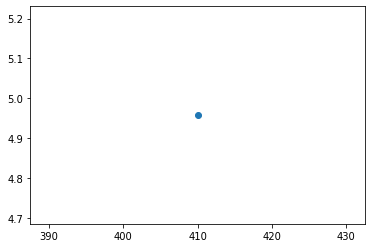

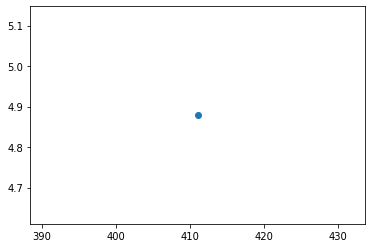

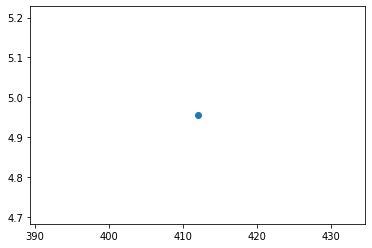

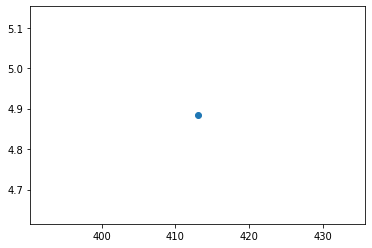

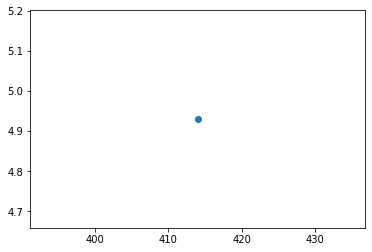

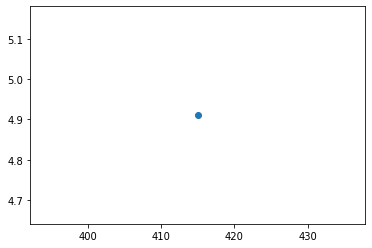

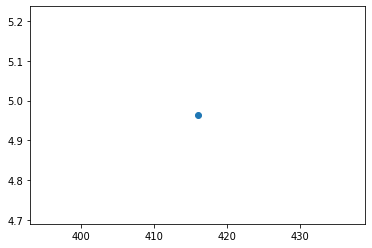

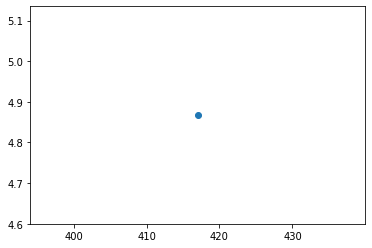

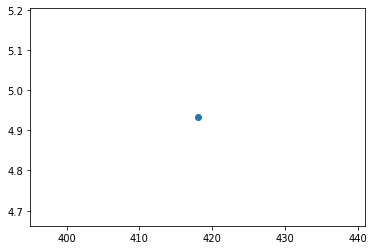

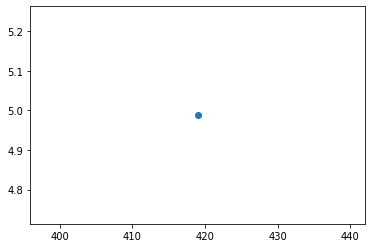

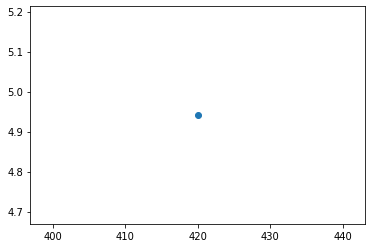

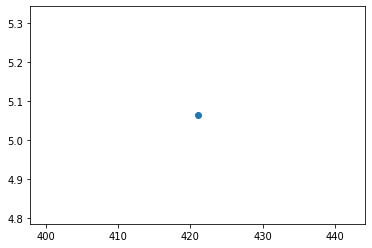

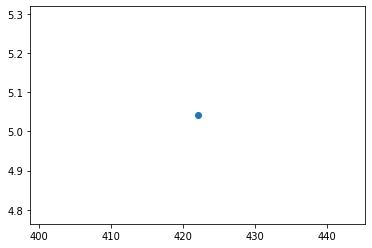

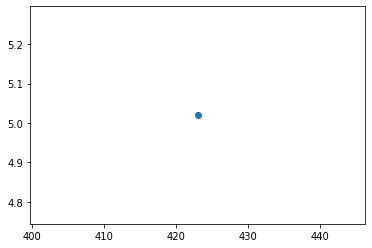

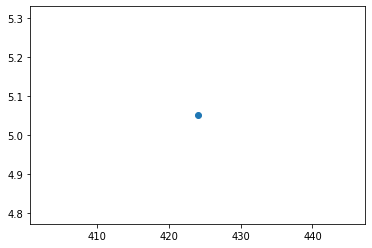

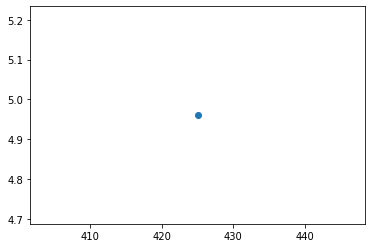

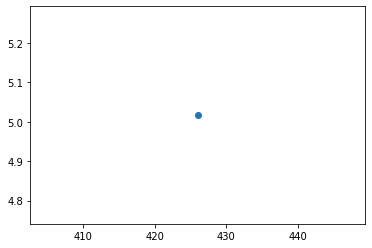

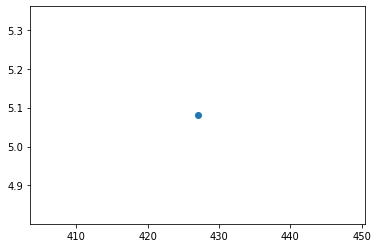

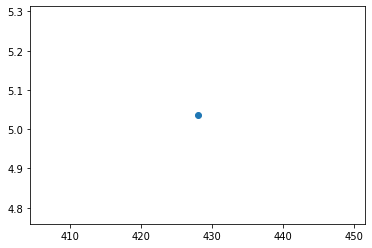

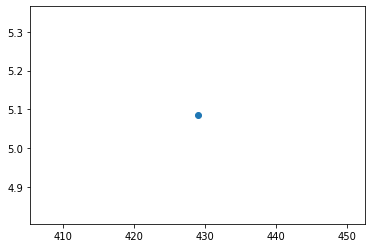

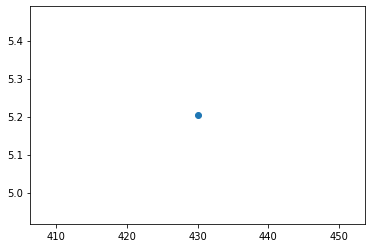

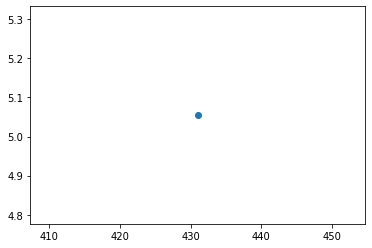

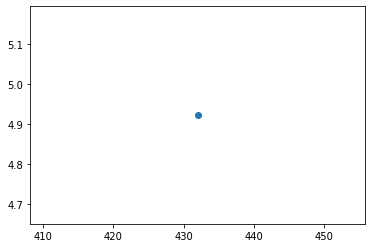

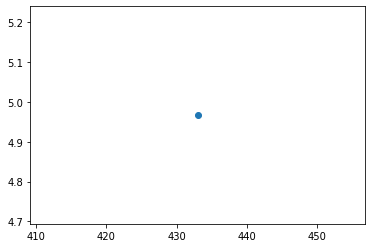

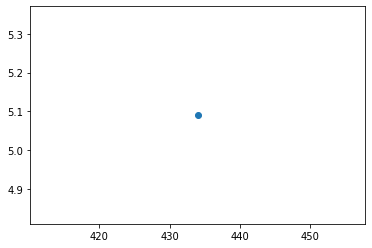

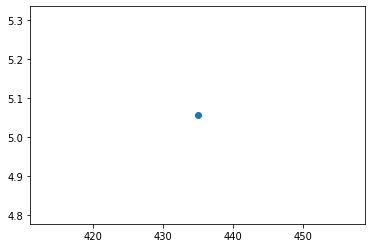

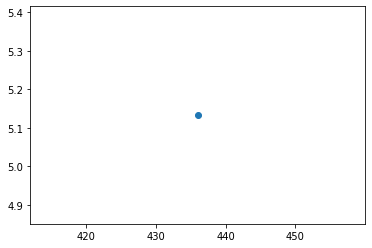

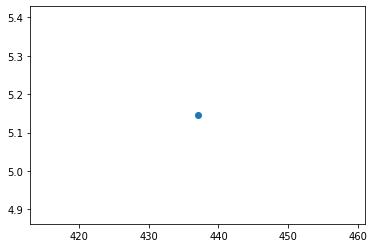

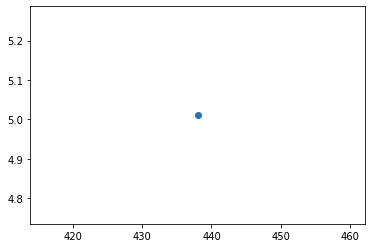

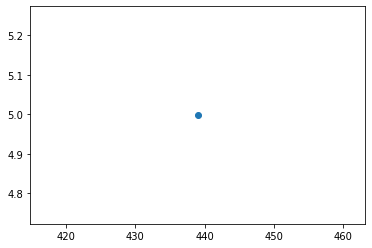

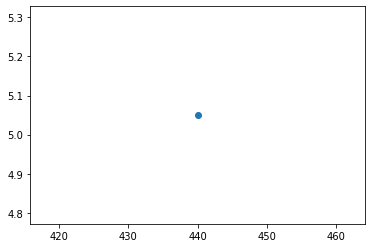

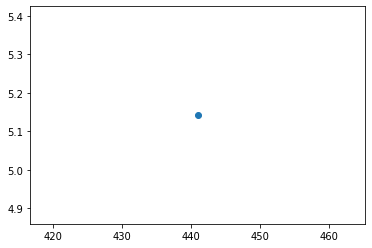

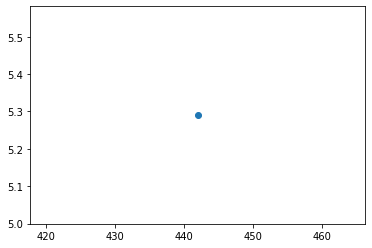

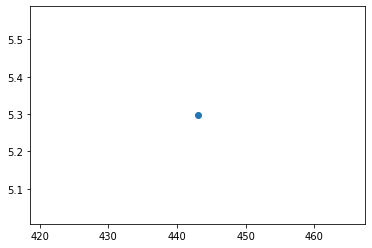

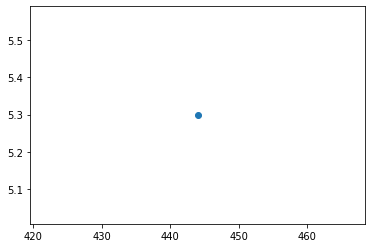

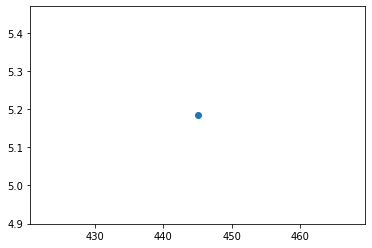

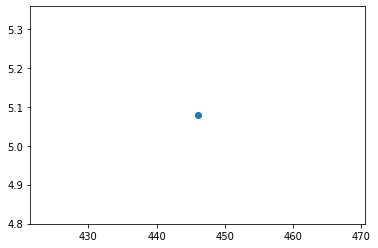

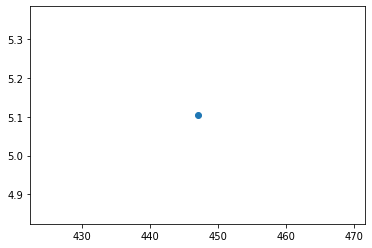

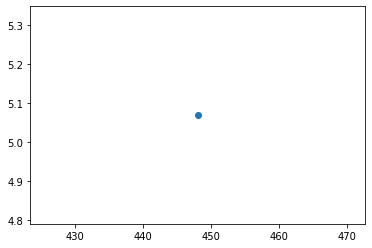

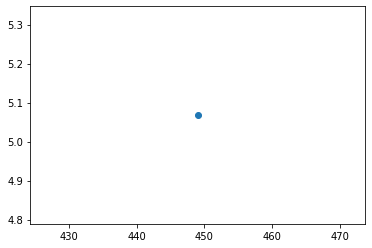

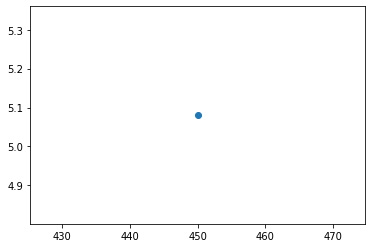

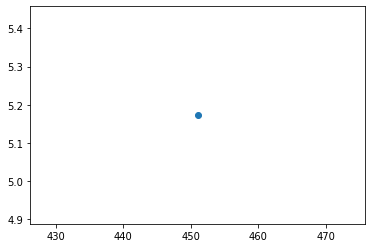

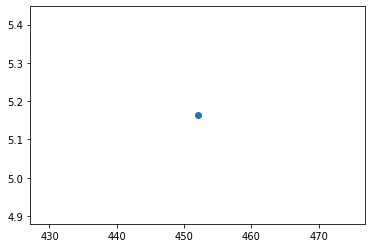

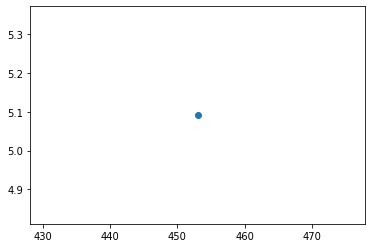

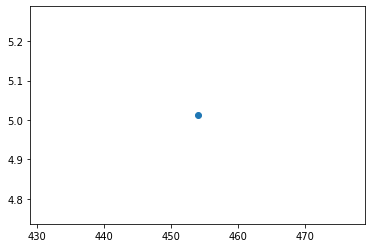

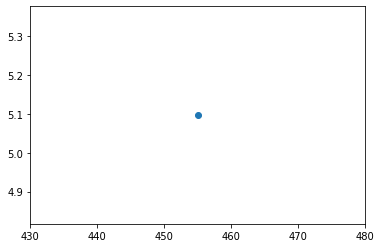

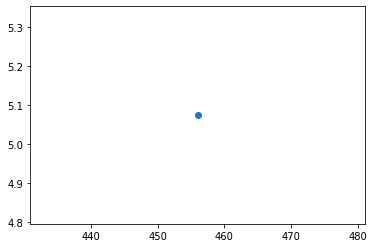

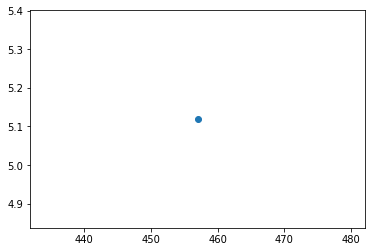

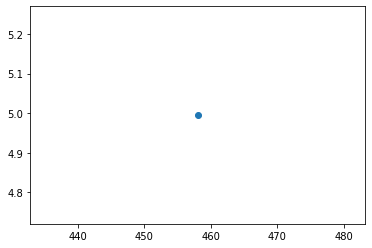

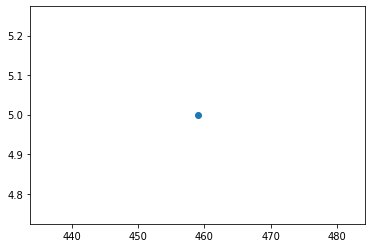

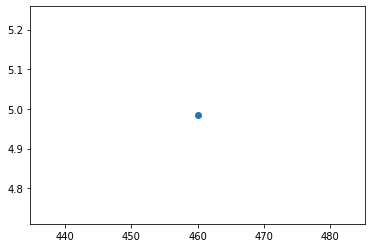

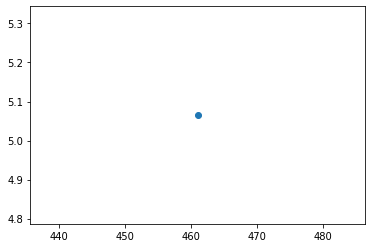

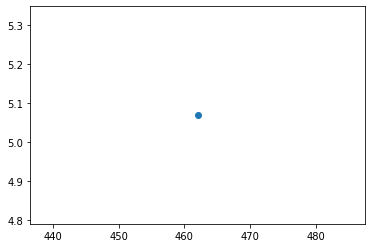

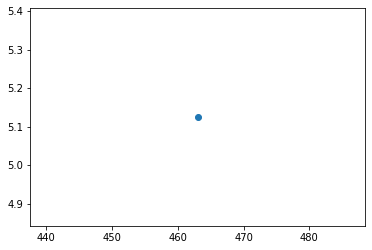

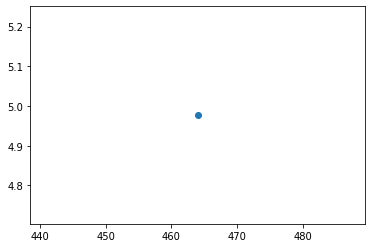

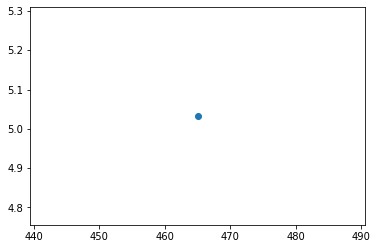

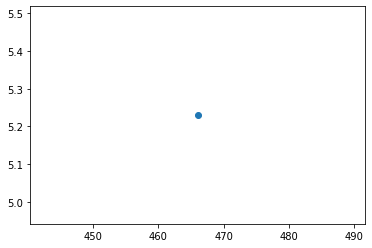

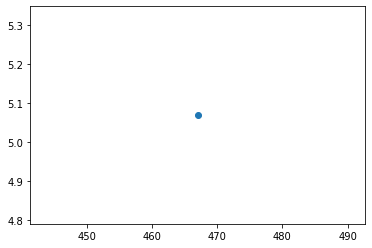

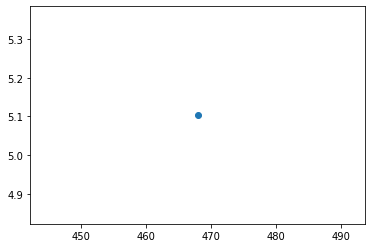

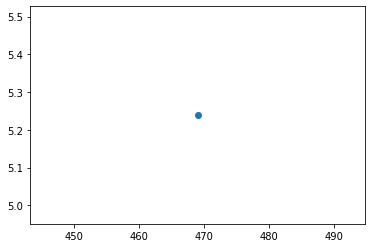

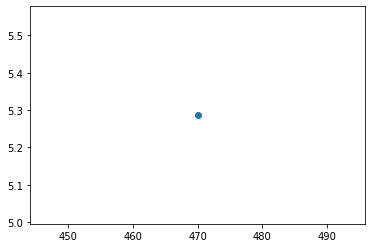

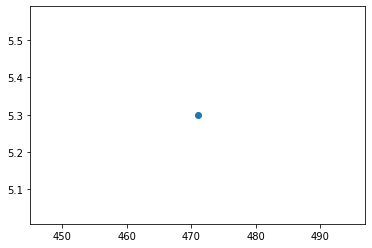

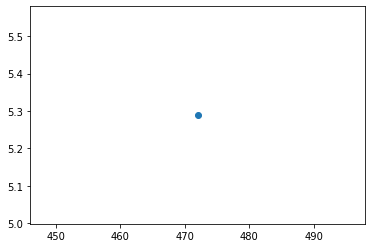

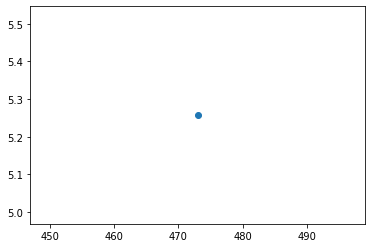

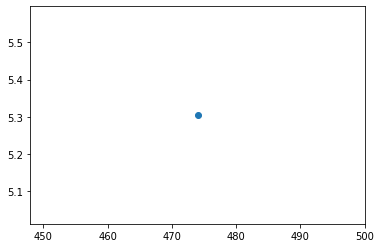

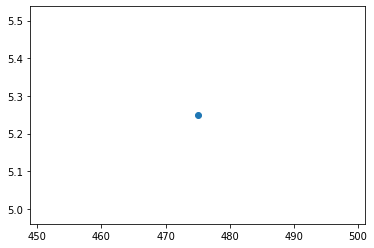

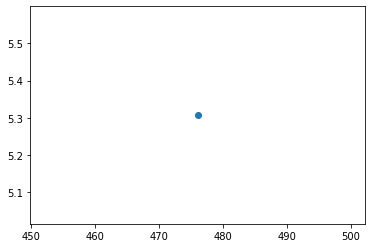

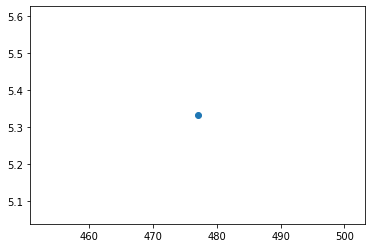

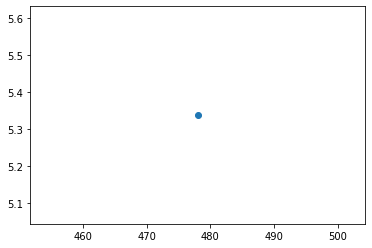

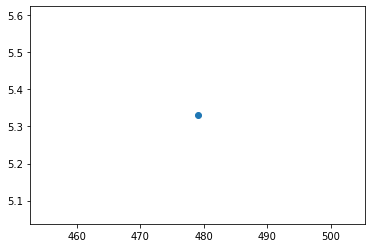

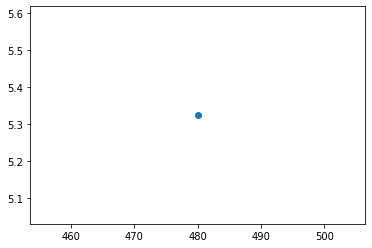

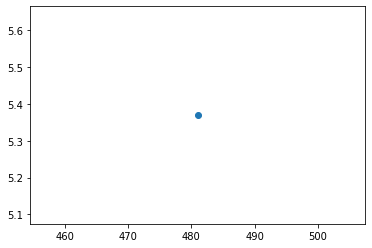

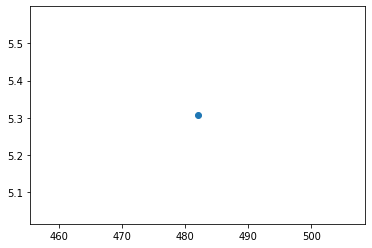

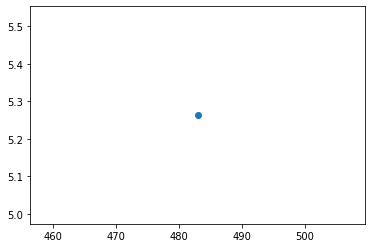

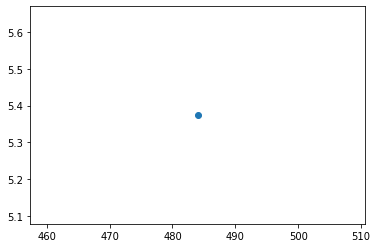

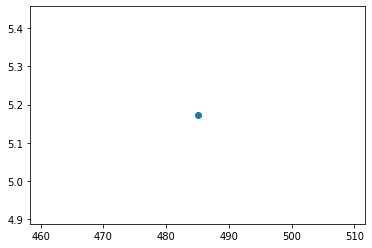

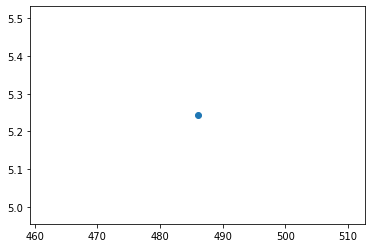

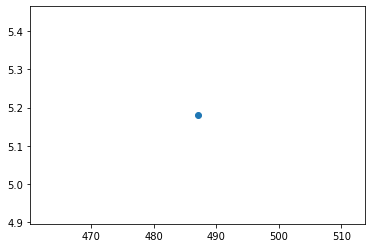

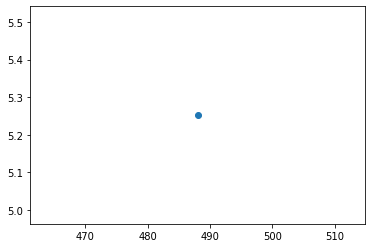

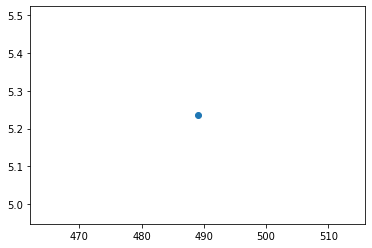

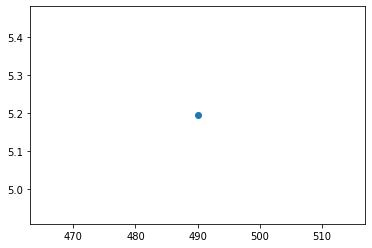

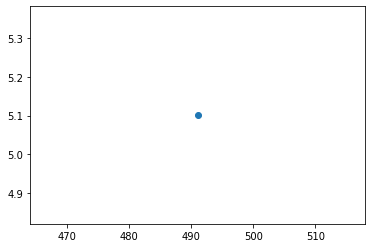

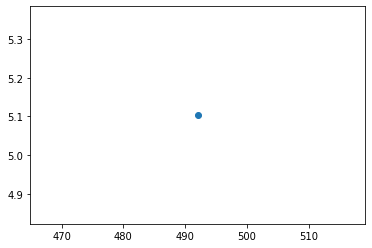

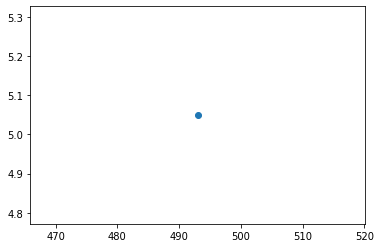

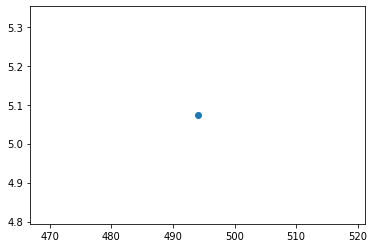

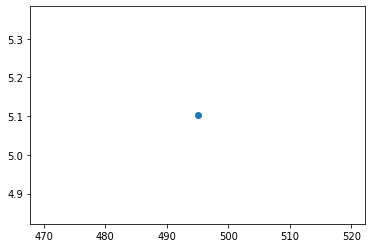

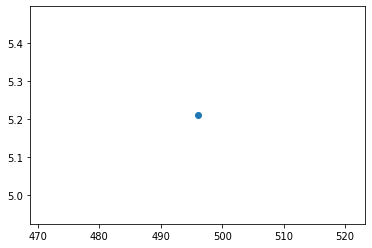

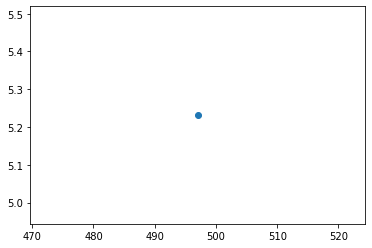

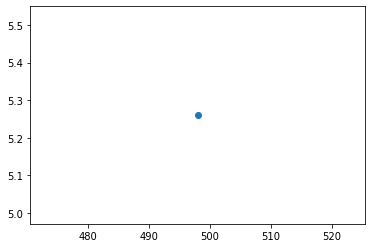

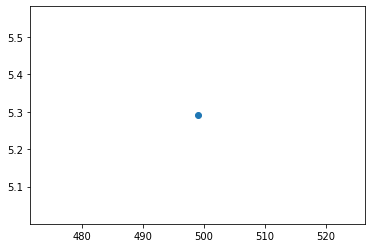

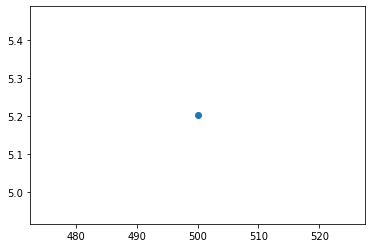

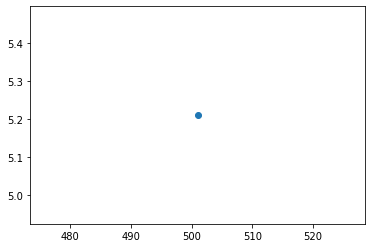

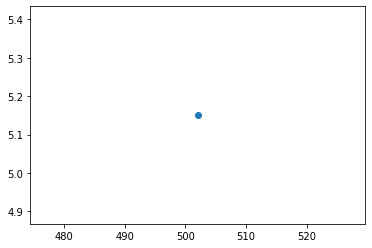

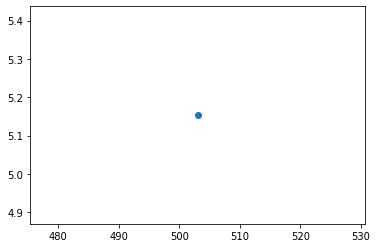

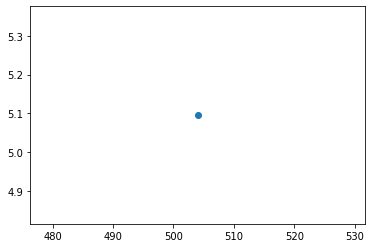

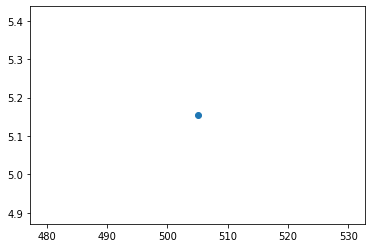

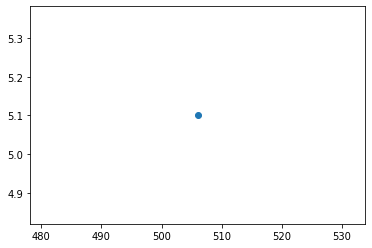

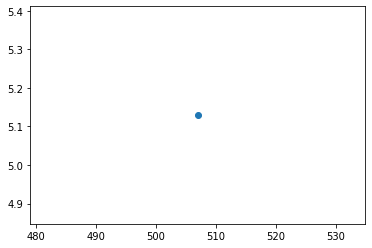

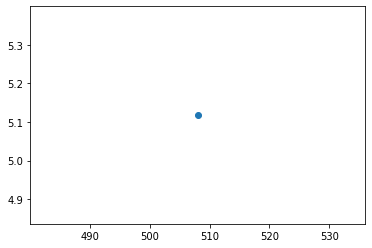

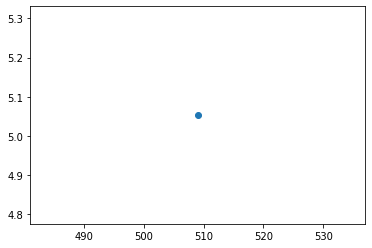

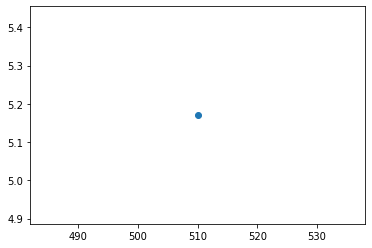

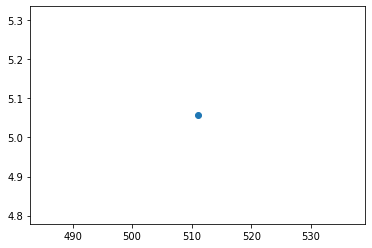

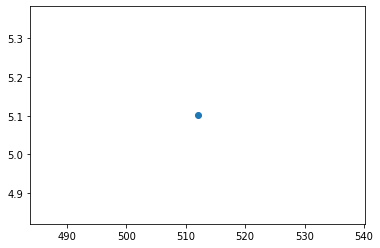

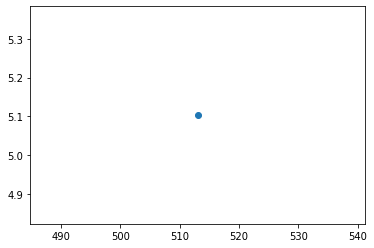

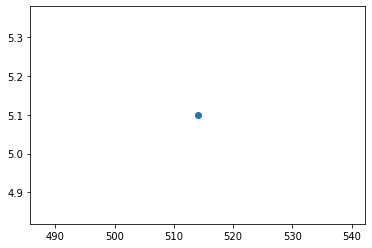

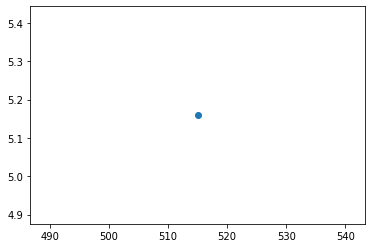

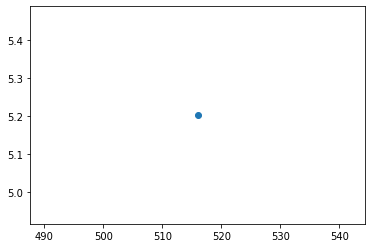

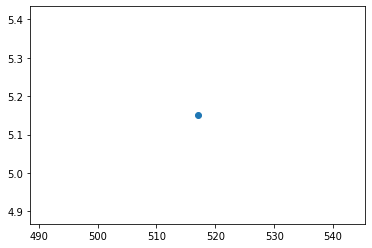

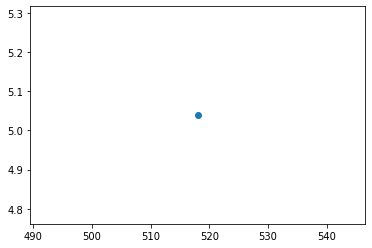

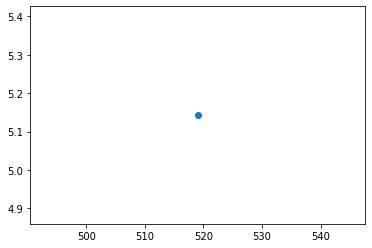

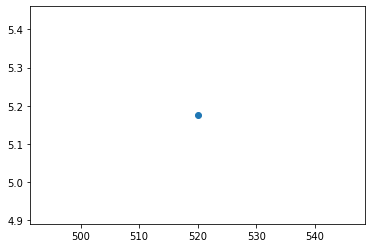

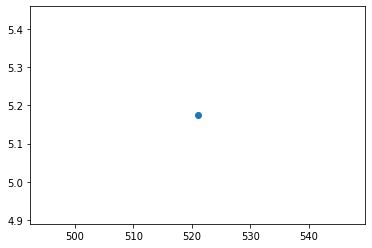

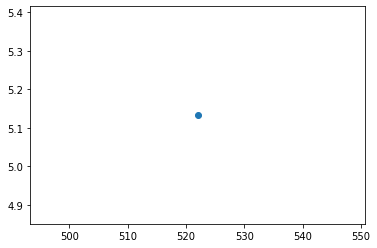

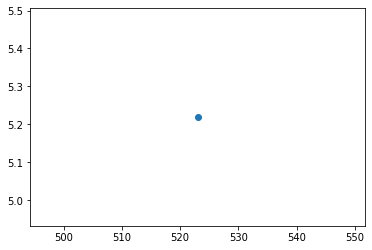

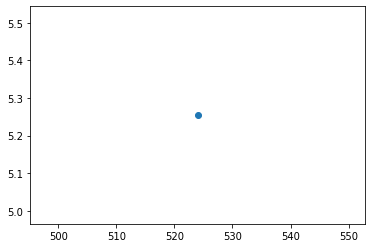

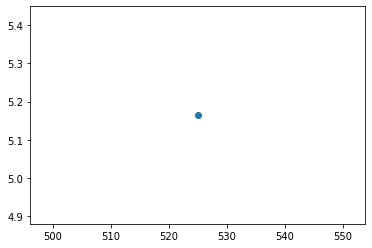

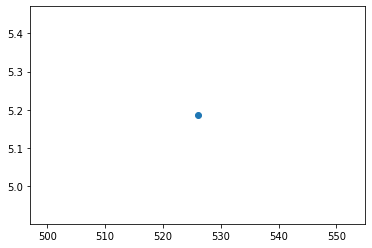

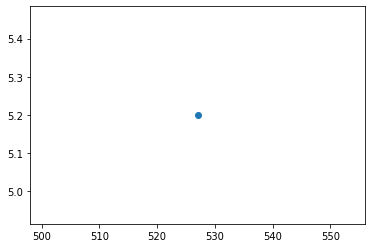

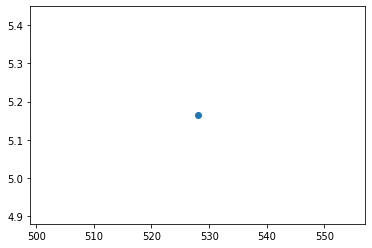

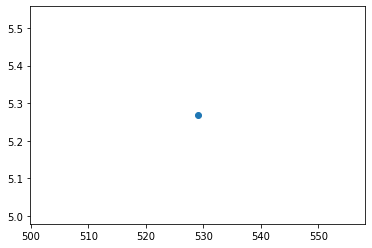

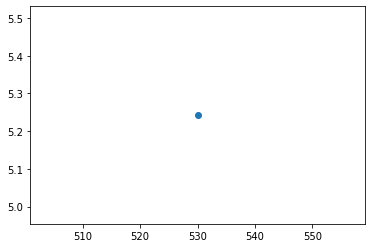

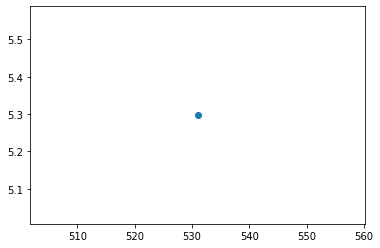

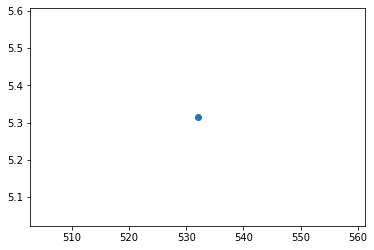

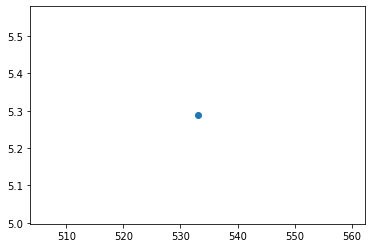

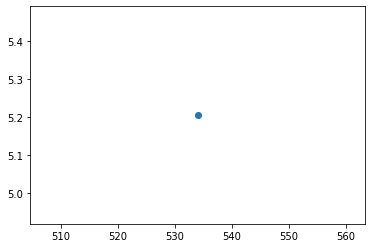

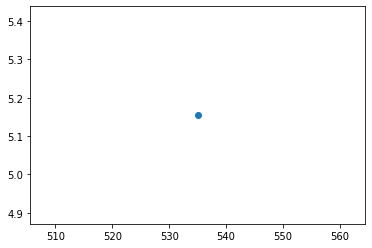

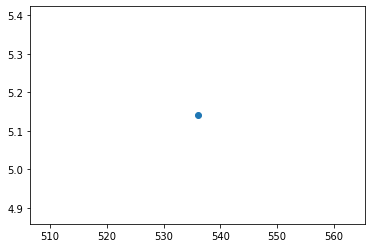

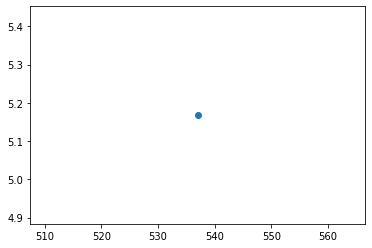

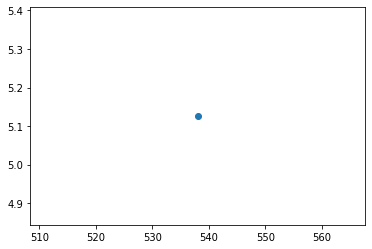

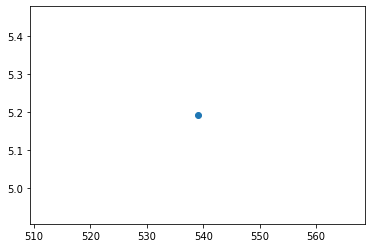

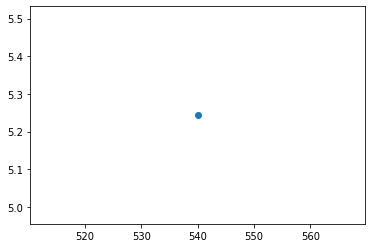

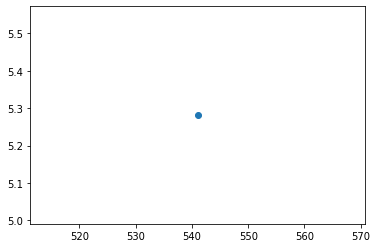

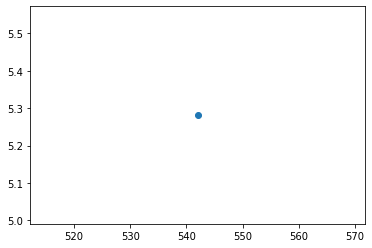

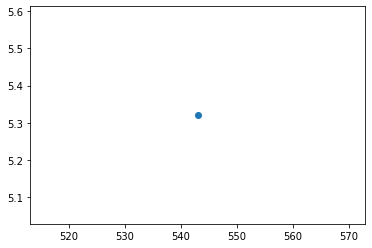

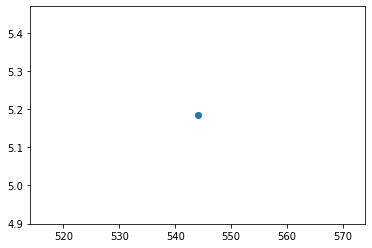

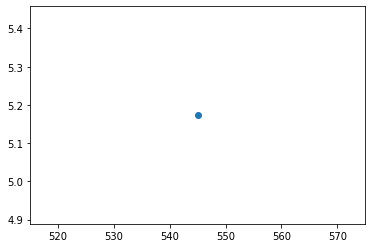

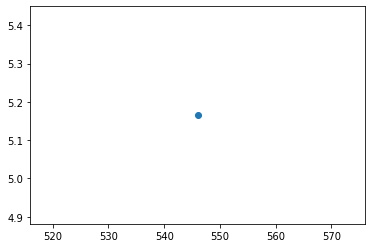

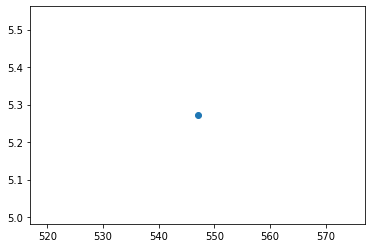

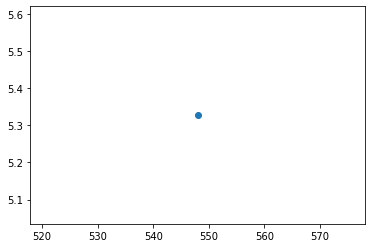

In [ ]:
plt.plot(no_frames,intensity_red_heart)
plt.show()

for i in range(len(no_frames)):
    plt.scatter(no_frames[i],intensity_red_heart[i])
    plt.pause(0.1)
plt.show()

In [8]:
peaks = list()
for i in range(len(intensity_red_heart)):
    if i==0 or i==len(intensity_red_heart):
        continue
    elif (intensity_red_heart[i] > intensity_red_heart[i-1]) and (intensity_red_heart[i] > intensity_red_heart[i+1]):
        peaks.append(intensity_red_heart[i])
        
        

In [11]:
print(len(peaks))

200


In [15]:
arr = np.array(range(200))


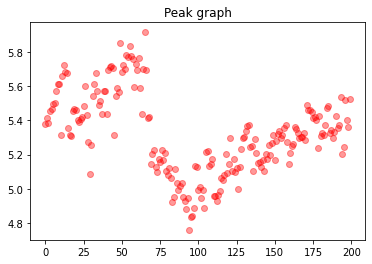

In [19]:
plt.plot(arr,peaks, 'ro',lw=0.4, alpha=0.4)
plt.title("Peak graph")
plt.show()

Finding Headrate

In [20]:
sam = (len(peaks)*60)/24
print("Heart Rate : ",sam)

Heart Rate :  500.0


In [18]:
# print((sum(intensity_red)/len(intensity_red)))

[12.3441087151458, 10.556155344171822, 10.60445331197566, 11.682575055098043, 11.630430664919777, 12.010511854908453, 11.927502290764123, 11.887259674187437, 12.453506521218344, 13.477960793903355, 12.350302172124987, 12.054961643794284, 12.979754626609436, 13.138716951339998, 11.59148694263538, 12.57277744848966, 11.925853135555363, 12.798766359609477, 12.703366920196803, 10.917663801211727, 12.10283880936243, 11.681353020310688, 12.097503454726287, 12.809340447170198, 11.732075517646793, 11.282478835010073, 13.426833819198762, 12.317936501792822, 10.095037513134239, 10.785545534387023, 11.073949614113006, 12.143542528289483, 11.950197571704933, 11.498643204125262, 11.064591433777005, 11.130765853721838, 10.6213055999823, 11.11477115094642, 11.95616231897631, 12.378211831488496, 12.419582710187981, 12.487899048407703, 12.732482018531401, 10.929624959429898, 10.701524404855054, 11.271824878694815, 10.96980245754398, 12.280693123724195, 12.629246644500277, 11.497715785015673, 11.5152869

2. Reading dimentions

In [268]:
data_pic_red = data_pic[:,:,1]
# dis_pic(data_pic_red)
filtered_pic = max_rgb_filter(data_pic)
# cv.imshow("Images", np.hstack([data_pic, f]))
# cv.waitKey(0)

In [269]:
def max_rgb_filter(image):
    (B, G, R) = cv.split(image)
    M = np.maximum(np.maximum(R, G), B)
    R[R < M] = 0
    G[G < M] = 0
    B[B < M] = 0

    return cv.merge([B, G, R])

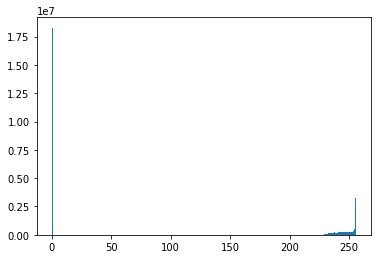

In [270]:
import matplotlib.pyplot as plt
plt.hist(filtered_pic.ravel(),256,[0,256]); plt.show()

In [271]:
bgr_planes = cv.split(data_pic)
print(bgr_planes)

[array([[84, 81, 80, ..., 40, 38, 35],
       [84, 81, 81, ..., 42, 44, 45],
       [82, 82, 84, ..., 34, 31, 31],
       ...,
       [83, 83, 81, ..., 37, 39, 40],
       [79, 83, 85, ..., 37, 39, 39],
       [77, 83, 86, ..., 36, 38, 37]], dtype=uint8), array([[ 4,  1,  0, ...,  4,  5,  2],
       [ 4,  1,  1, ...,  6, 11, 12],
       [ 2,  2,  4, ...,  0,  0,  0],
       ...,
       [ 3,  3,  1, ...,  0,  1,  2],
       [ 0,  3,  5, ...,  0,  1,  1],
       [ 0,  3,  6, ...,  0,  0,  0]], dtype=uint8), array([[255, 254, 253, ..., 228, 226, 223],
       [255, 254, 254, ..., 230, 232, 233],
       [255, 255, 255, ..., 222, 219, 219],
       ...,
       [255, 255, 255, ..., 229, 231, 232],
       [254, 255, 255, ..., 229, 231, 231],
       [252, 255, 255, ..., 228, 230, 229]], dtype=uint8)]


In [272]:
def dim(bgr_planes):
    if not type(bgr_planes) == list:
        return []
    return [len(bgr_planes)] + dim(bgr_planes[0])
dim(bgr_planes)

[3]

In [273]:
bgr_planes[0]

array([[84, 81, 80, ..., 40, 38, 35],
       [84, 81, 81, ..., 42, 44, 45],
       [82, 82, 84, ..., 34, 31, 31],
       ...,
       [83, 83, 81, ..., 37, 39, 40],
       [79, 83, 85, ..., 37, 39, 39],
       [77, 83, 86, ..., 36, 38, 37]], dtype=uint8)

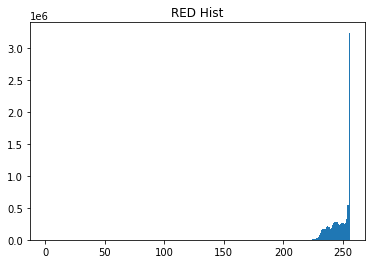

In [274]:
plt.title("RED Hist")
plt.hist(bgr_planes[2].ravel(),256,[0,256]) 
plt.show()


3242945.0

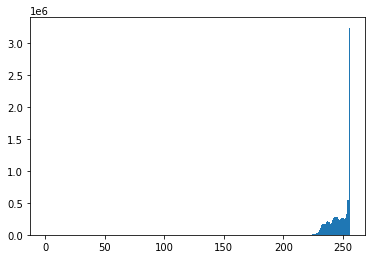

In [275]:
RED = plt.hist(bgr_planes[2].ravel(),256,[0,256]) 
len(RED)
max(RED[0])

In [276]:
# Finding image mean
# image_mean1 = sum(count_R.*binslocation_R)/sum(count_R);

# image_mean = sum(RED[0]*RED[1])/sum(RED[0])

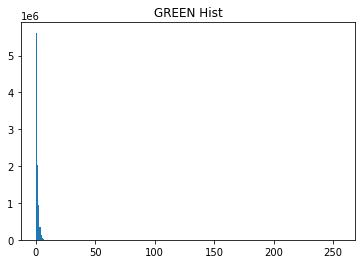

In [277]:
plt.title("GREEN Hist")
plt.hist(bgr_planes[1].ravel(),256,[0,256]) 
plt.show()


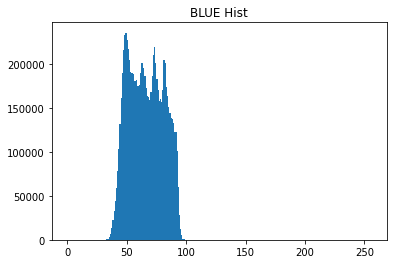

In [278]:
plt.title("BLUE Hist")
plt.hist(bgr_planes[0].ravel(),256,[0,256]) 
plt.show()


Finding MAX vale in R,G,B

In [279]:
bgr_planes[2][0]
print(bgr_planes[2][0].shape)
print(bgr_planes[2].shape)

(2268,)
(4032, 2268)


In [280]:
bgr_planes[2]

array([[255, 254, 253, ..., 228, 226, 223],
       [255, 254, 254, ..., 230, 232, 233],
       [255, 255, 255, ..., 222, 219, 219],
       ...,
       [255, 255, 255, ..., 229, 231, 232],
       [254, 255, 255, ..., 229, 231, 231],
       [252, 255, 255, ..., 228, 230, 229]], dtype=uint8)

BLUE index 50 value : 226364.0


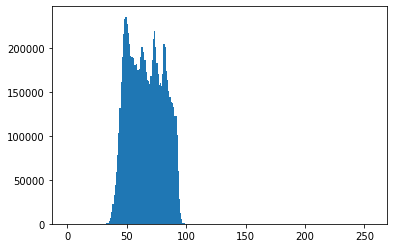

In [281]:
#BLUE BLUE[50] -> y value
BLUE = plt.hist(bgr_planes[0].ravel(),256,[0,256]) 
len(BLUE)
# max(BLUE[0])
print("BLUE index 50 value : {}".format(BLUE[0][50]))

In [282]:




#  RED/RED + BLUE
img_m = max(RED[0])/(max(RED[0])+BLUE[0][50])
print("SPO2 : {}".format(img_m*100))

SPO2 : 93.4752424762395


In [283]:
RED_avg = sum(RED[0])/len(RED[0])
print(sum(RED[0])/len(RED[0]))

35721.0


In [284]:
BLUE_avg = sum(BLUE[0])/len(BLUE[0])

In [285]:
img_mm = RED_avg/(RED_avg+BLUE_avg)
print("SPO2 average : {}".format(img_mm*100))

SPO2 average : 50.0
